# Laboratorio 2

##### Javier Valle 20159
##### Mario de León 19026

## Haciendo análisis exploratorio.

In [1]:
# Imports necesarios.
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import numpy as np
import re
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from arch.unitroot import PhillipsPerron
from pmdarima import auto_arima
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam

### Inciso 1: Análisis exploratorio

In [2]:
# Abriendo el csv.
df = pd.read_csv('data.csv')

df

# Visualizando la data del csv.
print("Encabezados")
print(df.head())


Encabezados
                 Fecha  Aceites lubricantes  Asfalto      Bunker  Ceras   
0  2001-01-01 00:00:00                  0.0  27748.99  214581.84    0.0  \
1  2001-02-01 00:00:00                  0.0   7503.57  294609.00    0.0   
2  2001-03-01 00:00:00                  0.0  26304.32  315263.80    0.0   
3  2001-04-01 00:00:00                  0.0   7885.89  205653.00    0.0   
4  2001-05-01 00:00:00                  0.0   8443.16  278371.30    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre   
0                    0.0                 0.0                       0.0  \
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Naftas  Petcoke   
0            19406

In [3]:
# Visualizando la data del consumo.csv
df2 = pd.read_csv("consumo.csv")

print("Encabezados")
print(df2.head())

Encabezados
                 Fecha  Aceites lubricantes  Asfalto     Bunker  Ceras   
0  2000-01-01 00:00:00                  0.0  48446.0  296766.99    0.0  \
1  2000-02-01 00:00:00                  0.0  50597.0  328116.44    0.0   
2  2000-03-01 00:00:00                  0.0  27593.0  368589.63    0.0   
3  2000-04-01 00:00:00                  0.0  53794.0  396300.47    0.0   
4  2000-05-01 00:00:00                  0.0  60137.0  449368.92    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre   
0                    0.0                 0.0                       0.0  \
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Kerosina   
0            194410.476190     

In [4]:
# Viendo la info del csv.
print("Información")
print(df.info())

Información
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     269 non-null    object 
 1   Aceites lubricantes       269 non-null    float64
 2   Asfalto                   269 non-null    float64
 3   Bunker                    269 non-null    float64
 4   Ceras                     268 non-null    float64
 5   Combustible turbo jet     269 non-null    float64
 6   Diesel bajo azufre        269 non-null    float64
 7   Diesel ultra bajo azufre  269 non-null    float64
 8   Gas licuado de petróleo   269 non-null    float64
 9   Gasolina de aviación      269 non-null    float64
 10  Gasolina regular          269 non-null    float64
 11  Gasolina superior         269 non-null    float64
 12  Grasas lubricantes        269 non-null    float64
 13  Kerosina                  269 non-null    float64
 14

In [5]:
# Visualizando la data del consumo.csv
# Viendo la info del csv.
print("Información")
print(df2.info())

Información
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     281 non-null    object 
 1   Aceites lubricantes       281 non-null    float64
 2   Asfalto                   281 non-null    float64
 3   Bunker                    281 non-null    float64
 4   Ceras                     280 non-null    float64
 5   Combustible turbo jet     281 non-null    float64
 6   Diesel bajo azufre        281 non-null    float64
 7   Diesel ultra bajo azufre  281 non-null    float64
 8   Gas licuado de petróleo   281 non-null    float64
 9   Gasolina de aviación      281 non-null    float64
 10  Gasolina regular          281 non-null    float64
 11  Gasolina superior         281 non-null    float64
 12  Grasas lubricantes        281 non-null    float64
 13  Kerosina                  281 non-null    float64
 14

In [6]:
# Sacando algunas estadísticas del csv.
print("Estadísticas")
print(df.describe())

Estadísticas
       Aceites lubricantes       Asfalto         Bunker       Ceras   
count           269.000000     269.000000  2.690000e+02  268.000000  \
mean           4925.849217    8377.068161  2.932919e+05   66.469142   
std           10361.422569   15540.817631  1.732186e+05  169.789987   
min               0.000000       0.000000  8.484760e+03    0.000000   
25%               0.000000    2746.310000  1.561090e+05    0.000000   
50%               0.000000    5405.190476  2.804147e+05    0.000000   
75%               0.000000    9947.000000  4.072329e+05    0.000000   
max           46934.140000  171826.960000  1.051764e+06  920.120000   

       Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre   
count             269.000000        2.690000e+02                269.000000  \
mean            23354.625985        2.707193e+05               2644.297993   
std             39079.450100        4.923333e+05               8639.971237   
min                 0.000000       

#### Explorando las variables de de gasolinas regular, super, diesel y gas licuado.

#### Quitando NaN en las columnas 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo'

In [7]:
# Quitando NaN en estas columnas: 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo'

df.fillna(0, inplace=True)

df2.fillna(0, inplace=True)

0      177776.50
1      123115.99
2      161726.42
3      127338.74
4      168730.19
         ...    
264    909391.13
265    725101.20
266    803262.67
267    922032.39
268    947633.29
Name: Gasolina regular, Length: 269, dtype: float64
count       269.000000
mean     381883.121315
std      219364.354874
min       81015.300000
25%      201907.670000
50%      305285.530000
75%      528347.810000
max      987872.050000
Name: Gasolina regular, dtype: float64


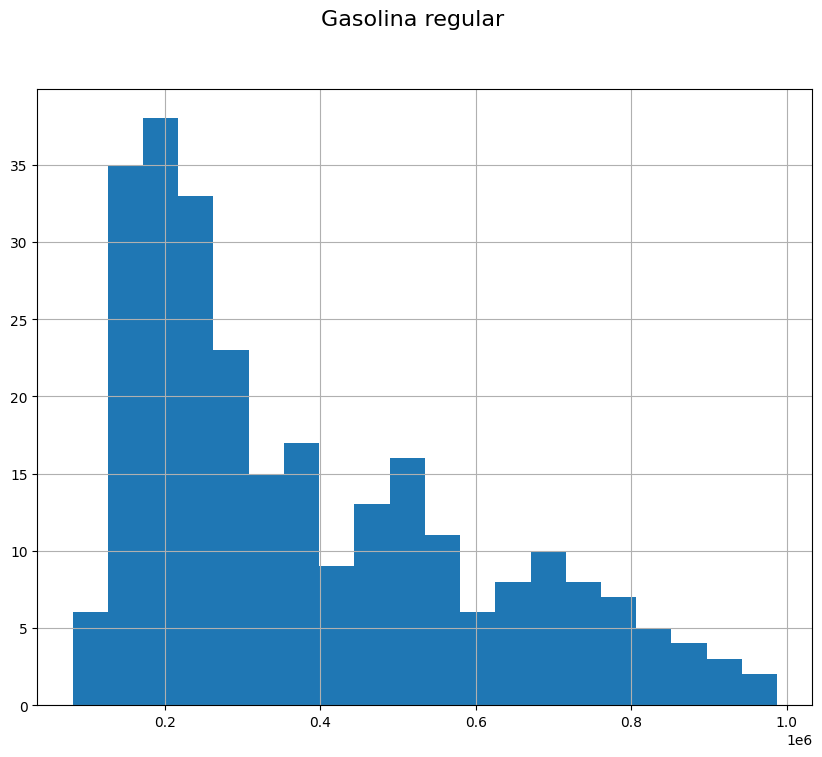

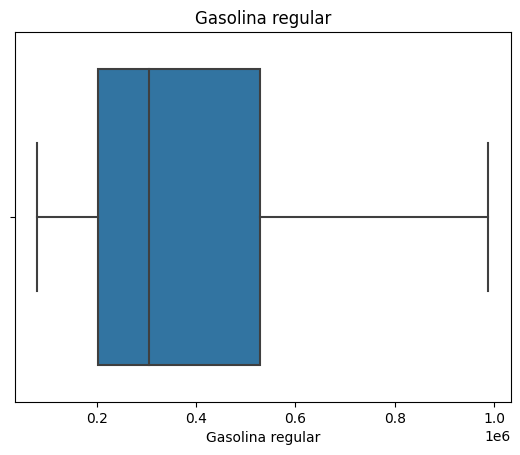

In [8]:
# Gasolina regular de la importación.
print(df["Gasolina regular"])

print(df["Gasolina regular"].describe())

# Histogramas de todas las columnas numéricas
df["Gasolina regular"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Gasolina regular', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gasolina regular', data=df)
plt.title('Gasolina regular')
plt.show()

0      202645.20
1      205530.96
2      229499.56
3      210680.40
4      208164.34
         ...    
276    804524.73
277    737345.64
278    875010.34
279    798128.36
280    866826.79
Name: Gasolina regular, Length: 281, dtype: float64
count       281.000000
mean     367626.393713
std      192320.697369
min      160741.900000
25%      213645.390000
50%      275031.210000
75%      502041.670000
max      875010.340000
Name: Gasolina regular, dtype: float64


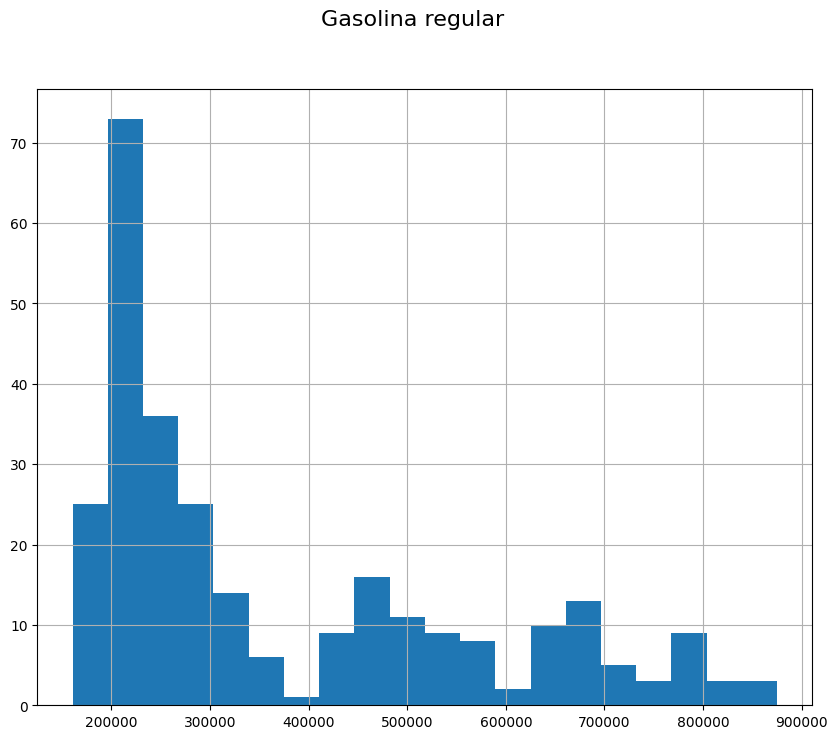

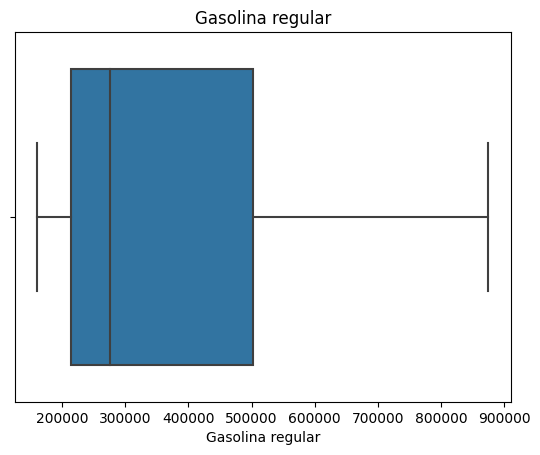

In [9]:
# Gasolina regular.
print(df2["Gasolina regular"])

print(df2["Gasolina regular"].describe())

# Histogramas de todas las columnas numéricas
df2["Gasolina regular"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Gasolina regular', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gasolina regular', data=df2)
plt.title('Gasolina regular')
plt.show()

0      373963.96
1      243091.07
2      312084.38
3      285054.89
4      300913.67
         ...    
264    578792.14
265    685183.06
266    633849.05
267    572201.36
268    668478.73
Name: Gasolina superior, Length: 269, dtype: float64
count       281.000000
mean     457160.659412
std      104043.501753
min      300242.781667
25%      381595.195833
50%      416497.410000
75%      551000.790000
max      768102.830000
Name: Gasolina superior, dtype: float64


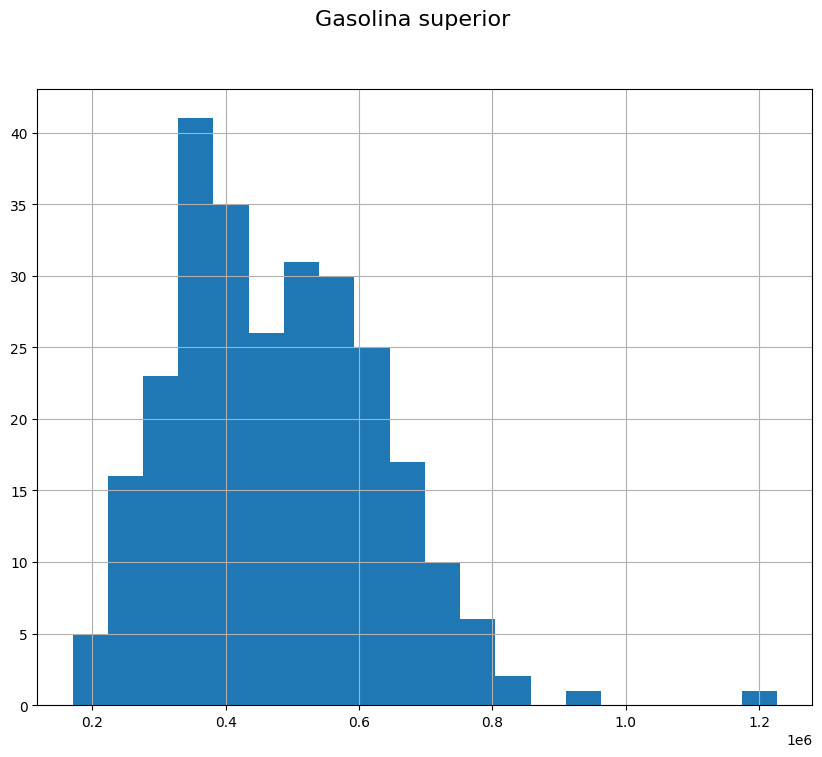

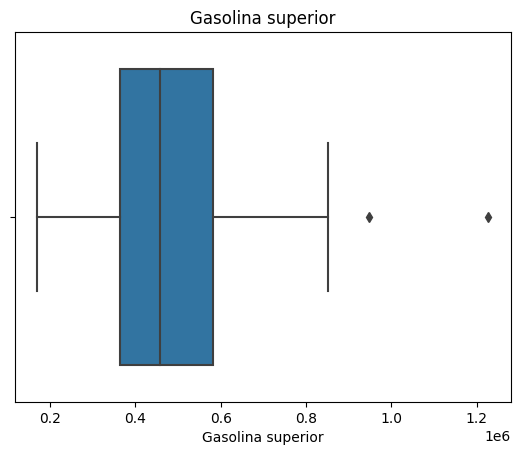

In [10]:
# Gasolina superior.
print(df["Gasolina superior"])

print(df2["Gasolina superior"].describe())

# Histogramas de todas las columnas numéricas
df["Gasolina superior"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Gasolina superior', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gasolina superior', data=df)
plt.title('Gasolina superior')
plt.show()

0      308156.82
1      307766.31
2      331910.29
3      315648.08
4      319667.97
         ...    
276    599501.29
277    544144.00
278    656941.64
279    585642.20
280    646221.20
Name: Gasolina superior, Length: 281, dtype: float64
count       281.000000
mean     457160.659412
std      104043.501753
min      300242.781667
25%      381595.195833
50%      416497.410000
75%      551000.790000
max      768102.830000
Name: Gasolina superior, dtype: float64


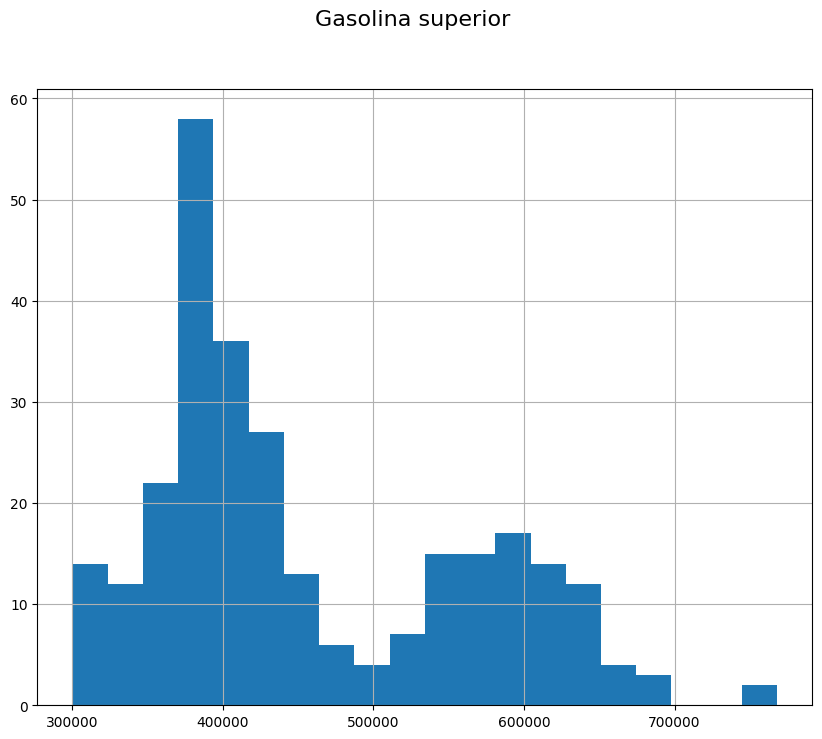

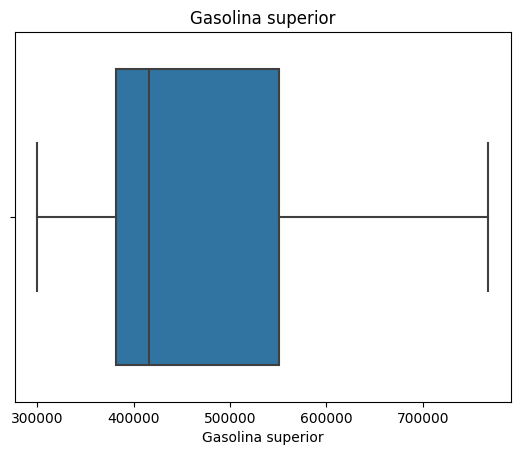

In [11]:
# Gasolina superior.
print(df2["Gasolina superior"])

print(df2["Gasolina superior"].describe())

# Histogramas de todas las columnas numéricas
df2["Gasolina superior"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Gasolina superior', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gasolina superior', data=df2)
plt.title('Gasolina superior')
plt.show()

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
264    1442099.08
265    1267967.39
266    1317519.91
267    1417182.73
268    1428099.62
Name: Diesel bajo azufre, Length: 269, dtype: float64
count    2.690000e+02
mean     2.707193e+05
std      4.923333e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.592580e+06
Name: Diesel bajo azufre, dtype: float64


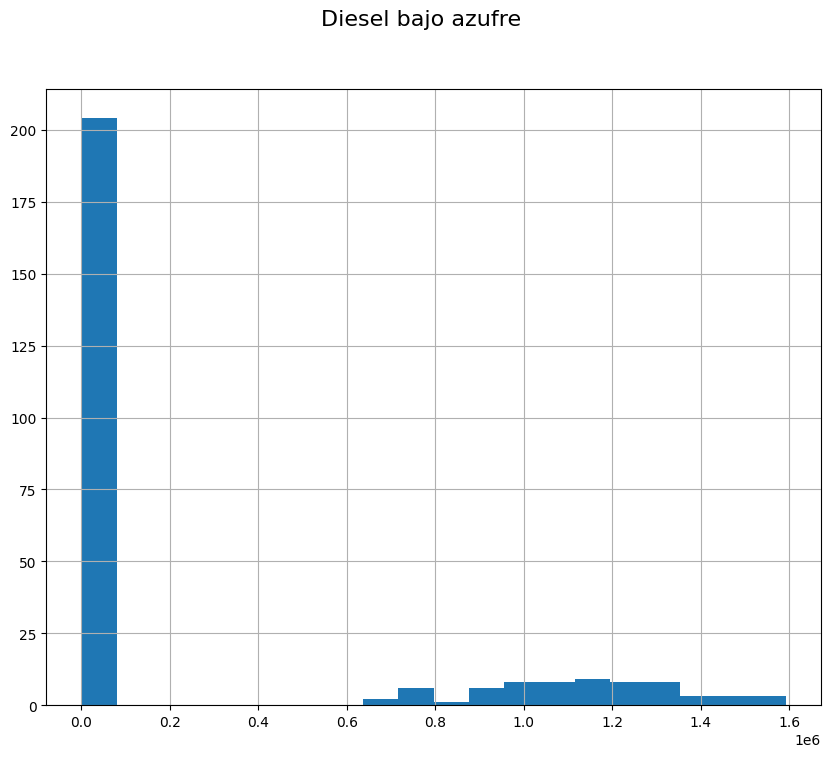

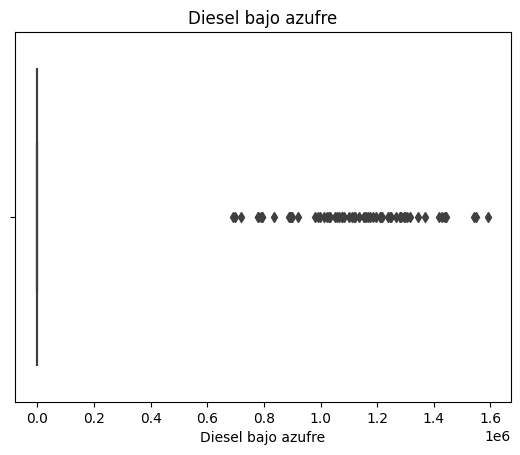

In [12]:
# Diesel bajo azufre.
print(df["Diesel bajo azufre"])

print(df["Diesel bajo azufre"].describe())

# Histogramas de todas las columnas numéricas
df["Diesel bajo azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel bajo azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel bajo azufre', data=df)
plt.title('Diesel bajo azufre')
plt.show()

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
276    1285932.51
277    1226884.63
278    1463008.43
279    1248429.37
280    1346554.12
Name: Diesel bajo azufre, Length: 281, dtype: float64
count    2.810000e+02
mean     2.603631e+05
std      4.804376e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.463008e+06
Name: Diesel bajo azufre, dtype: float64


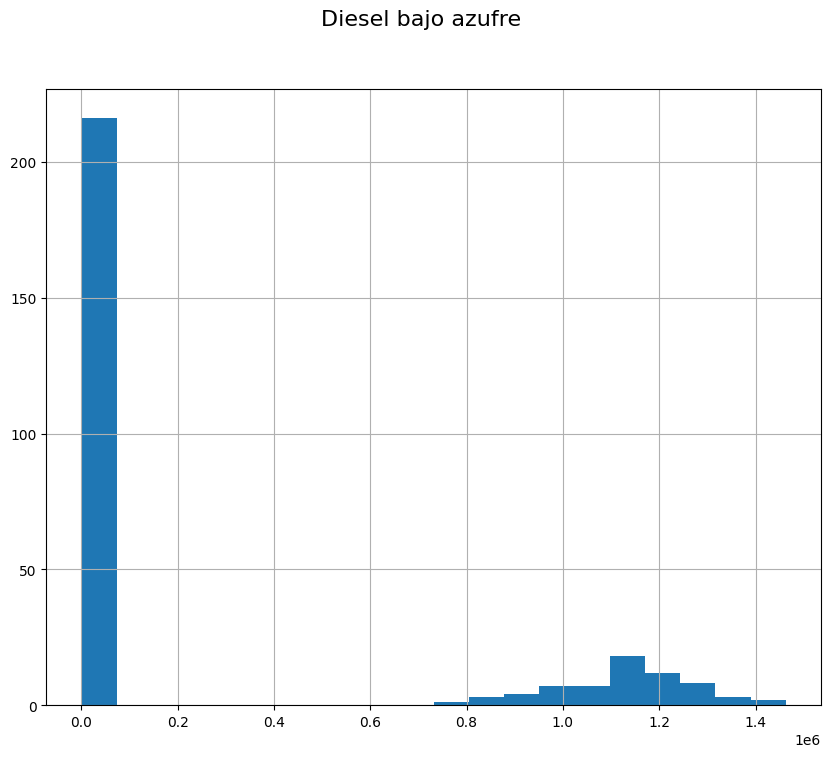

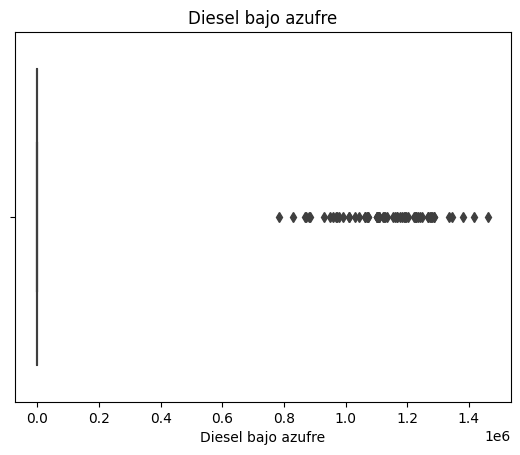

In [13]:
# Diesel bajo azufre.
print(df2["Diesel bajo azufre"])

print(df2["Diesel bajo azufre"].describe())

# Histogramas de todas las columnas numéricas
df2["Diesel bajo azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel bajo azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel bajo azufre', data=df2)
plt.title('Diesel bajo azufre')
plt.show()

0      566101.99
1      489525.80
2      575559.68
3      437745.42
4      552609.13
         ...    
264         0.00
265         0.00
266         0.00
267         0.00
268         0.00
Name: Diesel alto azufre, Length: 269, dtype: float64
count    2.690000e+02
mean     5.932604e+05
std      3.955986e+05
min      0.000000e+00
25%      3.219529e+05
50%      6.836644e+05
75%      8.508069e+05
max      1.595699e+06
Name: Diesel alto azufre, dtype: float64


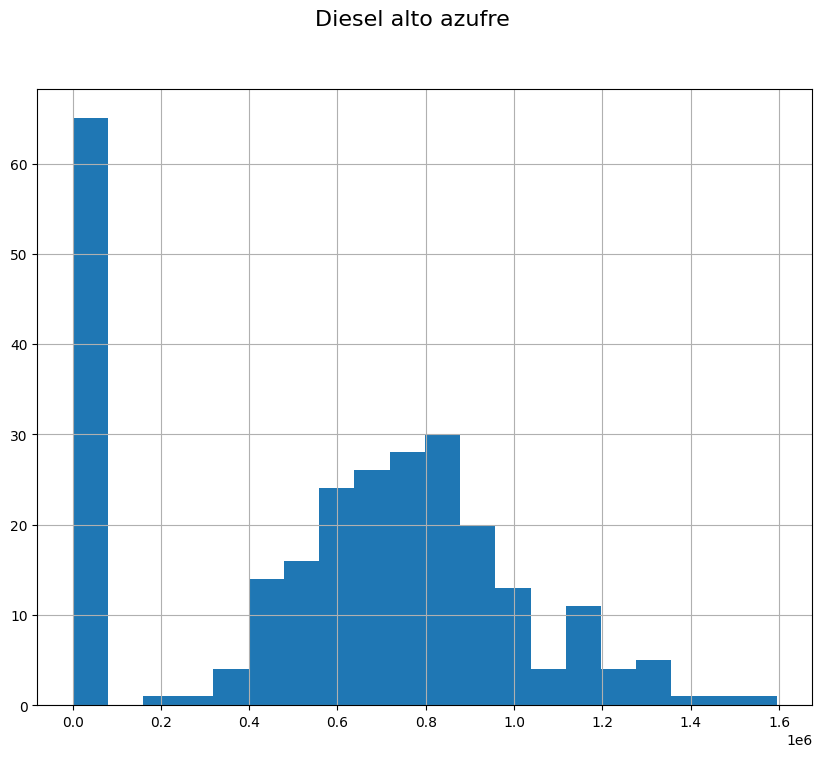

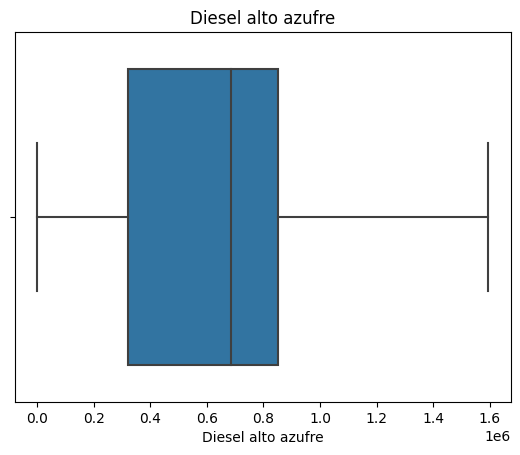

In [14]:
# Diesel alto azufre
print(df["Diesel alto azufre"])

print(df["Diesel alto azufre"].describe())

# Histogramas de todas las columnas numéricas
df["Diesel alto azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel alto azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel alto azufre', data=df)
plt.title('Diesel alto azufre')
plt.show()

0      634667.06
1      642380.66
2      699807.25
3      586803.98
4      656948.20
         ...    
276         0.00
277         0.00
278         0.00
279         0.00
280         0.00
Name: Diesel alto azufre, Length: 281, dtype: float64
count    2.810000e+02
mean     5.925927e+05
std      3.478895e+05
min      0.000000e+00
25%      5.578026e+05
50%      6.998072e+05
75%      8.076921e+05
max      1.216423e+06
Name: Diesel alto azufre, dtype: float64


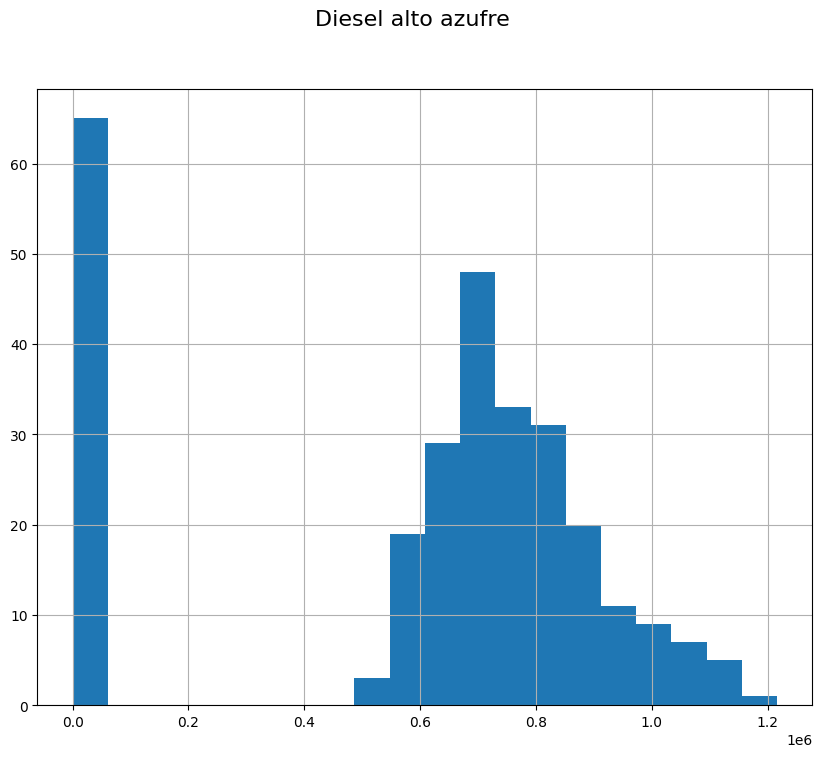

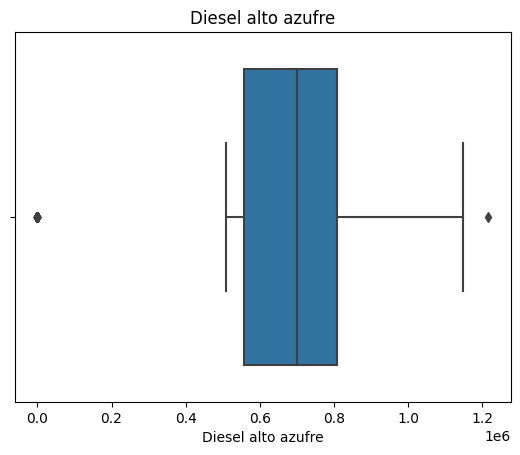

In [15]:
# Diesel alto azufre
print(df2["Diesel alto azufre"])

print(df2["Diesel alto azufre"].describe())

# Histogramas de todas las columnas numéricas
df2["Diesel alto azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel alto azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel alto azufre', data=df2)
plt.title('Diesel alto azufre')
plt.show()

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
264    45074.97
265        0.00
266     4985.21
267    21503.98
268    15047.82
Name: Diesel ultra bajo azufre, Length: 269, dtype: float64
count      269.000000
mean      2644.297993
std       8639.971237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      48945.910000
Name: Diesel ultra bajo azufre, dtype: float64


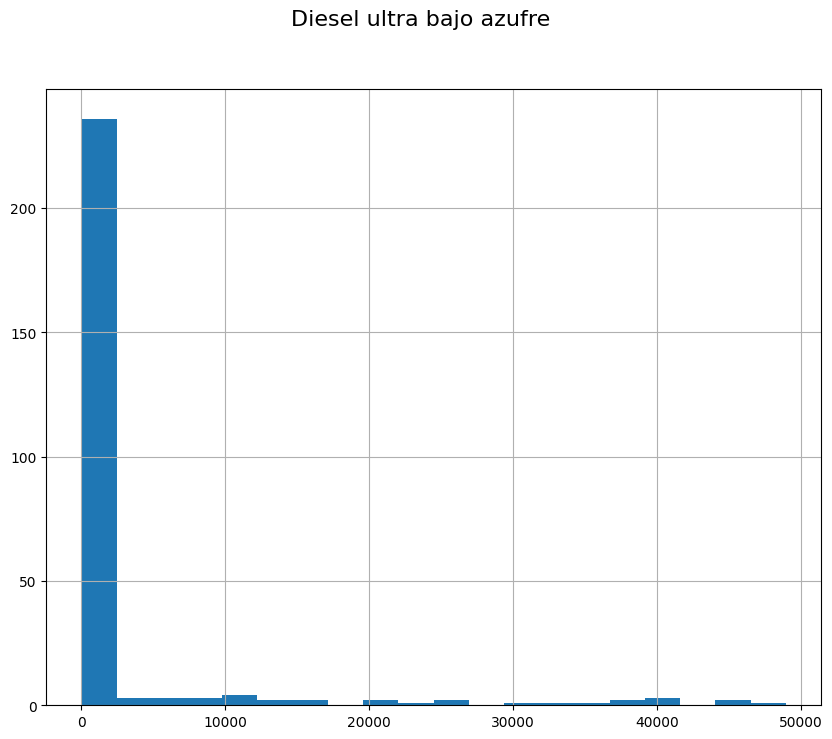

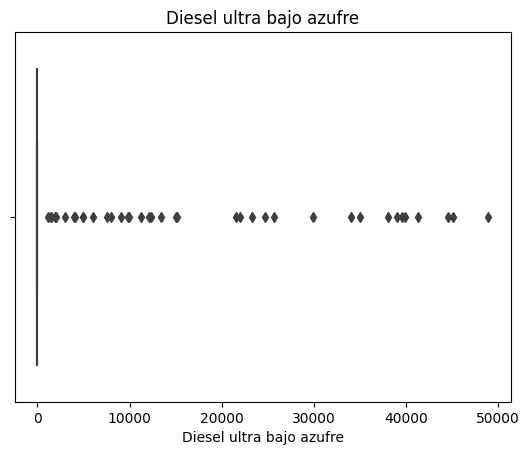

In [16]:
# Diesel ultra bajo azufre
print(df["Diesel ultra bajo azufre"])

print(df["Diesel ultra bajo azufre"].describe())

# Histogramas de todas las columnas numéricas
df["Diesel ultra bajo azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel ultra bajo azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel ultra bajo azufre', data=df)
plt.title('Diesel ultra bajo azufre')
plt.show()

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
276     9391.16
277     8398.95
278    11462.71
279    10553.37
280    12201.45
Name: Diesel ultra bajo azufre, Length: 281, dtype: float64
count      281.000000
mean      2303.973381
std       4363.660816
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      16475.250000
Name: Diesel ultra bajo azufre, dtype: float64


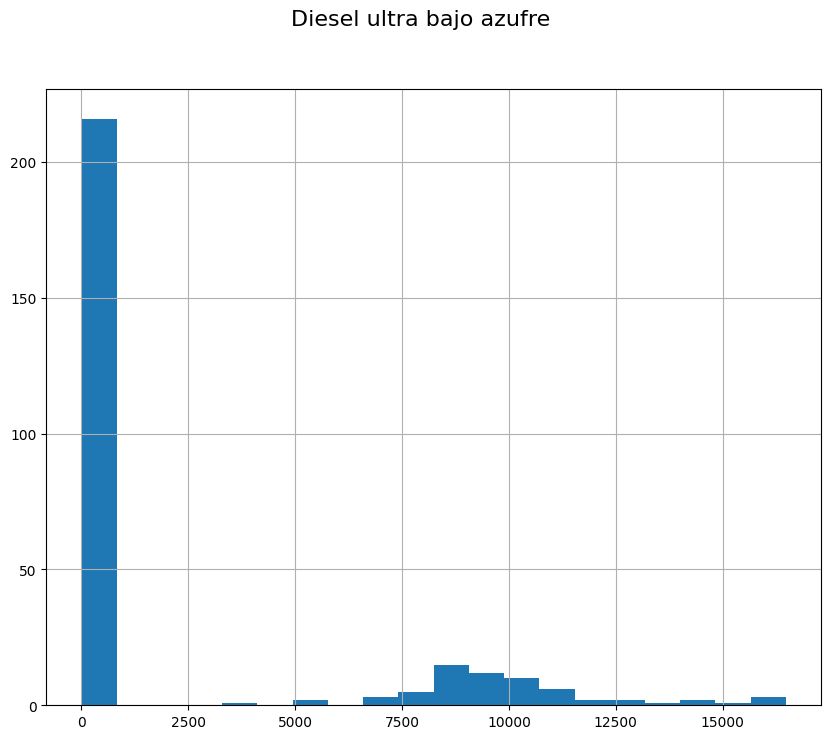

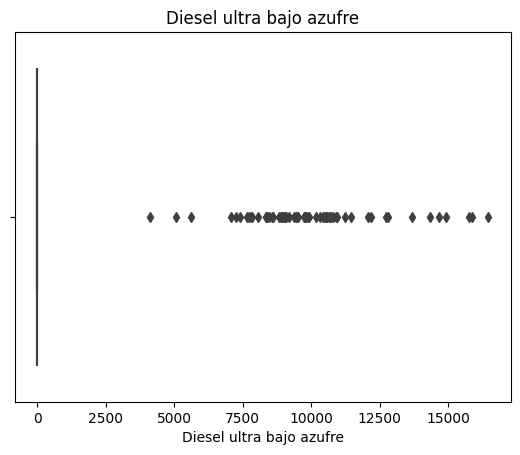

In [17]:
# Diesel ultra bajo azufre
print(df2["Diesel ultra bajo azufre"])

print(df2["Diesel ultra bajo azufre"].describe())

# Histogramas de todas las columnas numéricas
df2["Diesel ultra bajo azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel ultra bajo azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel ultra bajo azufre', data=df2)
plt.title('Diesel ultra bajo azufre')
plt.show()

0      194065.738095
1      170703.380952
2      161837.371429
3      163048.642857
4      171518.861905
           ...      
264    497780.690000
265    652984.710000
266    711978.350000
267    647666.300000
268    713348.990000
Name: Gas licuado de petróleo, Length: 269, dtype: float64
count       269.000000
mean     399026.255764
std      190173.418737
min      100561.466667
25%      218257.510952
50%      396363.050000
75%      540671.880952
max      960840.530000
Name: Gas licuado de petróleo, dtype: float64


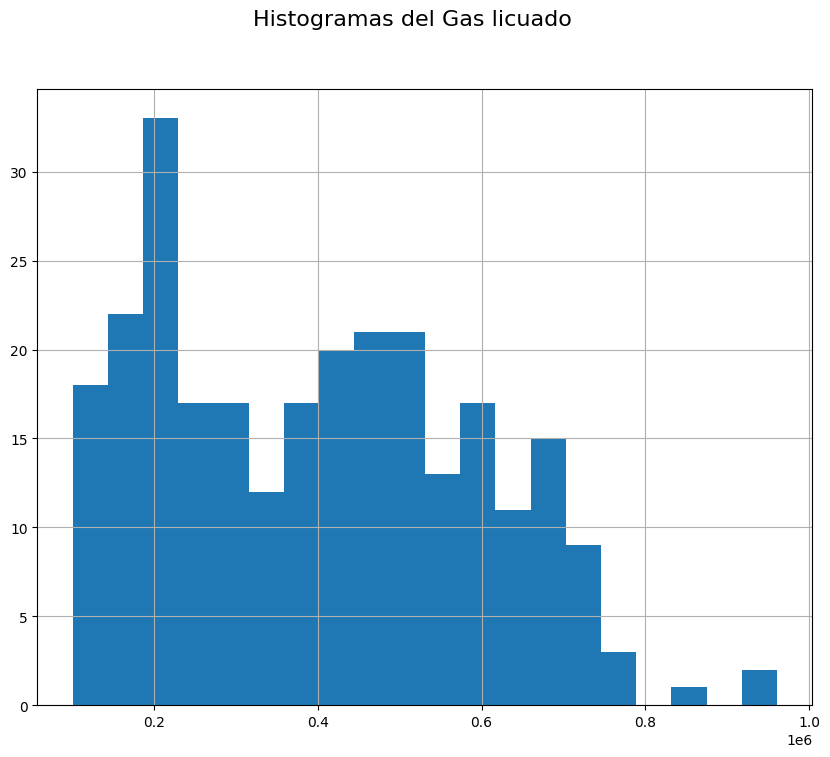

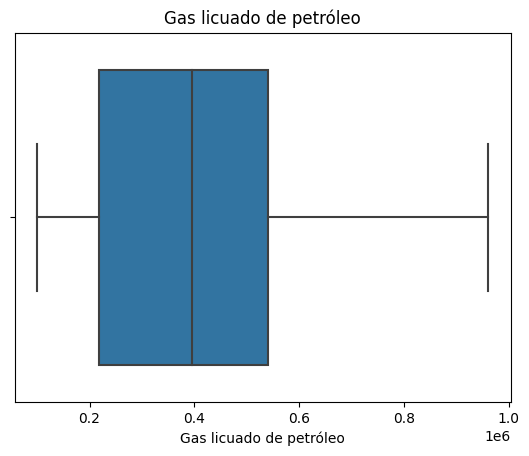

In [18]:
# Gas licuado de petróleo
print(df["Gas licuado de petróleo"])

print(df["Gas licuado de petróleo"].describe())

# Histogramas de todas las columnas numéricas
df["Gas licuado de petróleo"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histogramas del Gas licuado', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gas licuado de petróleo', data=df)
plt.title('Gas licuado de petróleo')
plt.show()

0      194410.476190
1      174710.552381
2      189234.066667
3      174330.607143
4      191745.147619
           ...      
276    574148.000000
277    497273.190000
278    588892.160000
279    513919.890000
280    565814.790000
Name: Gas licuado de petróleo, Length: 281, dtype: float64
count       281.000000
mean     303105.399669
std      101787.584186
min      167818.137897
25%      225593.823095
50%      256040.102381
75%      373503.775714
max      588892.160000
Name: Gas licuado de petróleo, dtype: float64


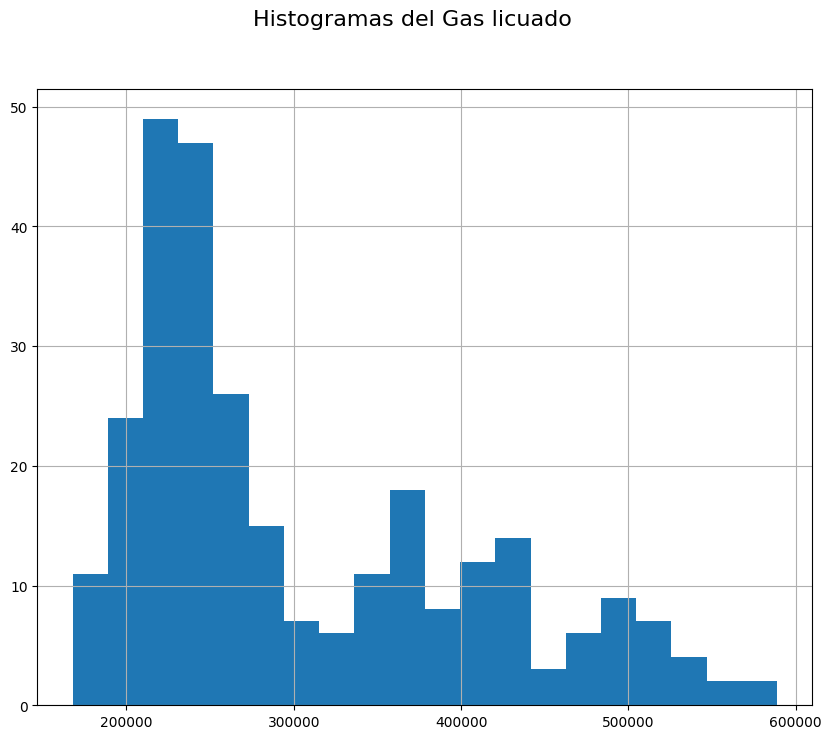

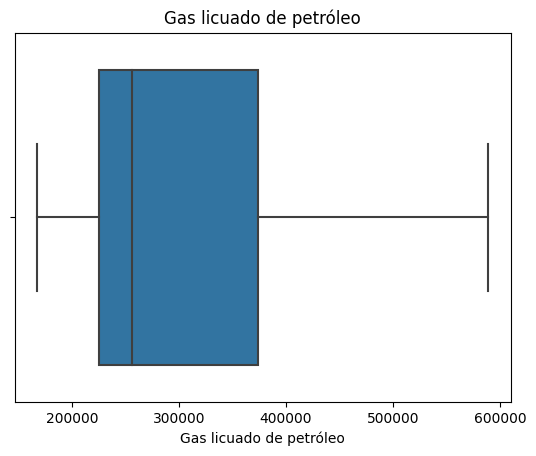

In [19]:
# Gas licuado de petróleo
print(df2["Gas licuado de petróleo"])

print(df2["Gas licuado de petróleo"].describe())

# Histogramas de todas las columnas numéricas
df2["Gas licuado de petróleo"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histogramas del Gas licuado', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gas licuado de petróleo', data=df2)
plt.title('Gas licuado de petróleo')
plt.show()

#### Verificando los meses en los que hay más importaciones.

0     2001-01-01
1     2001-02-01
2     2001-03-01
3     2001-04-01
4     2001-05-01
         ...    
264   2023-01-01
265   2023-02-01
266   2023-03-01
267   2023-04-01
268   2023-05-01
Name: Fecha, Length: 269, dtype: datetime64[ns]
0      1
1      2
2      3
3      4
4      5
      ..
264    1
265    2
266    3
267    4
268    5
Name: mes, Length: 269, dtype: int32
mes
1     6.551964e+07
2     5.943550e+07
3     6.868623e+07
4     6.407447e+07
5     6.624585e+07
6     5.667567e+07
7     5.614741e+07
8     5.626350e+07
9     5.222438e+07
10    5.782820e+07
11    5.724037e+07
12    6.157861e+07
Name: Total importación, dtype: float64


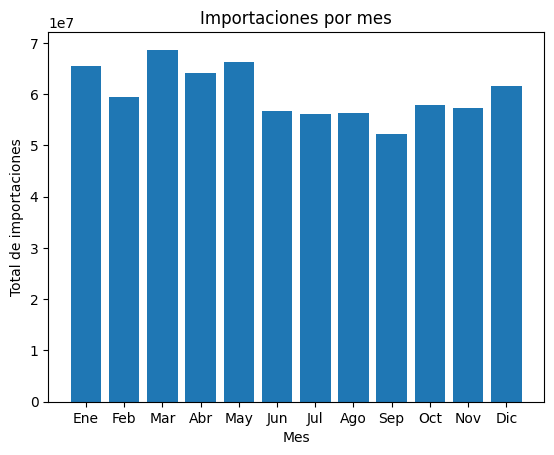

mes
3     6.868623e+07
5     6.624585e+07
1     6.551964e+07
4     6.407447e+07
12    6.157861e+07
2     5.943550e+07
10    5.782820e+07
11    5.724037e+07
6     5.667567e+07
8     5.626350e+07
7     5.614741e+07
9     5.222438e+07
Name: Total importación, dtype: float64
El mes con más importaciones fue: March


In [20]:
# Cambio de formato.

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Imprimiendo la fecha.
print(df["Fecha"])

df['mes'] = df['Fecha'].dt.month

# Imprimiendo el mes.
print(df["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df.groupby('mes')['Total importación'].sum()

print(importaciones_por_mes)

# Ordenar los meses por orden cronológico
importaciones_por_mes = importaciones_por_mes.sort_index()

# Gráfico de barras para mostrar las importaciones por mes
plt.bar(importaciones_por_mes.index, importaciones_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Total de importaciones')
plt.title('Importaciones por mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Obteniendo los meses con más exportación en orden descendente.
meses_mas_importaciones = importaciones_por_mes.sort_values(ascending=False)
print(meses_mas_importaciones)


# Ordenar los meses por orden cronológico
importaciones_por_mes = importaciones_por_mes.sort_index()

# Obtener el nombre del mes con más importaciones
mes_max_importaciones = importaciones_por_mes.idxmax()

# Obtener el nombre del mes usando el módulo calendar
nombre_mes_max_importaciones = calendar.month_name[mes_max_importaciones]

print("El mes con más importaciones fue:", nombre_mes_max_importaciones)

#### Verificando los meses en donde hay más consumo

0     2000-01-01
1     2000-02-01
2     2000-03-01
3     2000-04-01
4     2000-05-01
         ...    
276   2023-01-01
277   2023-02-01
278   2023-03-01
279   2023-04-01
280   2023-05-01
Name: Fecha, Length: 281, dtype: datetime64[ns]
0      1
1      2
2      3
3      4
4      5
      ..
276    1
277    2
278    3
279    4
280    5
Name: mes, Length: 281, dtype: int32
mes
1     6.239329e+07
2     6.072456e+07
3     6.740221e+07
4     6.339105e+07
5     6.496297e+07
6     5.613530e+07
7     5.729006e+07
8     5.777696e+07
9     5.392756e+07
10    5.749272e+07
11    5.897910e+07
12    6.273060e+07
Name: Total, dtype: float64


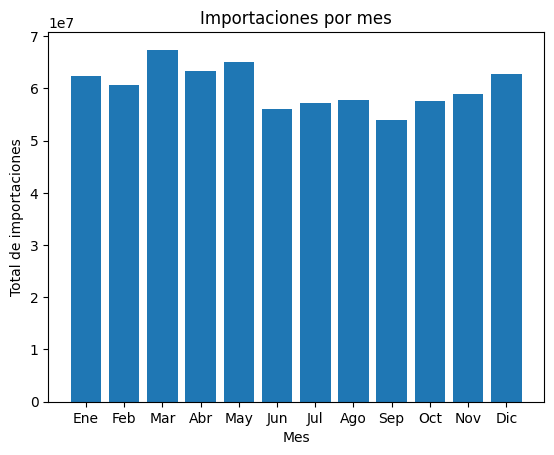

mes
3     6.740221e+07
5     6.496297e+07
4     6.339105e+07
12    6.273060e+07
1     6.239329e+07
2     6.072456e+07
11    5.897910e+07
8     5.777696e+07
10    5.749272e+07
7     5.729006e+07
6     5.613530e+07
9     5.392756e+07
Name: Total, dtype: float64
El mes con más importaciones fue: March


In [21]:
# Cambio de formato.

df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Imprimiendo la fecha.
print(df2["Fecha"])

df2['mes'] = df2['Fecha'].dt.month

# Imprimiendo el mes.
print(df2["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df2.groupby('mes')['Total'].sum()

print(importaciones_por_mes)

# Ordenar los meses por orden cronológico
importaciones_por_mes = importaciones_por_mes.sort_index()

# Gráfico de barras para mostrar las importaciones por mes
plt.bar(importaciones_por_mes.index, importaciones_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Total de importaciones')
plt.title('Importaciones por mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Obteniendo los meses con más exportación en orden descendente.
meses_mas_importaciones = importaciones_por_mes.sort_values(ascending=False)
print(meses_mas_importaciones)


# Ordenar los meses por orden cronológico
importaciones_por_mes = importaciones_por_mes.sort_index()

# Obtener el nombre del mes con más importaciones
mes_max_importaciones = importaciones_por_mes.idxmax()

# Obtener el nombre del mes usando el módulo calendar
nombre_mes_max_importaciones = calendar.month_name[mes_max_importaciones]

print("El mes con más importaciones fue:", nombre_mes_max_importaciones)

#### Viendo el comportamiento de las exportaciones comprendido entre el 2018 hasta el 2023

0     2001-01-01
1     2001-02-01
2     2001-03-01
3     2001-04-01
4     2001-05-01
         ...    
264   2023-01-01
265   2023-02-01
266   2023-03-01
267   2023-04-01
268   2023-05-01
Name: Fecha, Length: 269, dtype: datetime64[ns]
0      1
1      2
2      3
3      4
4      5
      ..
264    1
265    2
266    3
267    4
268    5
Name: mes, Length: 269, dtype: int32
mes
1     6.551964e+07
2     5.943550e+07
3     6.868623e+07
4     6.407447e+07
5     6.624585e+07
6     5.667567e+07
7     5.614741e+07
8     5.626350e+07
9     5.222438e+07
10    5.782820e+07
11    5.724037e+07
12    6.157861e+07
Name: Total importación, dtype: float64


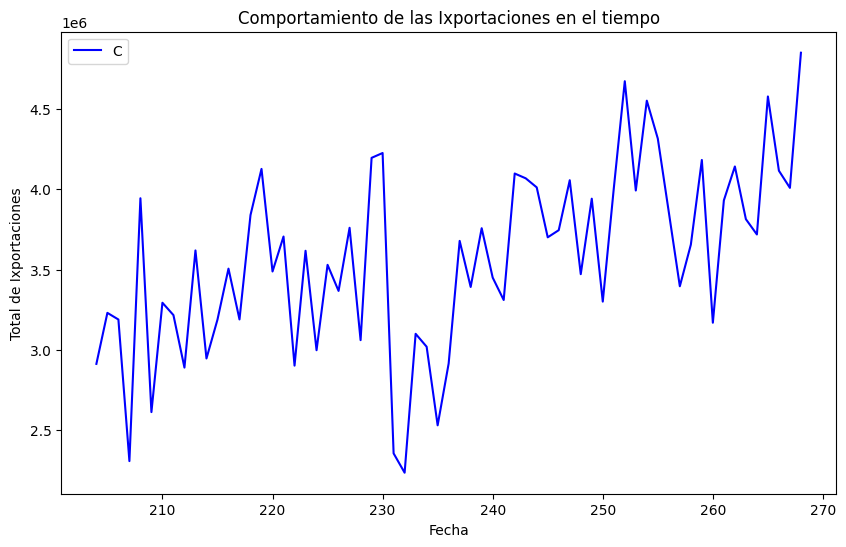

In [22]:
# Cambio de formato.

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Imprimiendo la fecha.
print(df["Fecha"])

df['mes'] = df['Fecha'].dt.month

# Imprimiendo el mes.
print(df["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df.groupby('mes')['Total importación'].sum()

print(importaciones_por_mes)

# Filtrar el DataFrame para incluir solo datos desde 2018 hasta 2023
df = df[(df['Fecha'] >= '2018-01-01') & (df['Fecha'] <= '2023-12-31')]

# Gráfico de línea para mostrar el comportamiento de las exportaciones en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total importación'], label='Importaciones desde el 2018 hasta el 2023', color='b')
plt.xlabel('Fecha')
plt.ylabel('Total de Ixportaciones')
plt.title('Comportamiento de las Ixportaciones en el tiempo')
plt.legend("Compartamiento desde el 2018 hasta el 2023")
plt.show()


#### Viendo el comportamiento de consumo entre 2018 y 2023

0     2000-01-01
1     2000-02-01
2     2000-03-01
3     2000-04-01
4     2000-05-01
         ...    
276   2023-01-01
277   2023-02-01
278   2023-03-01
279   2023-04-01
280   2023-05-01
Name: Fecha, Length: 281, dtype: datetime64[ns]
0      1
1      2
2      3
3      4
4      5
      ..
276    1
277    2
278    3
279    4
280    5
Name: mes, Length: 281, dtype: int32
mes
1     6.239329e+07
2     6.072456e+07
3     6.740221e+07
4     6.339105e+07
5     6.496297e+07
6     5.613530e+07
7     5.729006e+07
8     5.777696e+07
9     5.392756e+07
10    5.749272e+07
11    5.897910e+07
12    6.273060e+07
Name: Total, dtype: float64


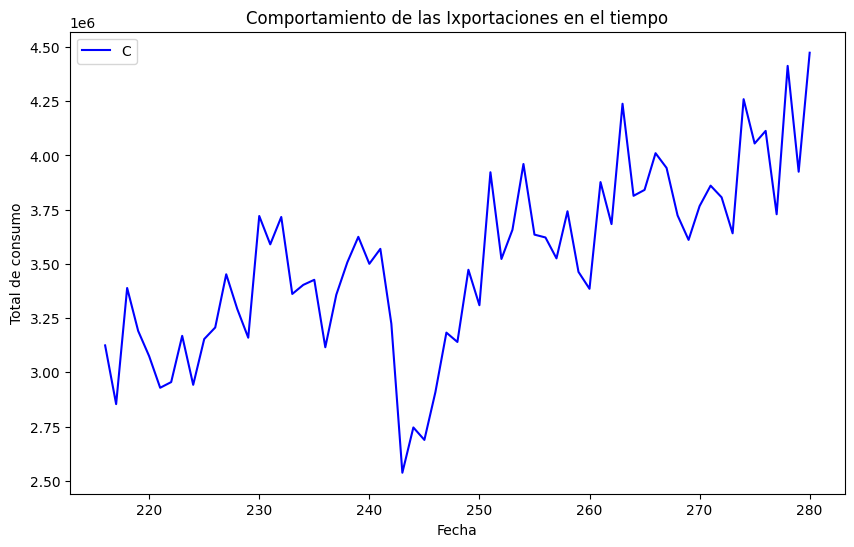

In [23]:
# Cambio de formato.

df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Imprimiendo la fecha.
print(df2["Fecha"])

df2['mes'] = df2['Fecha'].dt.month

# Imprimiendo el mes.
print(df2["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df2.groupby('mes')['Total'].sum()

print(importaciones_por_mes)

# Filtrar el DataFrame para incluir solo datos desde 2018 hasta 2023
df2 = df2[(df2['Fecha'] >= '2018-01-01') & (df2['Fecha'] <= '2023-12-31')]

# Gráfico de línea para mostrar el comportamiento de las exportaciones en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['Total'], label='Importaciones desde el 2018 hasta el 2023', color='b')
plt.xlabel('Fecha')
plt.ylabel('Total de consumo')
plt.title('Comportamiento de las Ixportaciones en el tiempo')
plt.legend("Compartamiento desde el 2018 hasta el 2023")
plt.show()


#### Comportamiento de la importación durante la pandemia

204   2018-01-01
205   2018-02-01
206   2018-03-01
207   2018-04-01
208   2018-05-01
         ...    
264   2023-01-01
265   2023-02-01
266   2023-03-01
267   2023-04-01
268   2023-05-01
Name: Fecha, Length: 65, dtype: datetime64[ns]
204    1
205    2
206    3
207    4
208    5
      ..
264    1
265    2
266    3
267    4
268    5
Name: mes, Length: 65, dtype: int32
mes
1     2.131839e+07
2     2.249465e+07
3     2.401840e+07
4     2.117984e+07
5     2.238413e+07
6     1.651291e+07
7     1.661294e+07
8     1.760061e+07
9     1.544022e+07
10    1.869802e+07
11    1.714551e+07
12    1.852302e+07
Name: Total importación, dtype: float64


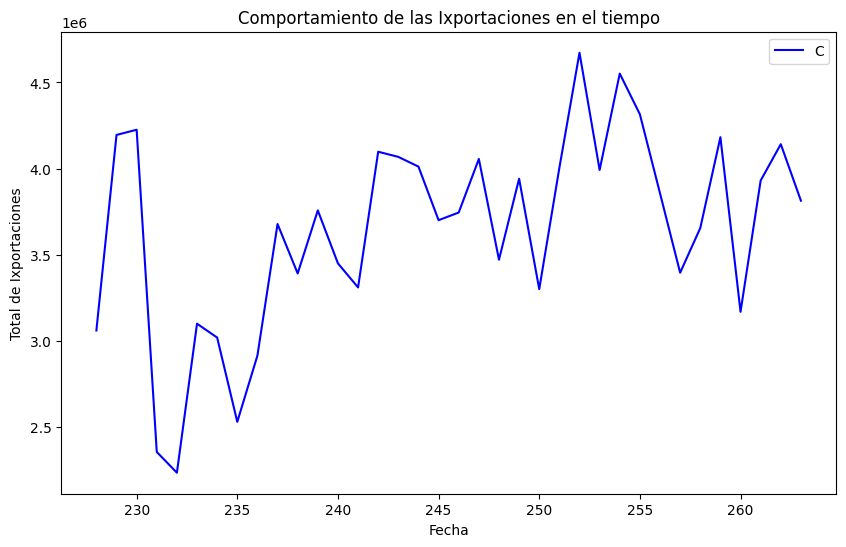

In [24]:
# Cambio de formato.

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Imprimiendo la fecha.
print(df["Fecha"])

df['mes'] = df['Fecha'].dt.month

# Imprimiendo el mes.
print(df["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df.groupby('mes')['Total importación'].sum()

print(importaciones_por_mes)

# Filtrar el DataFrame para incluir solo datos desde 2018 hasta 2023
df = df[(df['Fecha'] >= '2020-01-01') & (df['Fecha'] <= '2022-12-31')]

# Gráfico de línea para mostrar el comportamiento de las exportaciones en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total importación'], label='Importaciones desde el 2018 hasta el 2023', color='b')
plt.xlabel('Fecha')
plt.ylabel('Total de Ixportaciones')
plt.title('Comportamiento de las Ixportaciones en el tiempo')
plt.legend("Compartamiento desde el 2018 hasta el 2023")
plt.show()


#### Consumo durante la pandemia

216   2018-01-01
217   2018-02-01
218   2018-03-01
219   2018-04-01
220   2018-05-01
         ...    
276   2023-01-01
277   2023-02-01
278   2023-03-01
279   2023-04-01
280   2023-05-01
Name: Fecha, Length: 65, dtype: datetime64[ns]
216    1
217    2
218    3
219    4
220    5
      ..
276    1
277    2
278    3
279    4
280    5
Name: mes, Length: 65, dtype: int32
mes
1     2.136590e+07
2     2.080869e+07
3     2.271654e+07
4     2.081976e+07
5     2.135446e+07
6     1.611408e+07
7     1.677529e+07
8     1.710097e+07
9     1.638929e+07
10    1.750144e+07
11    1.796495e+07
12    1.929178e+07
Name: Total, dtype: float64


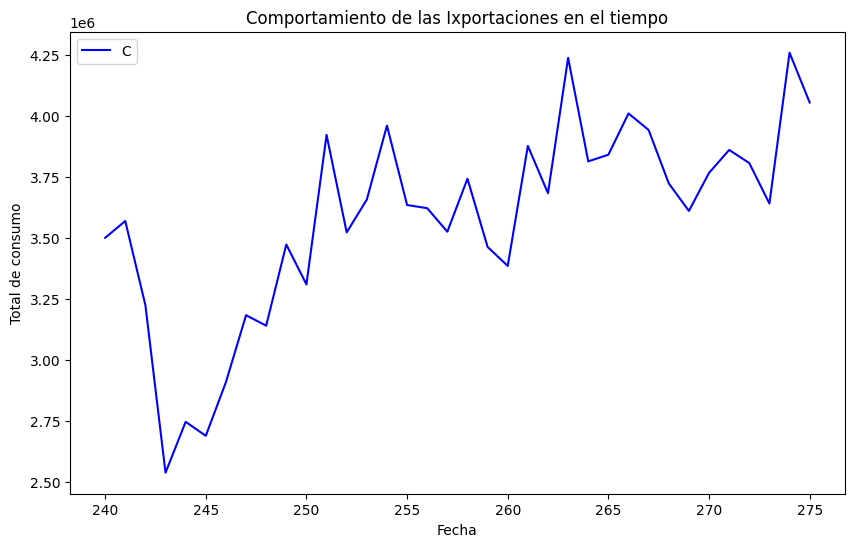

In [25]:
# Cambio de formato.

df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Imprimiendo la fecha.
print(df2["Fecha"])

df2['mes'] = df2['Fecha'].dt.month

# Imprimiendo el mes.
print(df2["mes"])

# Calculando las importaciones por mes.
consumo_pandemia = df2.groupby('mes')['Total'].sum()

print(consumo_pandemia)

# Filtrar el DataFrame para incluir solo datos desde 2018 hasta 2023
df2 = df2[(df2['Fecha'] >= '2020-01-01') & (df2['Fecha'] <= '2022-12-31')]

# Gráfico de línea para mostrar el comportamiento de las exportaciones en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['Total'], label='Consumo durante la pandema', color='b')
plt.xlabel('Fecha')
plt.ylabel('Total de consumo')
plt.title('Comportamiento de las Ixportaciones en el tiempo')
plt.legend("Compartamiento del consumo durante la pandemia")
plt.show()


####  Picos en importaciones por año por tipo de combustibles

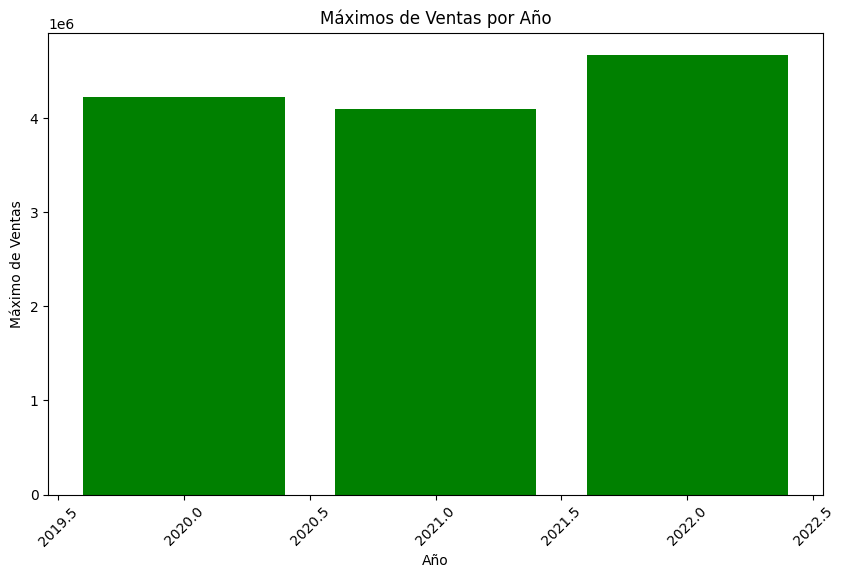

In [26]:
# Patrones de nombres de columnas relacionadas con tipos de combustible
patrones_combustible = r'Gasolina|Diesel|Gas licuado de petróleo'

# Filtrar las columnas relacionadas con tipos de combustible
columnas_combustible = df.filter(regex=patrones_combustible)

# Convertir la columna de fecha al tipo de dato 'datetime'
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer el año de la columna de fecha
df['Año'] = df['Fecha'].dt.year

# Obteniendo el máximo de ventas por año
maximo_ventas = df.groupby('Año').max()

# Visualizar los máximos de ventas en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(maximo_ventas.index, maximo_ventas['Total importación'], color='g')
plt.xlabel('Año')
plt.ylabel('Máximo de Ventas')
plt.title('Máximos de Ventas por Año')
plt.xticks(rotation=45)
plt.show()

#### Picos de consumo por año y tipo de de combustible

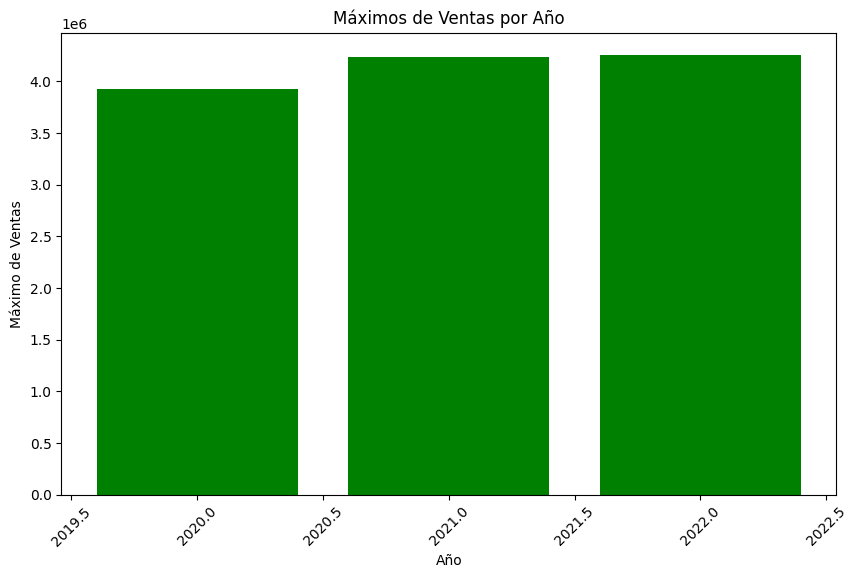

In [27]:
# Patrones de nombres de columnas relacionadas con tipos de combustible
patrones_combustible = r'Gasolina|Diesel|Gas licuado de petróleo'

# Filtrar las columnas relacionadas con tipos de combustible
columnas_combustible = df2.filter(regex=patrones_combustible)

# Convertir la columna de fecha al tipo de dato 'datetime'
df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Extraer el año de la columna de fecha
df2['Año'] = df2['Fecha'].dt.year

# Obteniendo el máximo de ventas por año
maximo_ventas = df2.groupby('Año').max()

# Visualizar los máximos de ventas en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(maximo_ventas.index, maximo_ventas['Total'], color='g')
plt.xlabel('Año')
plt.ylabel('Máximo de Ventas')
plt.title('Máximos de Ventas por Año')
plt.xticks(rotation=45)
plt.show()

#### Analizando la correlación entre las gasolinas y el total de importación.

                          Diesel bajo azufre  Diesel ultra bajo azufre   
Diesel bajo azufre                  1.000000                  0.155028  \
Diesel ultra bajo azufre            0.155028                  1.000000   
Gasolina superior                   0.503870                  0.103238   
Diesel alto azufre                       NaN                       NaN   
Gasolina regular                    0.395611                 -0.033806   
Gas licuado de petróleo             0.011612                 -0.199601   
Total importación                   0.782976                 -0.008097   

                          Gasolina superior  Diesel alto azufre   
Diesel bajo azufre                 0.503870                 NaN  \
Diesel ultra bajo azufre           0.103238                 NaN   
Gasolina superior                  1.000000                 NaN   
Diesel alto azufre                      NaN                 NaN   
Gasolina regular                   0.404844                 NaN   
Gas l

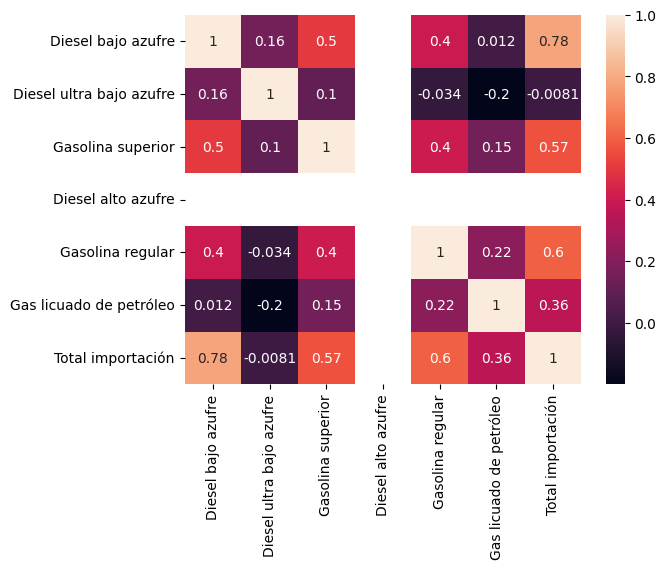

In [28]:
# Selecciona las columnas de interés
columns_of_interest = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo', "Total importación"]
subset_df = df[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = subset_df.corr()

# Muestra la matriz de correlación
print(correlation_matrix)

# Graficando la matriz de correlación.
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Analizando la correlación entre las gasolinas y el consumo.

                          Diesel bajo azufre  Diesel ultra bajo azufre   
Diesel bajo azufre                  1.000000                  0.582191  \
Diesel ultra bajo azufre            0.582191                  1.000000   
Gasolina superior                   0.738270                  0.774975   
Diesel alto azufre                       NaN                       NaN   
Gasolina regular                    0.651068                  0.475449   
Gas licuado de petróleo             0.544477                  0.434581   
Total                               0.850094                  0.566787   

                          Gasolina superior  Diesel alto azufre   
Diesel bajo azufre                 0.738270                 NaN  \
Diesel ultra bajo azufre           0.774975                 NaN   
Gasolina superior                  1.000000                 NaN   
Diesel alto azufre                      NaN                 NaN   
Gasolina regular                   0.589994                 NaN   
Gas l

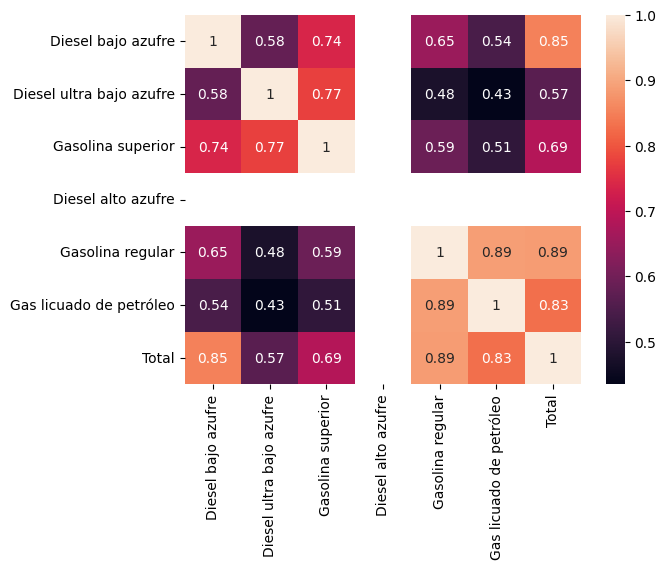

In [29]:
# Selecciona las columnas de interés
columns_of_interest = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo', "Total"]
subset_df = df2[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = subset_df.corr()

# Muestra la matriz de correlación
print(correlation_matrix)

# Graficando la matriz de correlación.
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Haciendo análisis de correlación cruzada para la importación

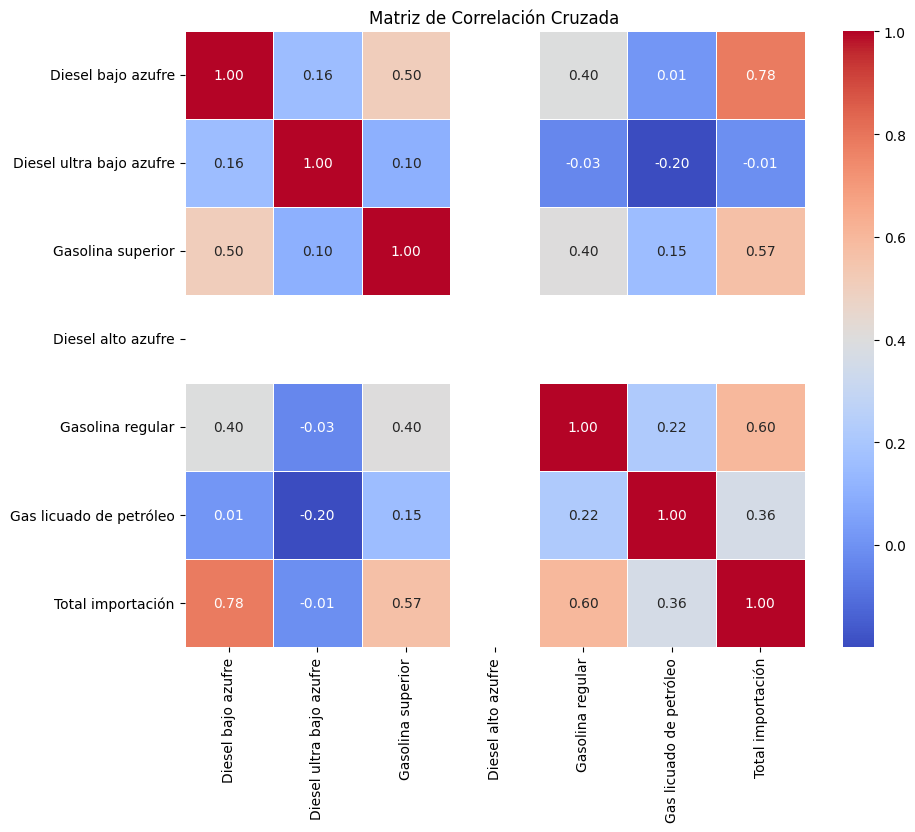

In [30]:
# Selecciona las columnas de interés
gasolina_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']
total_import_column = 'Total importación'

# Crea un DataFrame con las columnas de gasolina y el total de importación
gasolina_total_import_df = df[gasolina_columns + [total_import_column]]

# Calcula la matriz de correlación cruzada
correlation_matrix = gasolina_total_import_df.corr()

# Grafica el mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Cruzada')
plt.show()

#### Haciendo correlación cruzada en el consumo

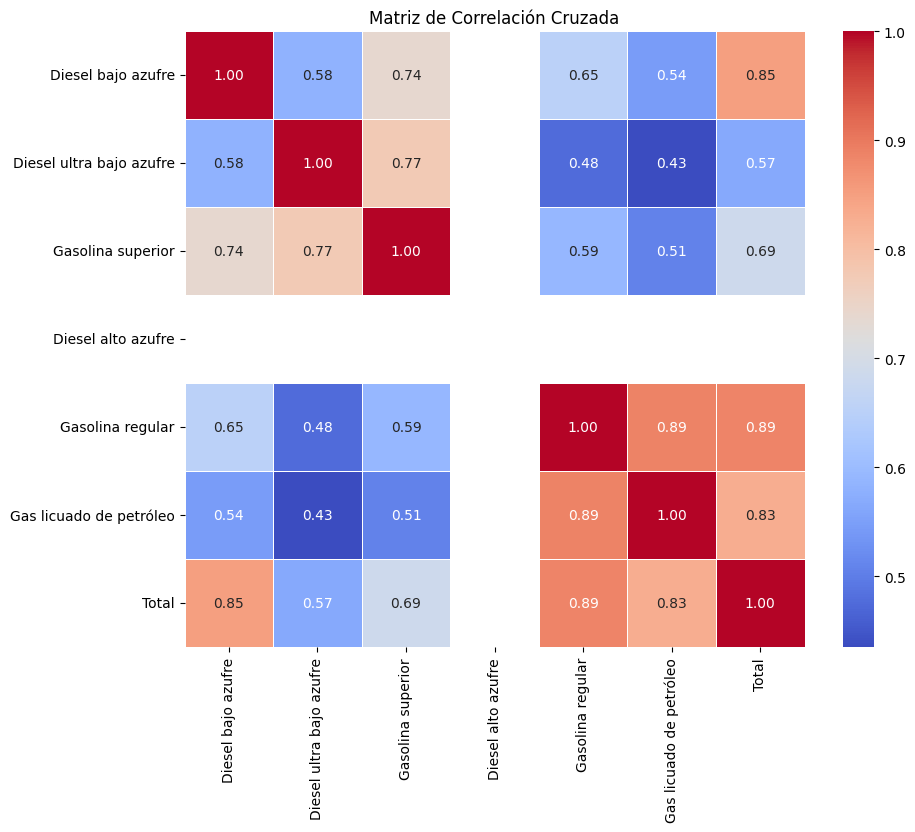

In [31]:
# Selecciona las columnas de interés
gasolina_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']
total_import_column = 'Total'

# Crea un DataFrame con las columnas de gasolina y el total de importación
gasolina_total_import_df = df2[gasolina_columns + [total_import_column]]

# Calcula la matriz de correlación cruzada
correlation_matrix = gasolina_total_import_df.corr()

# Grafica el mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Cruzada')
plt.show()

#### Comparación de las importaciones de los productos

In [32]:
# Selecciona las columnas de interés para el análisis de comparación
product_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']

# Calcula la suma de importaciones para cada producto
total_imports_by_product = df[product_columns].sum()

# Muestra la comparación de las importaciones para cada producto
print(total_imports_by_product)

Diesel bajo azufre          4.072828e+07
Diesel ultra bajo azufre    3.951415e+05
Gasolina superior           2.223256e+07
Diesel alto azufre          0.000000e+00
Gasolina regular            2.554468e+07
Gas licuado de petróleo     2.208297e+07
dtype: float64


#### Comparación del consumo de los productos

In [33]:
# Selecciona las columnas de interés para el análisis de comparación
product_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']

# Calcula la suma de importaciones para cada producto
total_imports_by_product = df2[product_columns].sum()

# Muestra la comparación de las importaciones para cada producto
print(total_imports_by_product)

Diesel bajo azufre          41002028.58
Diesel ultra bajo azufre      364897.46
Gasolina superior           21364449.76
Diesel alto azufre                 0.00
Gasolina regular            25012484.79
Gas licuado de petróleo     17153432.58
dtype: float64


#### Análisis de outliers de las variables de la importación.

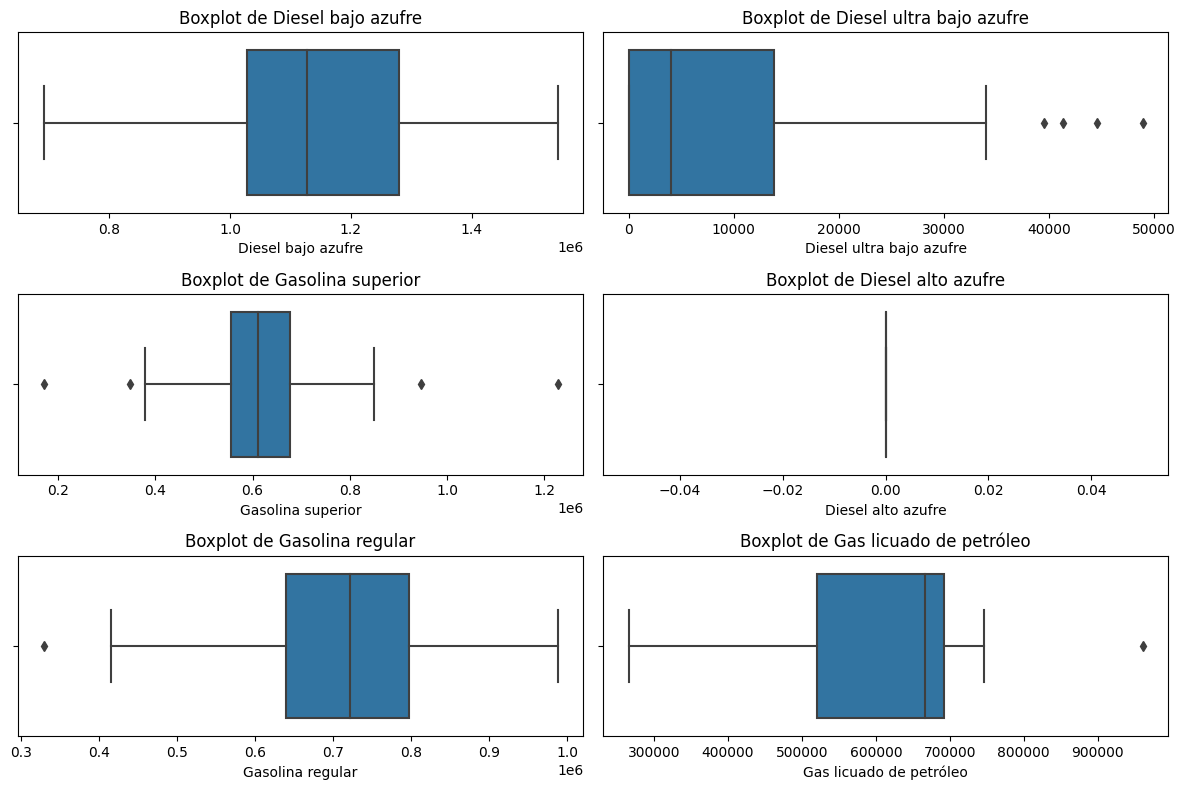

In [34]:
# Selecciona las columnas de interés para el análisis de outliers
outlier_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']

# Crea un subplot de tamaño 3x2 para visualizar los boxplots
plt.figure(figsize=(12, 8))

# Itera sobre cada columna para crear los boxplots
for i, column in enumerate(outlier_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

#### Análisis de outliers de las variables del consumo.

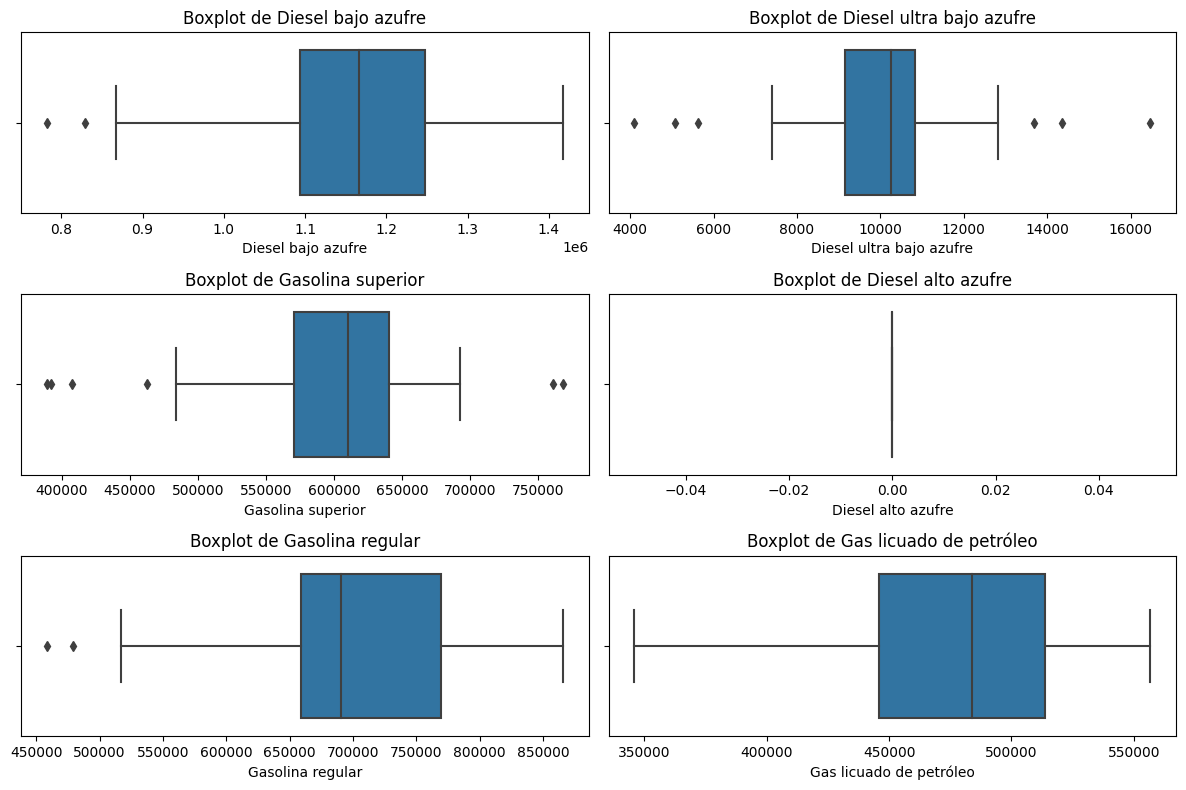

In [35]:
# Selecciona las columnas de interés para el análisis de outliers
outlier_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']

# Crea un subplot de tamaño 3x2 para visualizar los boxplots
plt.figure(figsize=(12, 8))

# Itera sobre cada columna para crear los boxplots
for i, column in enumerate(outlier_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df2[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

### Inciso 2: Consumo mensual de gasolina , gasolina regular, diésel y gas licuado en importación.

Index(['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas',
       'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido',
       'Total importación', 'mes', 'Año'],
      dtype='object')


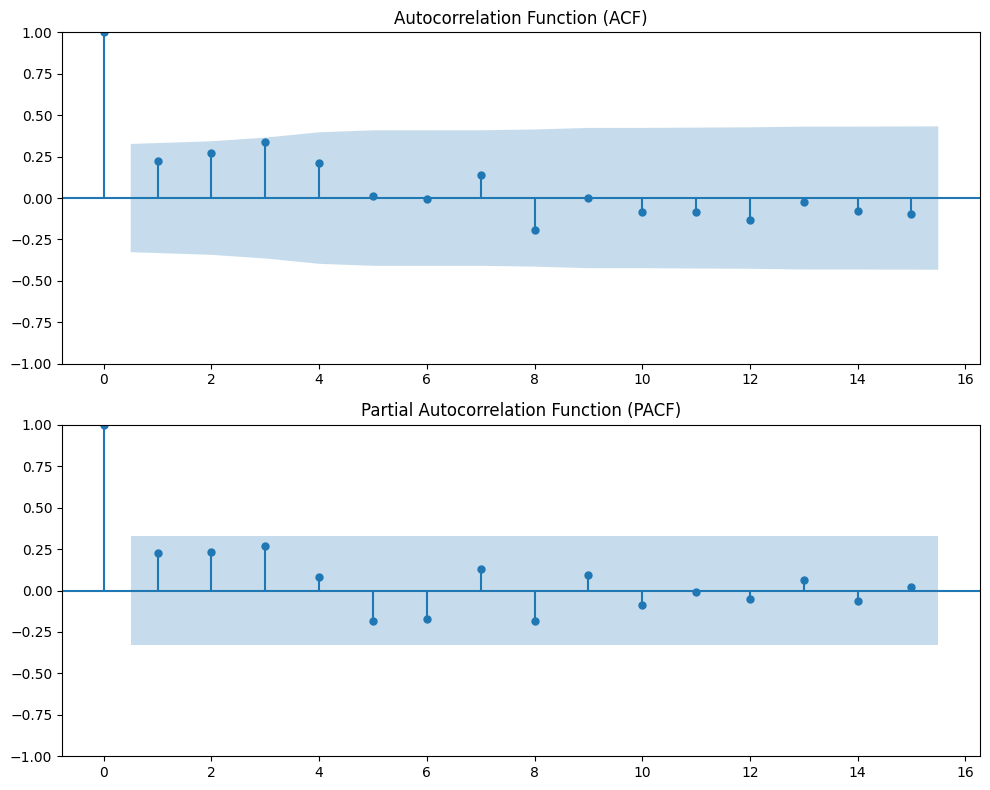

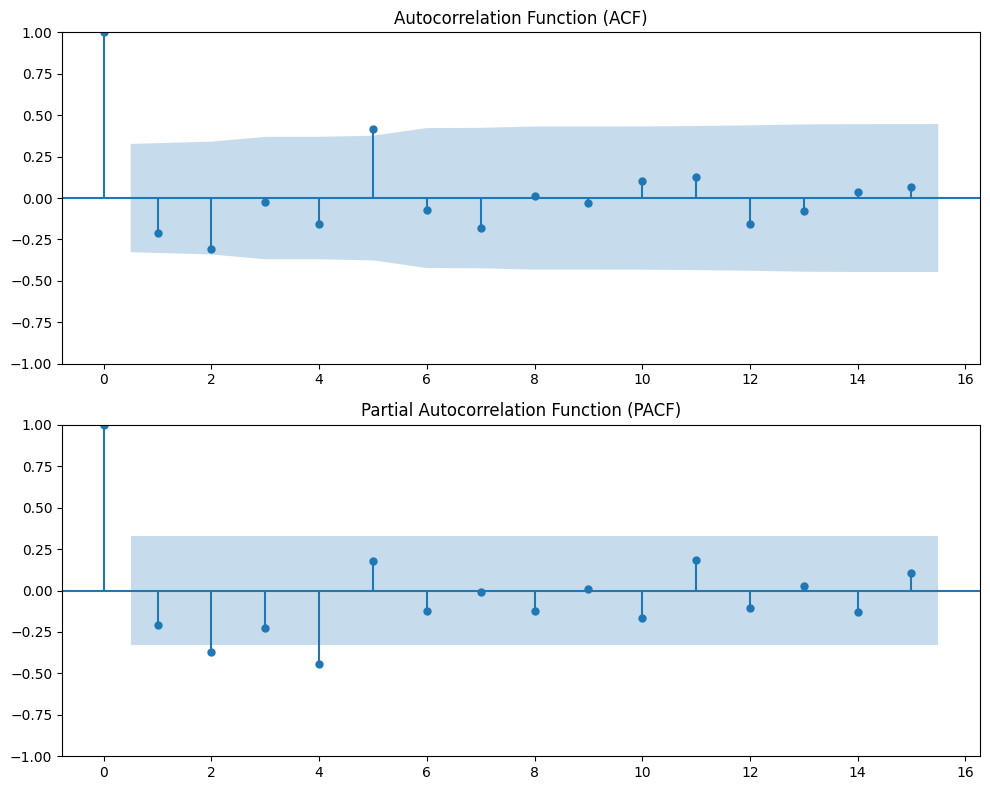

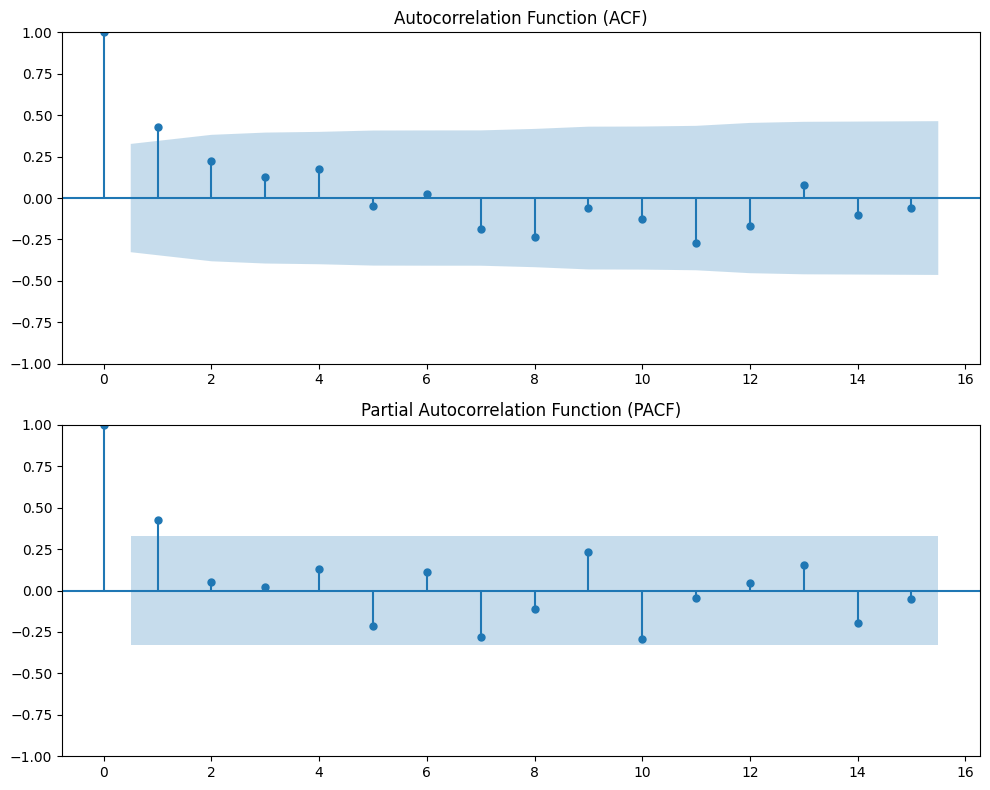

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


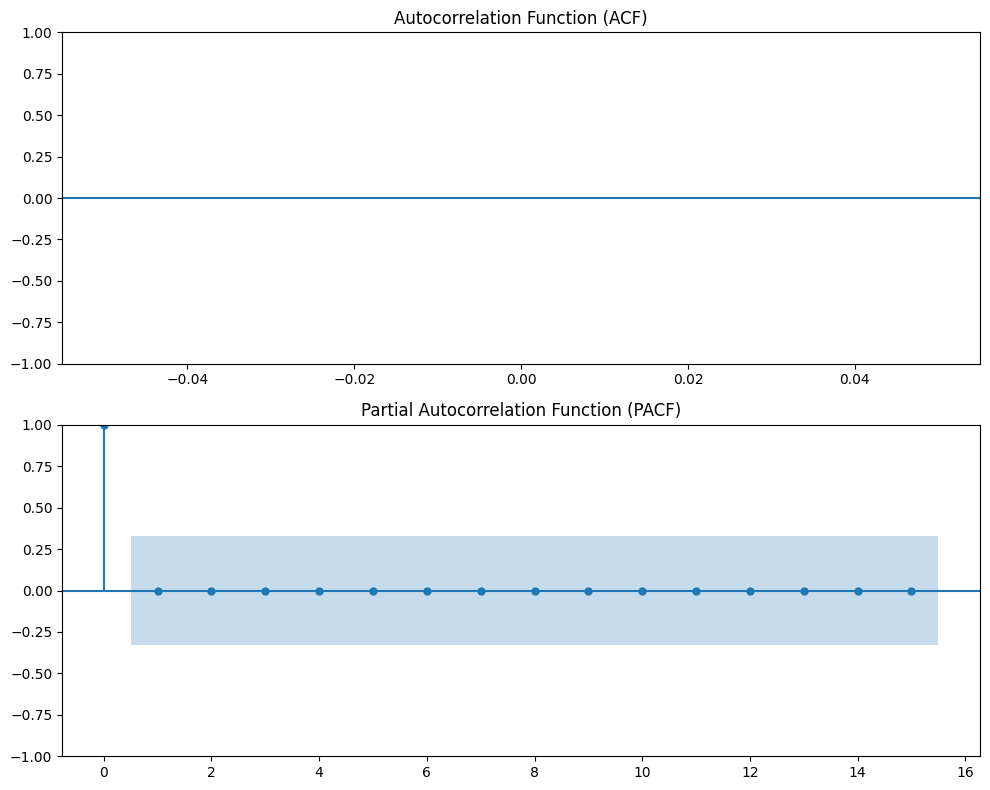

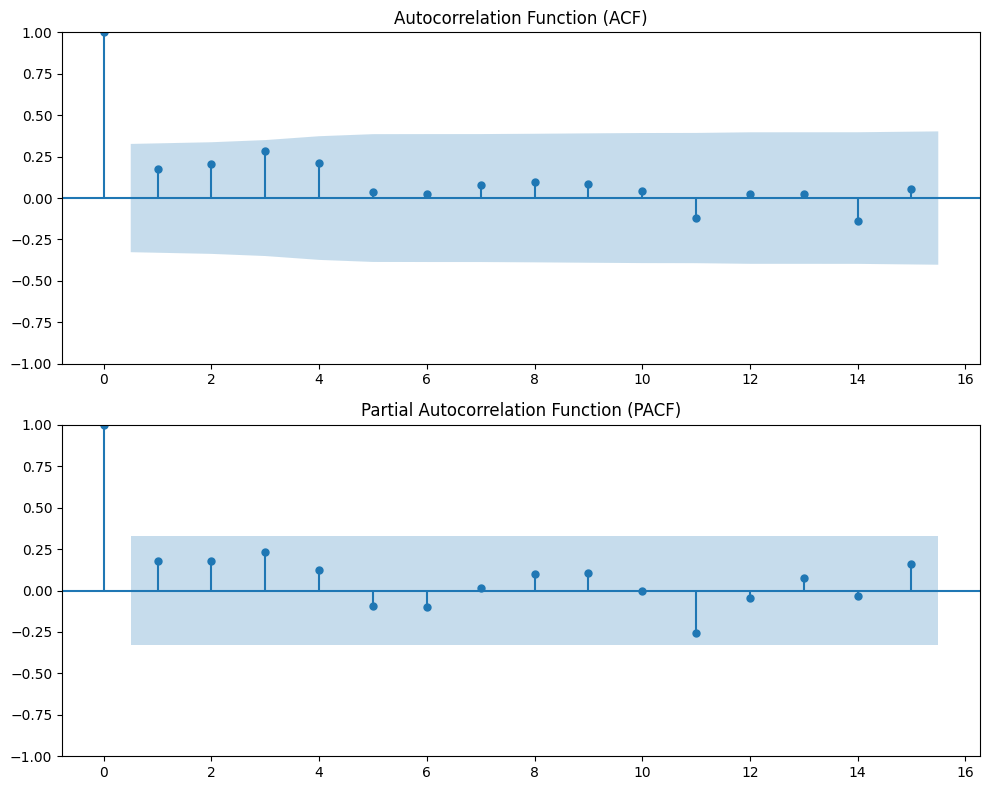

In [36]:
print(df.columns)

# Convierte la columna de fechas a formato de fecha
df['mes'] = pd.to_datetime(df['mes'])

def plot_acf_pacf(data, lags=15):
    # Crea subplots para los gráficos ACF y PACF
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Gráfico ACF
    plot_acf(data, lags=lags, ax=ax[0])
    ax[0].set_title('Autocorrelation Function (ACF)')

    # Gráfico PACF
    plot_pacf(data, lags=lags, ax=ax[1])
    ax[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df.set_index('mes', inplace=True)

# Visualización de gráficos ACF y PACF para cada serie de tiempo
plot_acf_pacf(df['Diesel bajo azufre'])
plot_acf_pacf(df['Diesel ultra bajo azufre'])
plot_acf_pacf(df['Gasolina superior'])
plot_acf_pacf(df['Diesel alto azufre'])
plot_acf_pacf(df['Gasolina regular'])

### Inciso 2: Consumo mensual de gasolina , gasolina regular, diésel y gas licuado en importación.

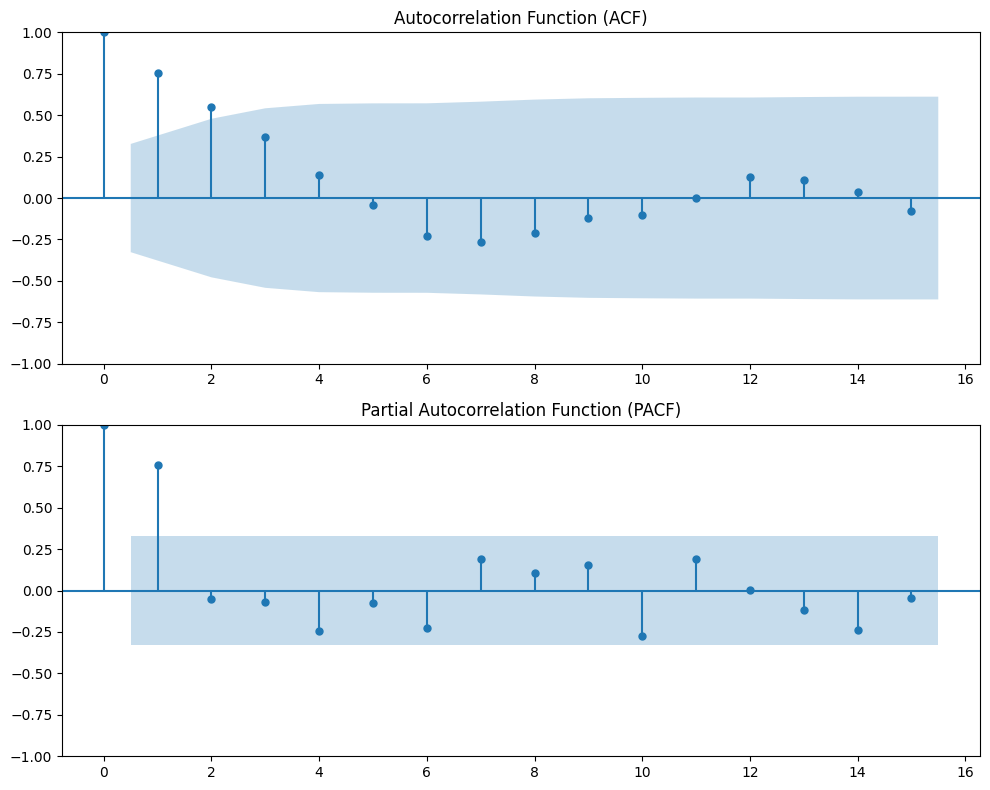

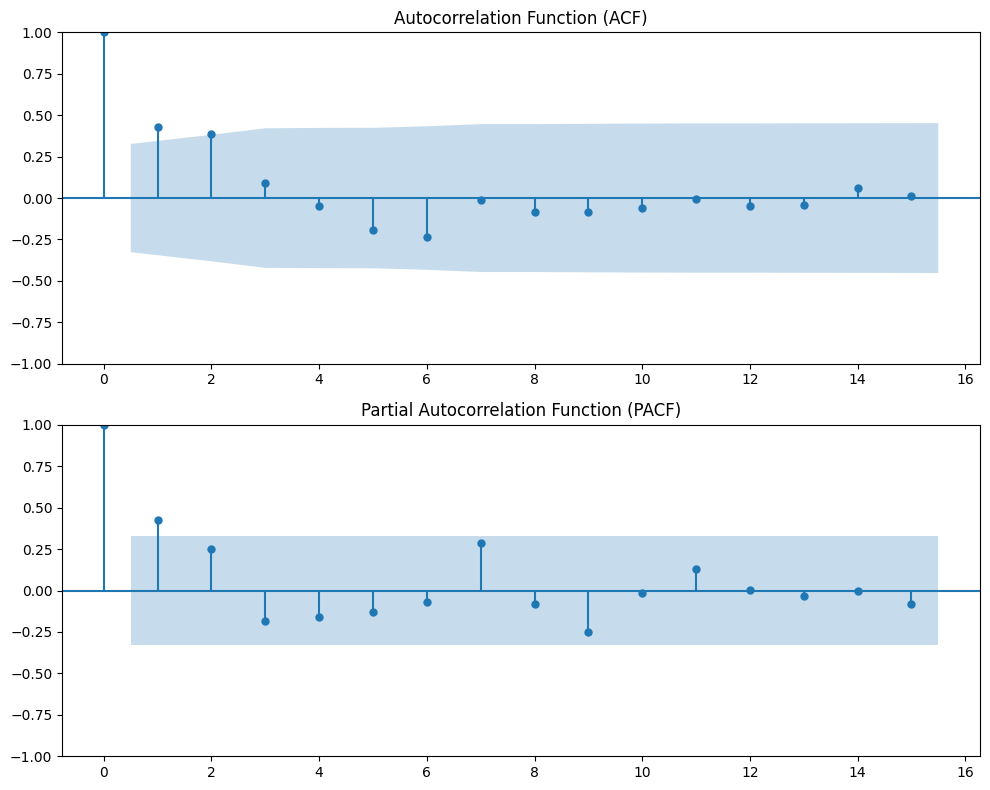

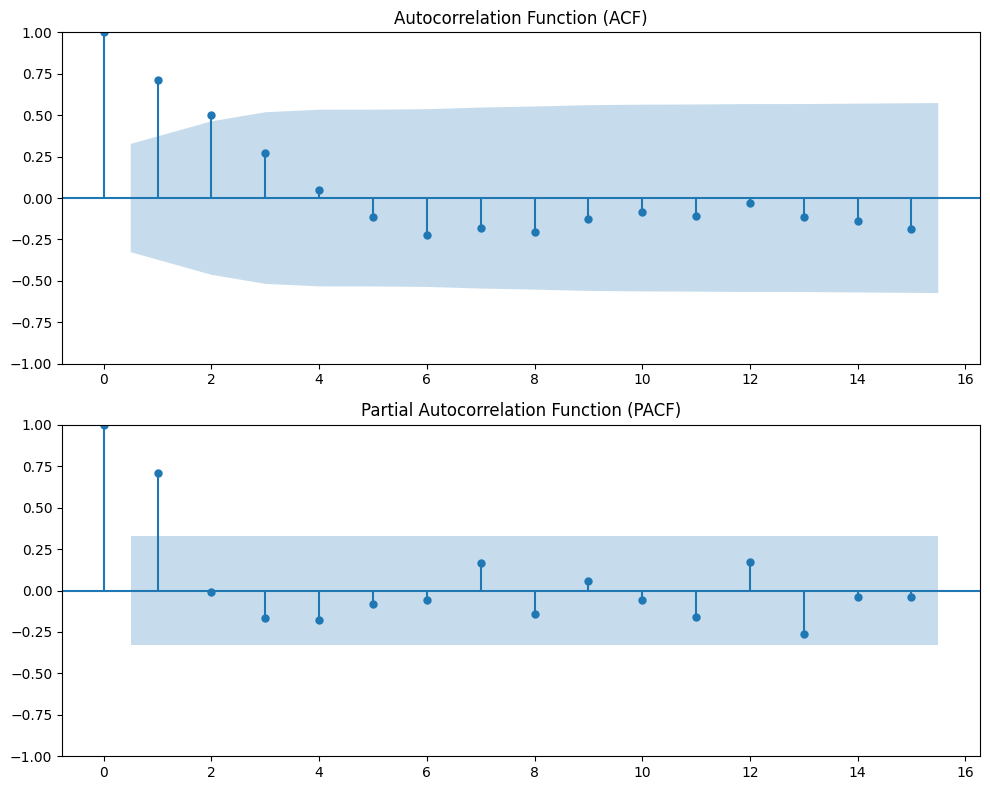

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


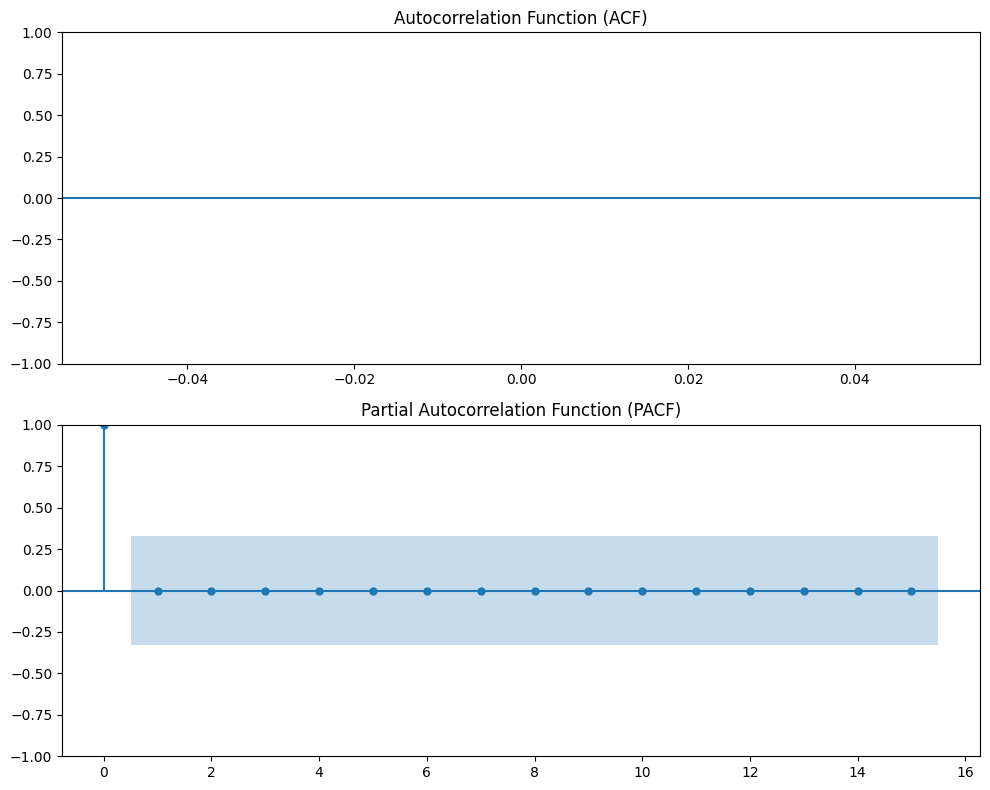

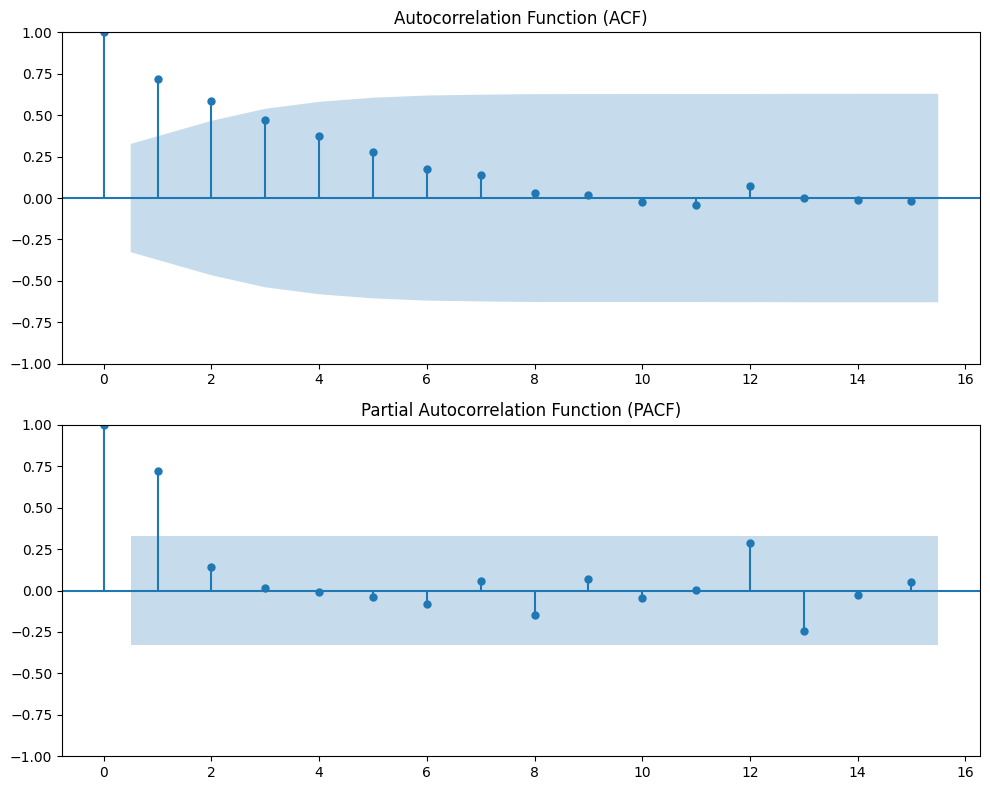

In [37]:
# Convierte la columna de fechas a formato de fecha
df2['mes'] = pd.to_datetime(df2['mes'])

def plot_acf_pacf(data, lags=15):
    # Crea subplots para los gráficos ACF y PACF
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Gráfico ACF
    plot_acf(data, lags=lags, ax=ax[0])
    ax[0].set_title('Autocorrelation Function (ACF)')

    # Gráfico PACF
    plot_pacf(data, lags=lags, ax=ax[1])
    ax[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df2.set_index('mes', inplace=True)

# Visualización de gráficos ACF y PACF para cada serie de tiempo
plot_acf_pacf(df2['Diesel bajo azufre'])
plot_acf_pacf(df2['Diesel ultra bajo azufre'])
plot_acf_pacf(df2['Gasolina superior'])
plot_acf_pacf(df2['Diesel alto azufre'])
plot_acf_pacf(df2['Gasolina regular'])

#### Haciendo una predicción de las importaciones de las gasolinas y el gas.

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sebas\AppData\Local

2022-05-01    9.190066e+05
2022-06-01    1.029920e+06
2022-07-01    9.814205e+05
2022-08-01    1.142971e+06
2022-09-01    1.170942e+06
2022-10-01    1.334259e+06
2022-11-01    1.388060e+06
2022-12-01    1.526404e+06
Freq: MS, Name: predicted_mean, dtype: float64


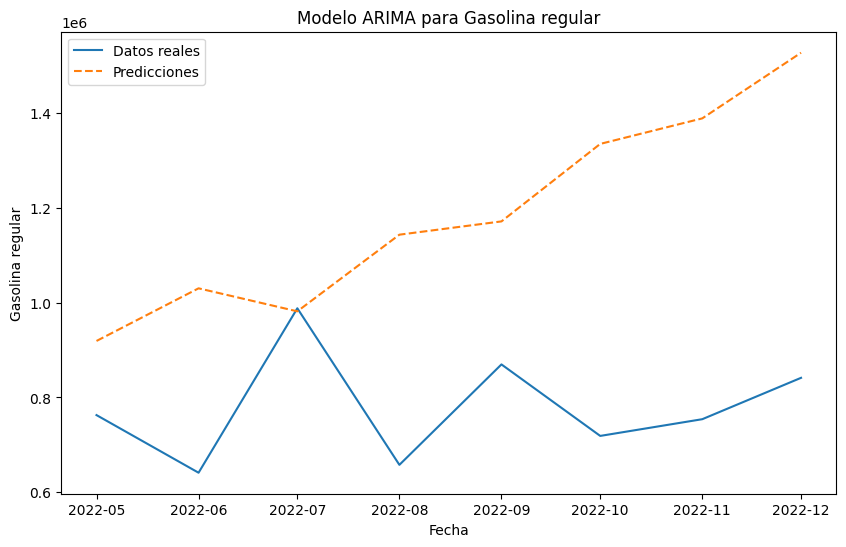

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2022-05-01    348602.634740
2022-06-01    146453.258390
2022-07-01    103380.666132
2022-08-01    -99648.713575
2022-09-01   -272878.684488
2022-10-01   -366610.041278
2022-11-01   -552090.741563
2022-12-01   -751089.050263
Freq: MS, Name: predicted_mean, dtype: float64


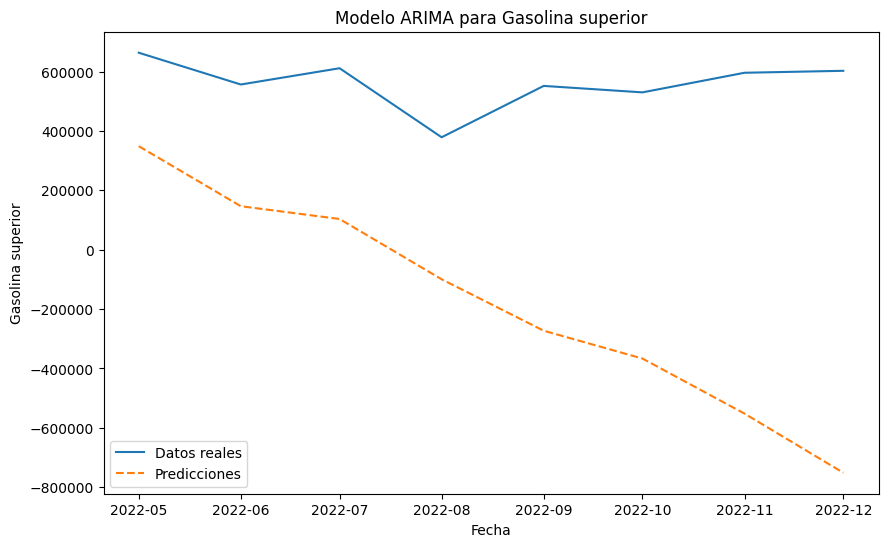

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2022-05-01    348602.634740
2022-06-01    146453.258390
2022-07-01    103380.666132
2022-08-01    -99648.713575
2022-09-01   -272878.684488
2022-10-01   -366610.041278
2022-11-01   -552090.741563
2022-12-01   -751089.050263
Freq: MS, Name: predicted_mean, dtype: float64


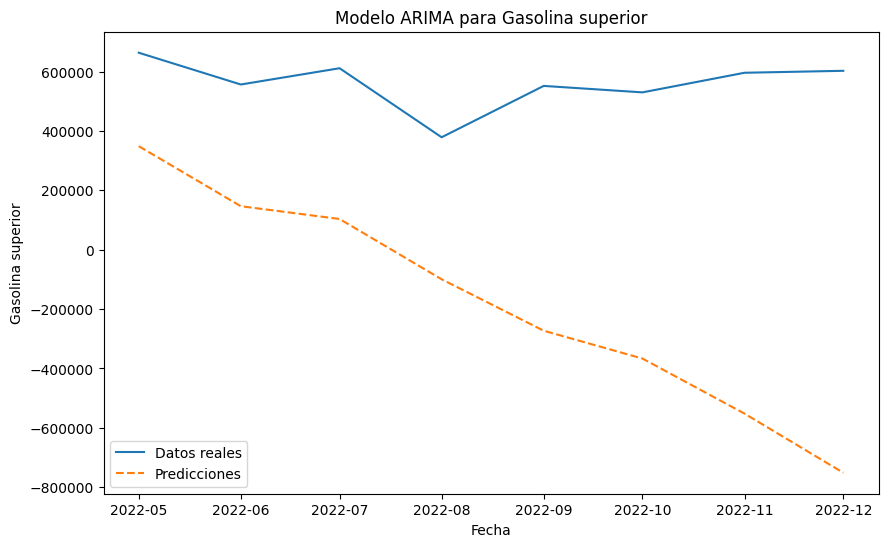

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-05-01    1.356351e+06
2022-06-01    1.293180e+06
2022-07-01    1.400721e+06
2022-08-01    1.337577e+06
2022-09-01    1.447684e+06
2022-10-01    1.416116e+06
2022-11-01    1.515995e+06
2022-12-01    1.521907e+06
Freq: MS, Name: predicted_mean, dtype: float64


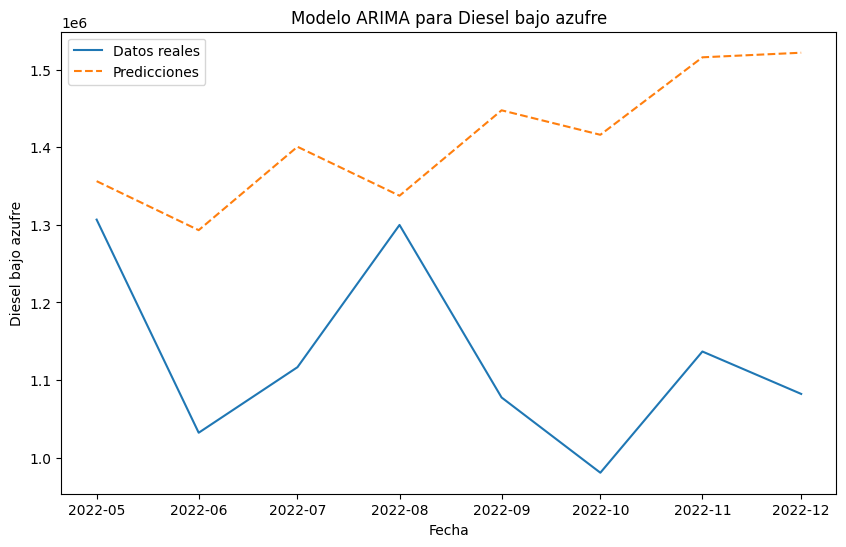

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2022-05-01    12982.839886
2022-06-01     9257.357635
2022-07-01     9358.635006
2022-08-01    12241.104913
2022-09-01     9404.778962
2022-10-01    12005.136514
2022-11-01    11262.419454
2022-12-01    11435.470611
Freq: MS, Name: predicted_mean, dtype: float64


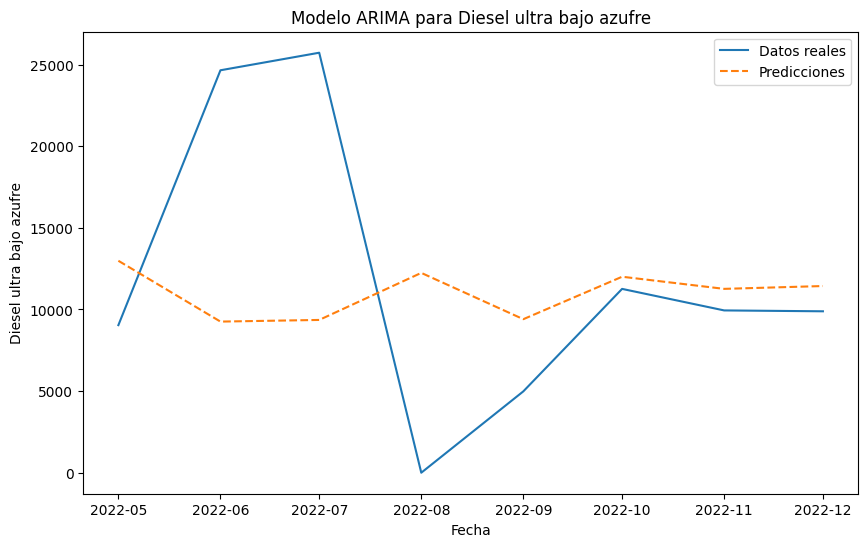

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2022-05-01    0.0
2022-06-01    0.0
2022-07-01    0.0
2022-08-01    0.0
2022-09-01    0.0
2022-10-01    0.0
2022-11-01    0.0
2022-12-01    0.0
Freq: MS, Name: predicted_mean, dtype: float64


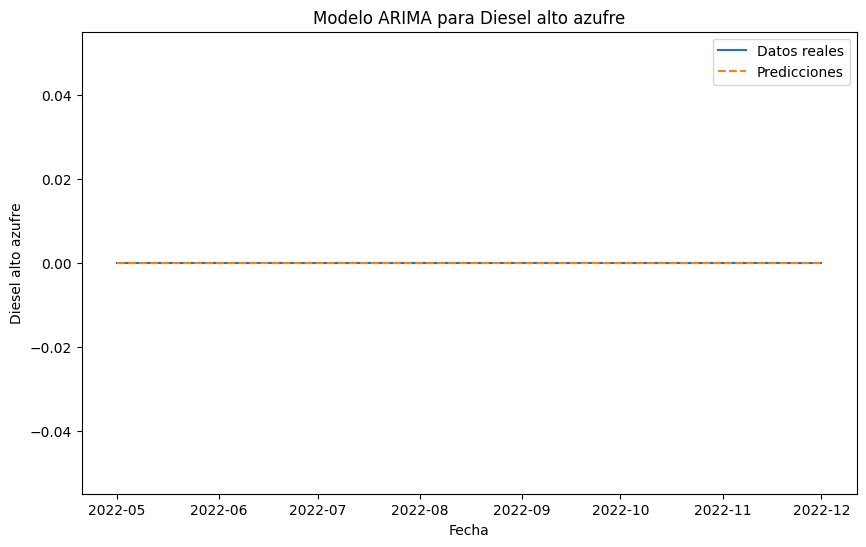

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sebas\AppData\Local

2022-05-01    8.201015e+05
2022-06-01    7.632159e+05
2022-07-01    9.289539e+05
2022-08-01    8.760911e+05
2022-09-01    1.048164e+06
2022-10-01    1.024717e+06
2022-11-01    1.185136e+06
2022-12-01    1.202464e+06
Freq: MS, Name: predicted_mean, dtype: float64


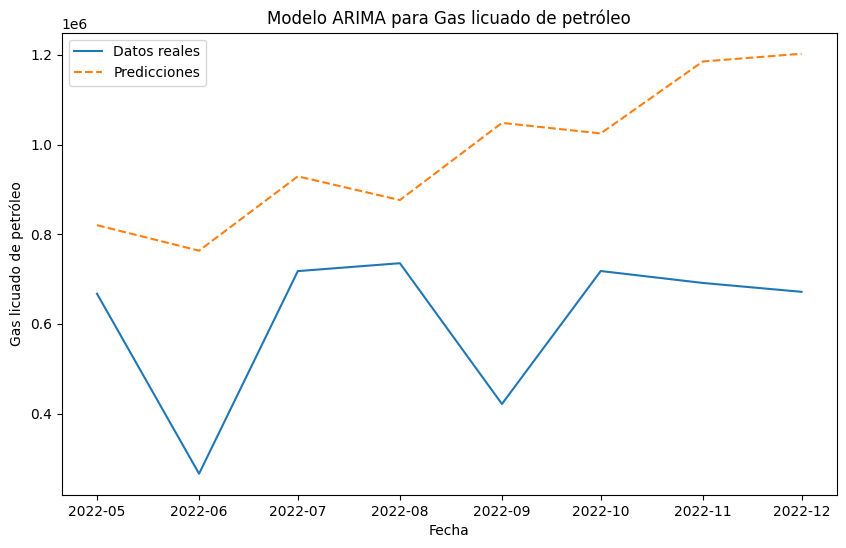

In [38]:
# Convierte la columna de fechas a formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df.set_index('Fecha', inplace=True)

# Usando la gasolina regular.
variable_interes = 'Gasolina regular'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA
order = (4, 4, 4)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)


# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando la gasolina superior.
variable_interes = 'Gasolina superior'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando la gasolina superior.
variable_interes = 'Gasolina superior'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando la Diesel bajo azufre.
variable_interes = 'Diesel bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando la Diesel Diesel ultra bajo azufre.
variable_interes = 'Diesel ultra bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (2, 2, 2)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando el Diesel alto azufre.
variable_interes = 'Diesel alto azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (2, 2, 2)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando el Gas licuado de petróleo.
variable_interes = 'Gas licuado de petróleo'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

#### Haciendo las predicciones de consumo de las mismas variables.

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-05-01    804042.436472
2022-06-01    774739.672184
2022-07-01    767814.097079
2022-08-01    764868.232755
2022-09-01    773624.631664
2022-10-01    784387.186759
2022-11-01    800851.903484
2022-12-01    803489.747898
Freq: MS, Name: predicted_mean, dtype: float64


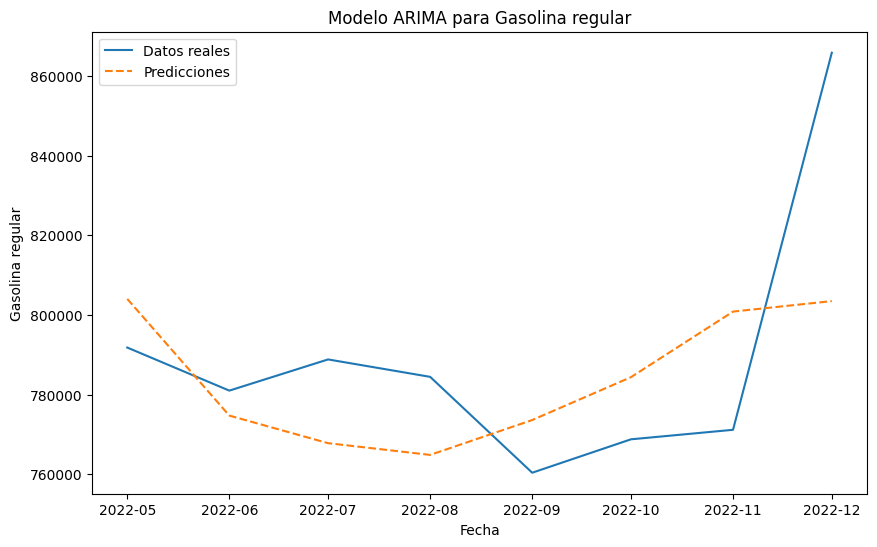

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2022-05-01    552913.953637
2022-06-01    541641.272052
2022-07-01    537252.456774
2022-08-01    538514.127518
2022-09-01    544571.753009
2022-10-01    554181.282951
2022-11-01    566070.005118
2022-12-01    578982.029217
Freq: MS, Name: predicted_mean, dtype: float64


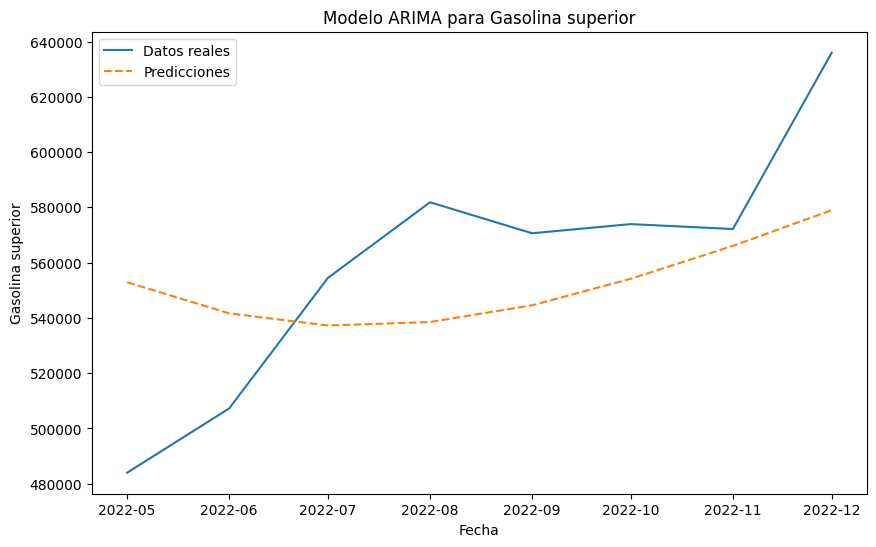

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\se

2022-05-01    1.181289e+06
2022-06-01    1.127451e+06
2022-07-01    1.157154e+06
2022-08-01    1.102668e+06
2022-09-01    1.114704e+06
2022-10-01    9.773602e+05
2022-11-01    1.039139e+06
2022-12-01    1.160287e+06
Freq: MS, Name: predicted_mean, dtype: float64


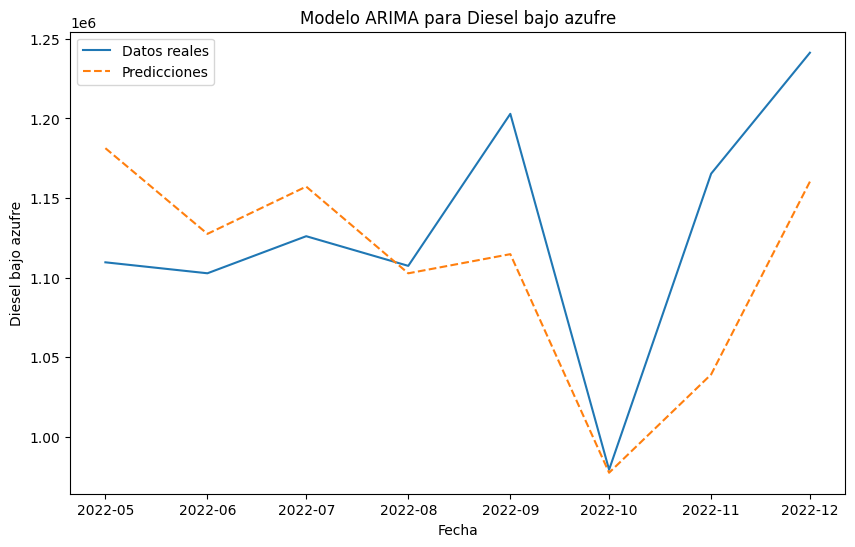

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-05-01    9644.082095
2022-06-01    9644.082095
2022-07-01    9644.082095
2022-08-01    9644.082095
2022-09-01    9644.082095
2022-10-01    9644.082095
2022-11-01    9644.082095
2022-12-01    9644.082095
Freq: MS, Name: predicted_mean, dtype: float64


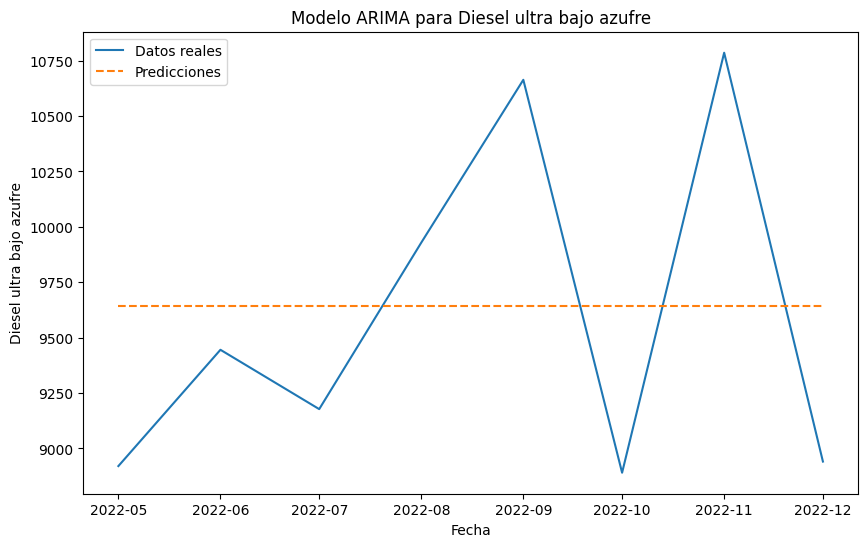

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-05-01    0.0
2022-06-01    0.0
2022-07-01    0.0
2022-08-01    0.0
2022-09-01    0.0
2022-10-01    0.0
2022-11-01    0.0
2022-12-01    0.0
Freq: MS, Name: predicted_mean, dtype: float64


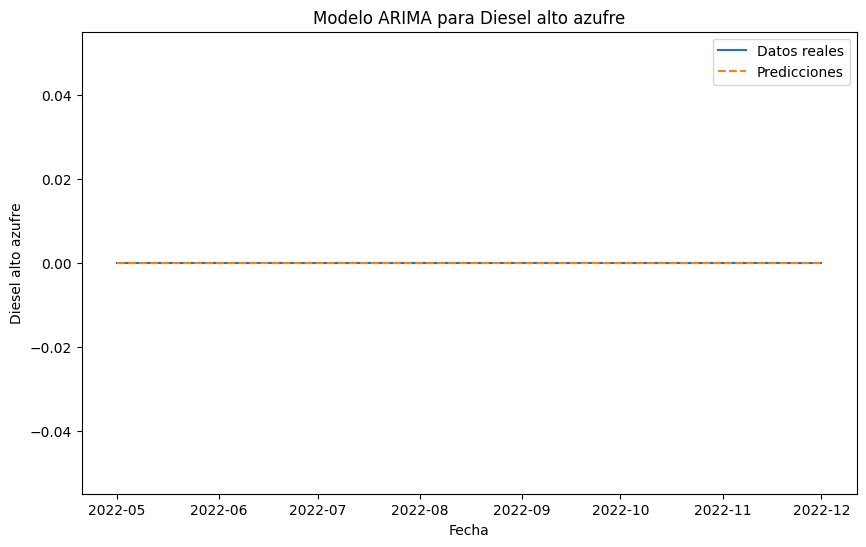

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2022-05-01    506639.641250
2022-06-01    513875.185778
2022-07-01    525403.965323
2022-08-01    526631.014423
2022-09-01    532535.575208
2022-10-01    534354.018394
2022-11-01    538926.275789
2022-12-01    543498.533183
Freq: MS, Name: predicted_mean, dtype: float64


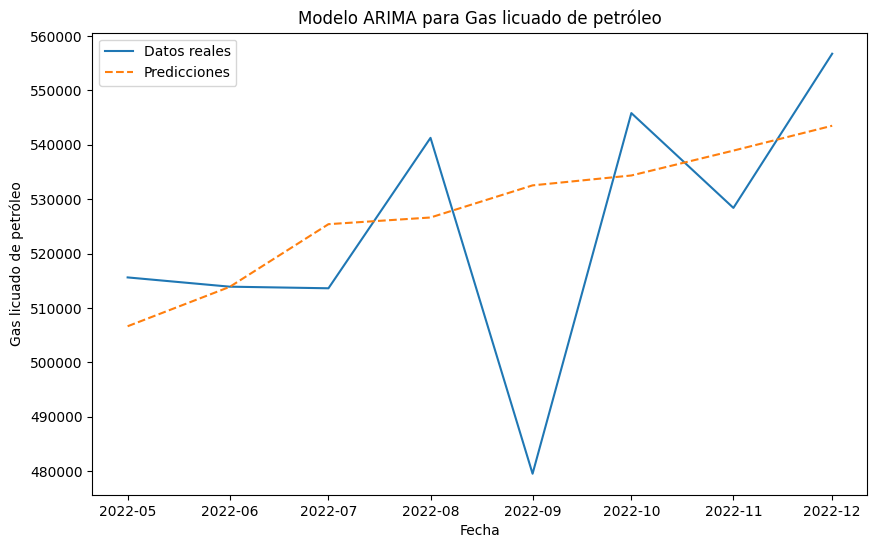

In [39]:
# warnings.filterwarnings("ignore", message="No frequency information was provided")

# # Desactivar los mensajes de información y advertencia de statsmodels
# warnings.filterwarnings("ignore", message=".*Starting MA parameters.*", category=UserWarning)
# warnings.filterwarnings("ignore", message=".*Non-stationary starting autoregressive parameters.*", category=UserWarning)
# warnings.filterwarnings("ignore", message=".*Maximum Likelihood optimization failed.*", category=ConvergenceWarning)
# warnings.filterwarnings("ignore", message=".*Maximum Likelihood optimization failed to converge. Check mle_retvals.*", category=ConvergenceWarning)

# # Convierte la columna de fechas a formato de fecha
# df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# # Convierte la columna de fechas a índice para trabajar con series de tiempo
# df2.set_index('Fecha', inplace=True)

# def find_best_arima_order(variable_interes, p_values, d_values, q_values):
#     best_mse = float('inf')
#     best_order = None

#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p, d, q)
#                 train_size = int(len(df2) * 0.8)
#                 train_data = df2[variable_interes][:train_size]
#                 test_data = df2[variable_interes][train_size:]
#                 try:
#                     model = ARIMA(train_data, order=order)
#                     model_fit = model.fit()
#                     predictions = model_fit.forecast(steps=len(test_data))
#                     mse = mean_squared_error(test_data, predictions)
#                     if mse < best_mse:
#                         best_mse = mse
#                         best_order = order
#                 except:
#                     continue

#     return best_order, best_mse

# # Valores posibles para p, d, q
# p_values = range(10)
# d_values = range(10)
# q_values = range(10)

# # Usando la gasolina regular.
# variable_interes = 'Gasolina regular'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))

# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# # Usando la gasolina super.
# variable_interes = 'Gasolina superior'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))
# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# # Usando el Diesel bajo azufre.
# variable_interes = 'Diesel bajo azufre'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))
# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# # Usando el Diesel ultra bajo de azufre.
# variable_interes = 'Diesel ultra bajo azufre'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))
# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# # Usando el diesel alto azufre.
# variable_interes = 'Diesel alto azufre'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))
# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# # Usando el Gas Licuado de petróleo.
# variable_interes = 'Gas licuado de petróleo'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))
# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# Convierte la columna de fechas a formato de fecha
df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df2.set_index('Fecha', inplace=True)

# Usando la gasolina regular.
variable_interes = 'Gasolina regular'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA
order = (7,1,1)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)


# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando la gasolina superior.
variable_interes = 'Gasolina superior'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 0, 1)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando la Diesel bajo azufre.
variable_interes = 'Diesel bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (8, 2, 5)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando la Diesel Diesel ultra bajo azufre.
variable_interes = 'Diesel ultra bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (0, 1, 1)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando el Diesel alto azufre.
variable_interes = 'Diesel alto azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (0, 1, 0)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando el Gas licuado de petróleo.
variable_interes = 'Gas licuado de petróleo'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (0, 2, 7)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

### Inciso 3: Usando las series seleccionadas.

#### a. Especifique Inicio, fin, y frecuencia.

In [40]:

"""
Gasolina regular 
Gasolina superior 
Diesel bajo azufre 
Diesel ultra bajo azufre 
Diesel alto azufre 
Gas licuado 
"""
# Obtener el inicio de la serie
inicio = df2.index.min()

print('Inicio de la serie:', inicio)

# Obtener el fin de la serie
fin = df2.index.max()
print('Fin de la serie:', fin)

# Calcular las diferencias entre las fechas
diferencias = df2.index.to_series().diff().dt.days

# Encontrar el valor más común
frecuencia = diferencias.value_counts().idxmax()

print("Frecuencia: ", frecuencia)

Inicio de la serie: 2020-01-01 00:00:00
Fin de la serie: 2022-12-01 00:00:00
Frecuencia:  31.0


#### b. Haga  un  gráfico  de  la  serie  y  explique  qué  información  puede  obtener  a  primera vista.

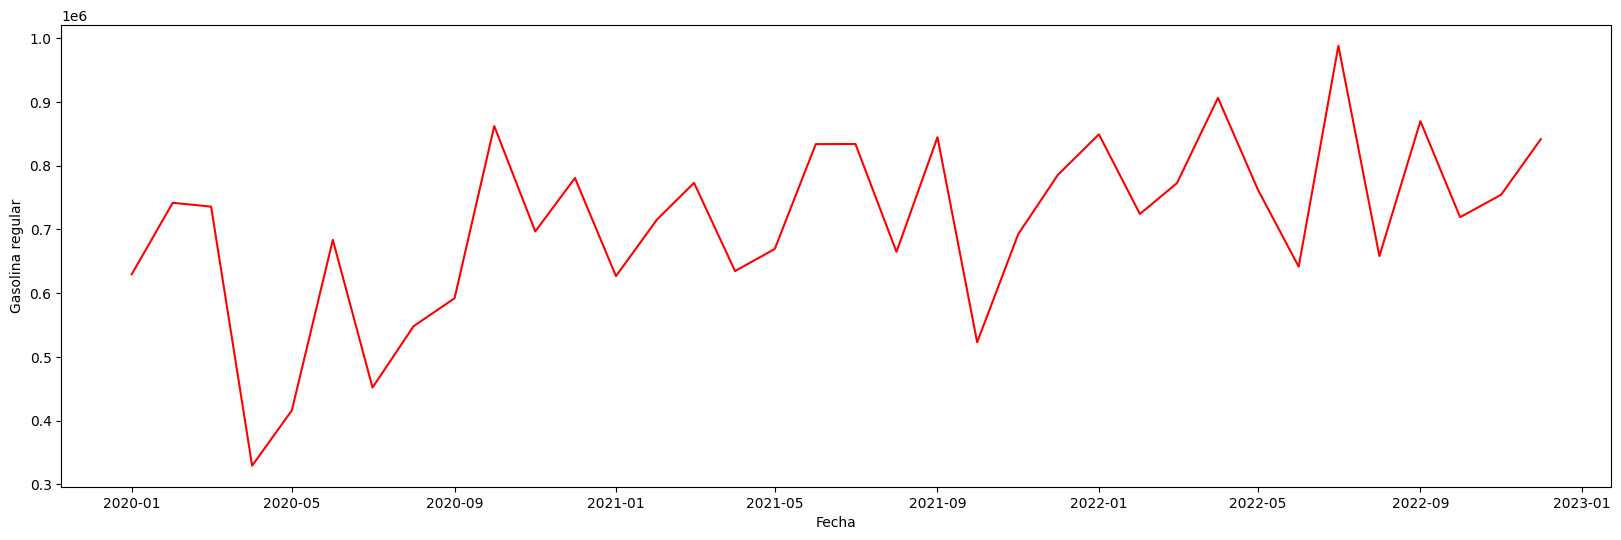

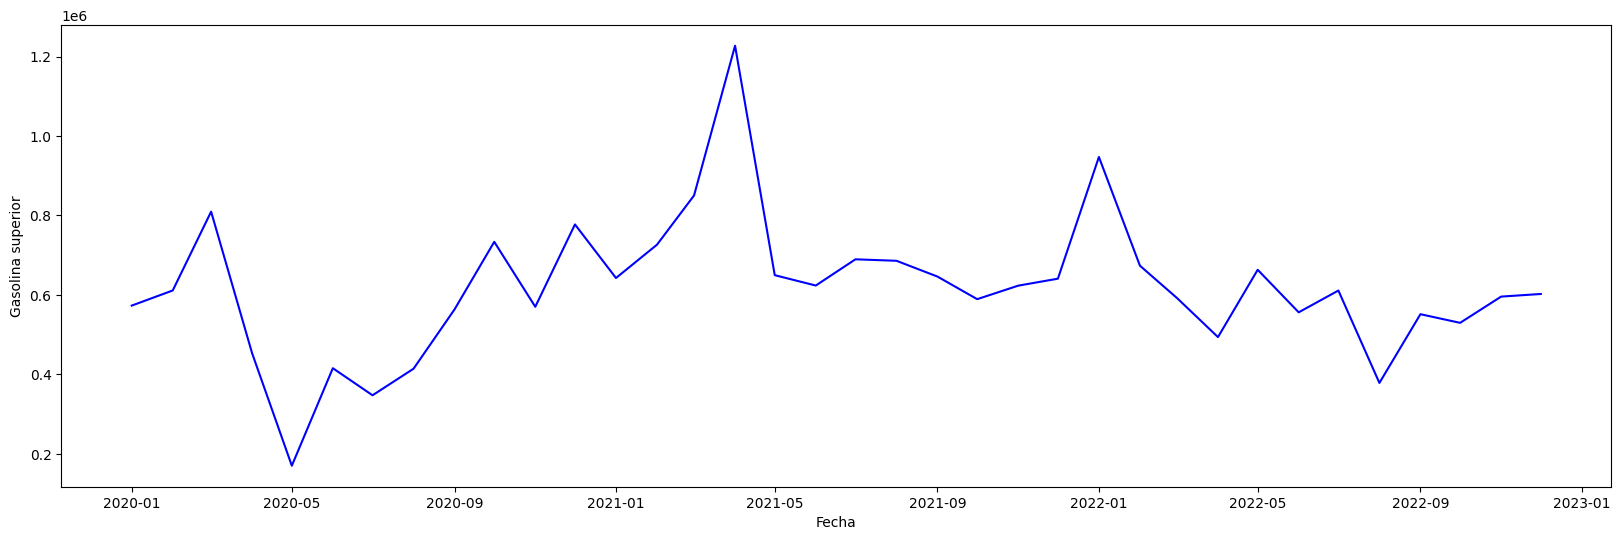

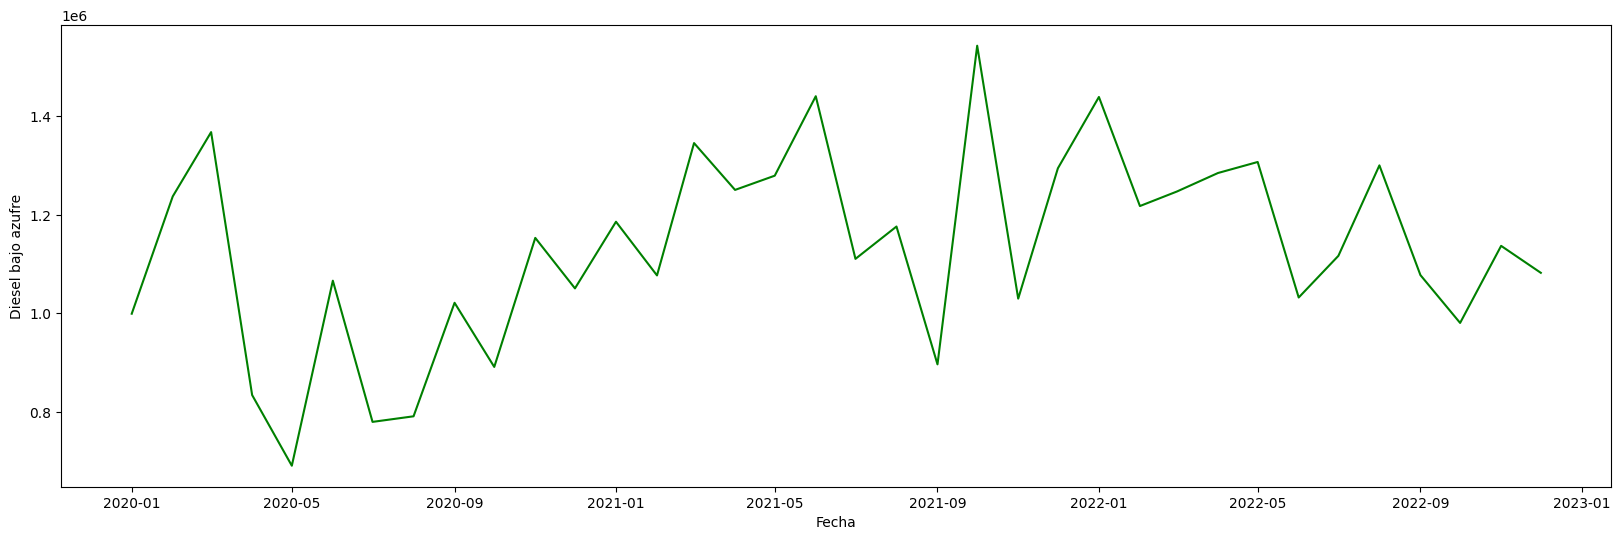

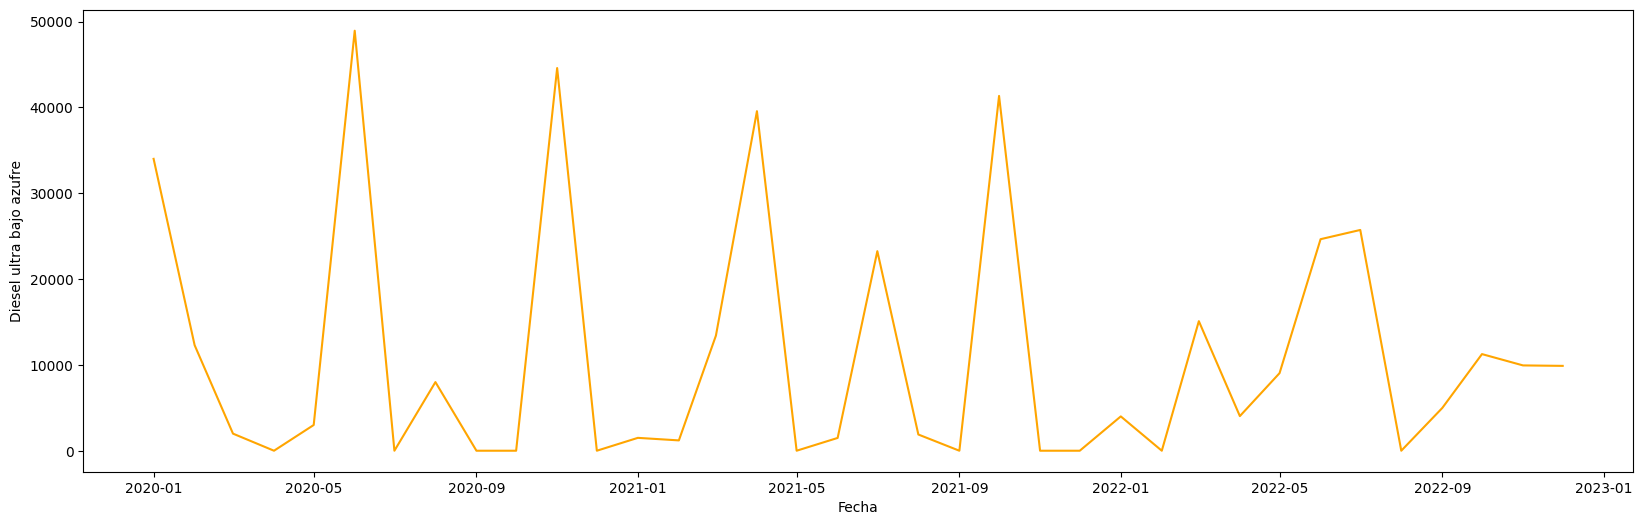

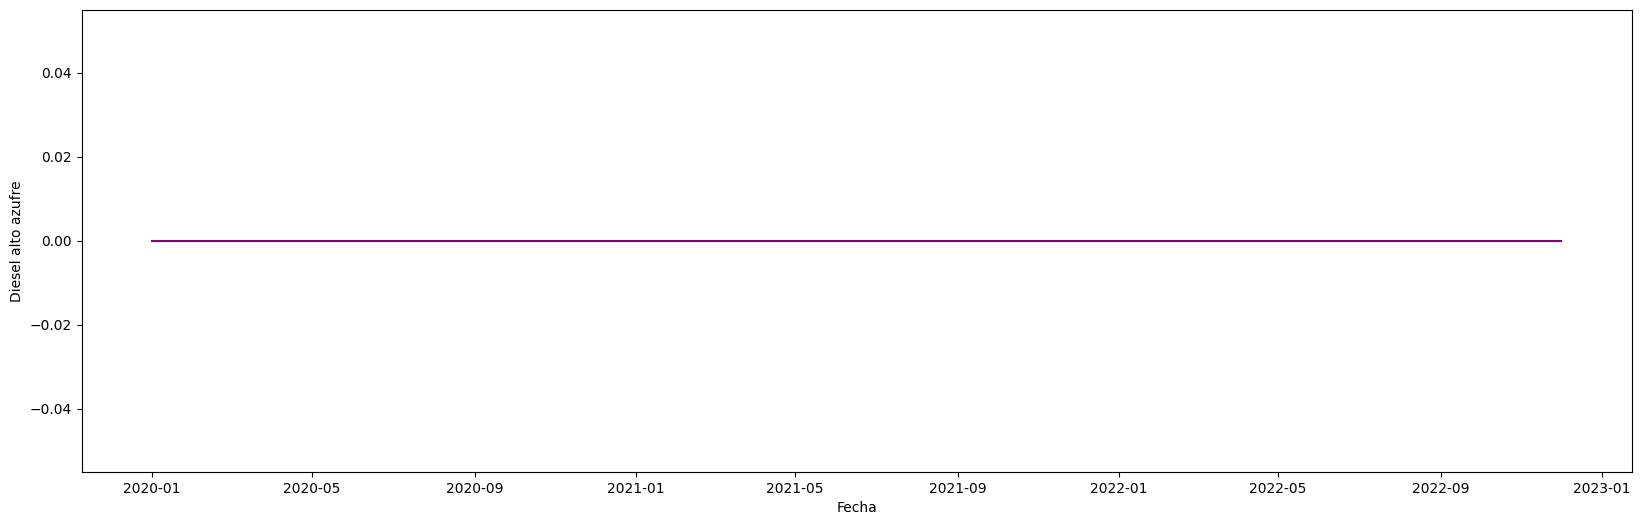

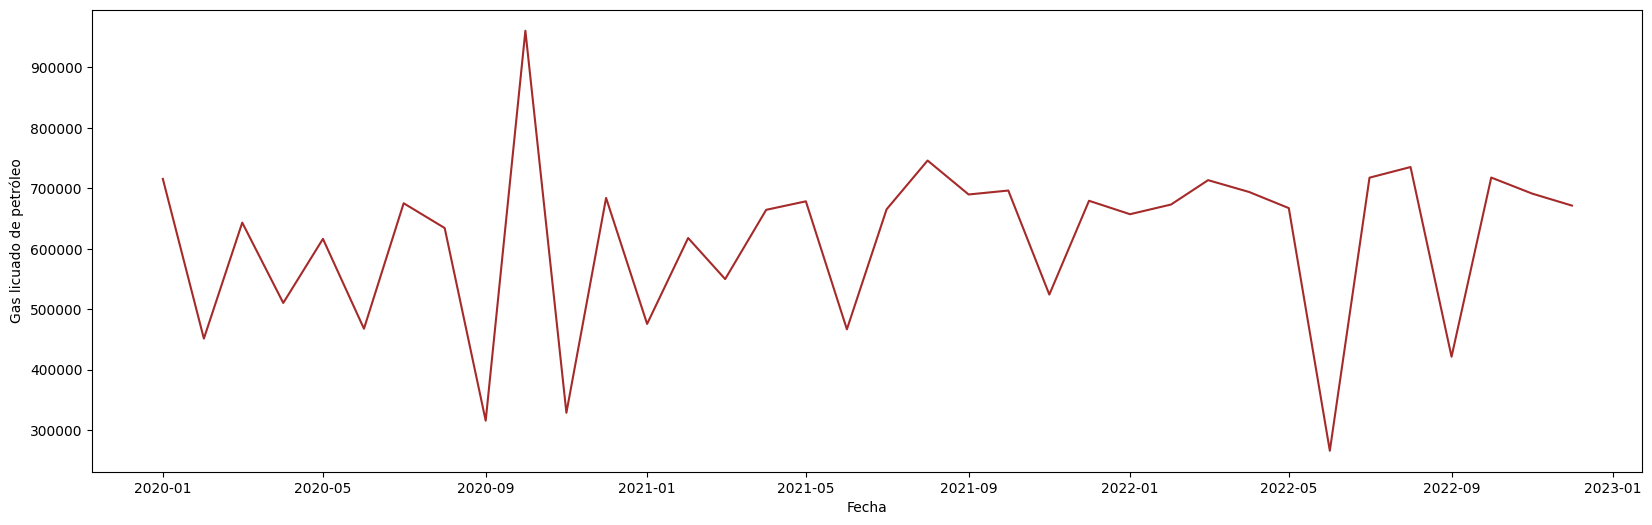

In [41]:
"""
Gasolina regular
Gasolina superior
Diesel bajo azufre
Diesel ultra bajo azufre
Diesel alto azufre
Gas licuado
"""

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para la gasolina regular.
plt.plot(df.index, df["Gasolina regular"], color='red')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Gasolina regular')

plt.show()

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para la Gasolina superior.
plt.plot(df.index, df["Gasolina superior"], color='blue')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Gasolina superior')

plt.show()

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para el Diesel bajo azufre.
plt.plot(df.index, df["Diesel bajo azufre"], color='green')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Diesel bajo azufre')

plt.show()

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para el Diesel ultra bajo azufre.
plt.plot(df.index, df["Diesel ultra bajo azufre"], color='orange')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Diesel ultra bajo azufre')

plt.show()

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para el Diesel alto azufre.
plt.plot(df.index, df["Diesel alto azufre"], color='purple')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Diesel alto azufre')

plt.show()

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para el Gas licuado de petróleo.
plt.plot(df.index, df["Gas licuado de petróleo"], color='brown')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Gas licuado de petróleo')

plt.show()

##### Se puede notar, que al observar el consumo de las diferentes gasolinas entre los años 2020 y 2023 tienen diferentes comportamientos. Con lo anterior mencionado se puede decir que han habido meses en los que el consumo de las gasolinas es muy alto o muy bajo. También se puede notar que hay gasolinas más consumidas que otras. Finalmente, cabe destacar que el diesel alto en azufre no se consume en lo absoluto en Guatemala.

#### c. Descomponga la serie. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionariedad en media y en varianza.

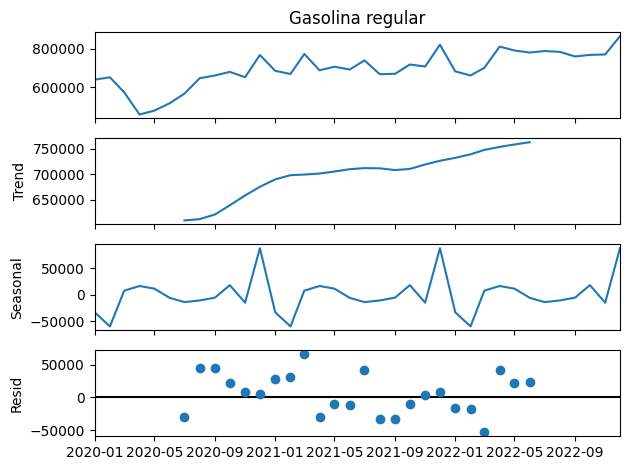

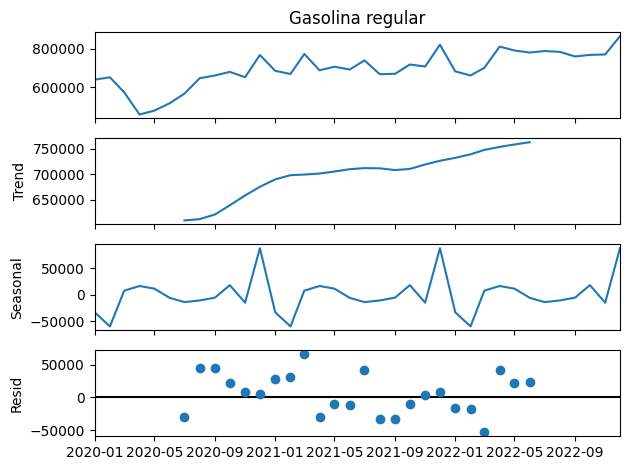

In [42]:
"""
Gasolina regular
Gasolina superior
Diesel bajo azufre
Diesel ultra bajo azufre
Diesel alto azufre
Gas licuado
"""

# Descomponer la serie de tiempo de la Gasolina regular.
decomposition = sm.tsa.seasonal_decompose(df2["Gasolina regular"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot()

##### De este modelo de tiempo se puede decir que existe una tendencia por más consumo de gasolina regular. Con esto se podría decir que existe una gran posiblidad de que haya un aumento de motos dentro de la ciudad capital. Por otro lado, se puede notar que existen meses en los cuales la media de consumo disminuye bastante, mientras que en otros meses regresa a su pico más alto de consumo. Finalmente, es importante mencionar que no existe tanto sesgo dentro de esta serie de tiempo, por lo que se podría decir que es bastante exacta para realizar predicciones en base a los patrones que ya tiene.

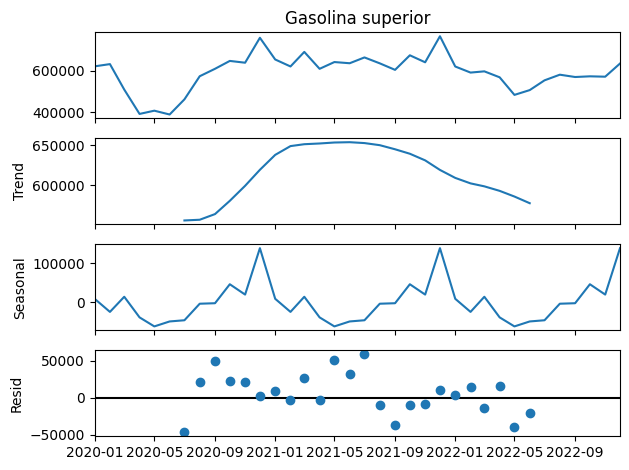

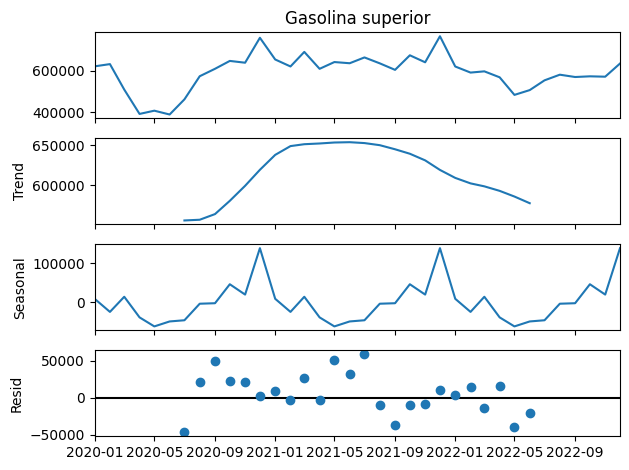

In [43]:
# Descomponer la serie de tiempo de la Gasolina superior.
decomposition = sm.tsa.seasonal_decompose(df2["Gasolina superior"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot()

##### En principio, se puede notar que para esta serie de tiempo, la tendencia fue bastante buena, pero se pudo notar que luego bajó considerablemente. Lo anterior se puede deber a que hubo algunos meses de "depresión" de consumo, por el aumento del costo de la gasolina superior. Asimismo, se puede notar que hubo meses en donde la media de consumo fue bastante alta, mientras que en otros meses la media de consumo fue bastante deficiente y baja. Finalmente, cabe destacar que en esta serie de tiempo existe bastante sesgo entre algunos datos del set de datos. 

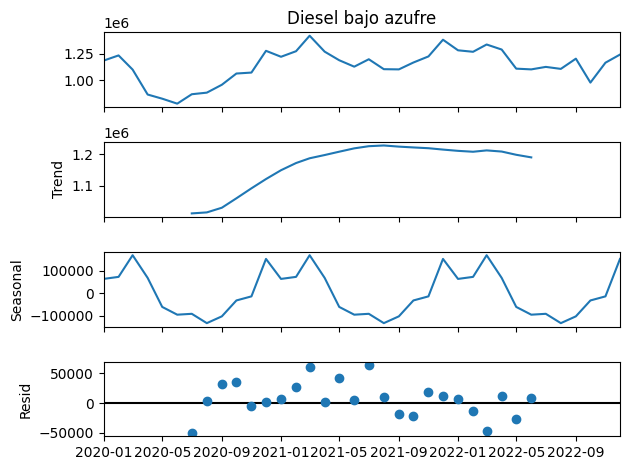

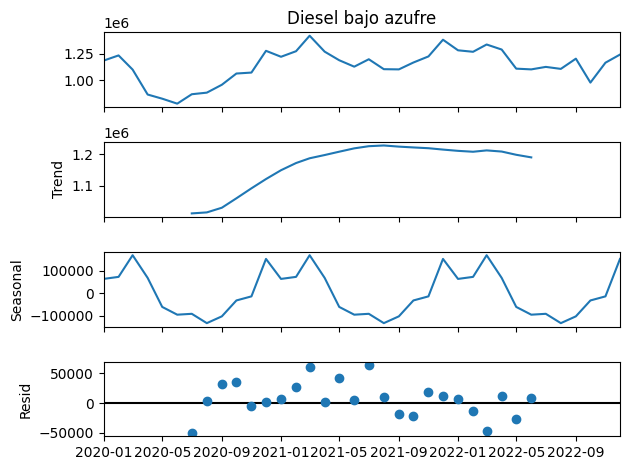

In [44]:
# Descomponer la serie de tiempo del Diesel bajo azufre.
decomposition = sm.tsa.seasonal_decompose(df2["Diesel bajo azufre"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot()

##### En esta serie de tiempo se puede notar que el diesel bajo azufre tuvo bastante aceptación por parte de los consumidoeres. Se puede notar que tuvo un pequeño bajón de consumo, sin embargo, aún se mantuvo con bastante aceptación en el mercado. Por otro lado, se puede notar que en algunos meses, el consumo de este producto bajó, pero aún así lograba recuperarse de esas pequeñas "depresiones". Por último, es importante mencionar que los datos no variaron tanto de una época a otra, a pesar de que hubo bajones de consumo en distintos meses.

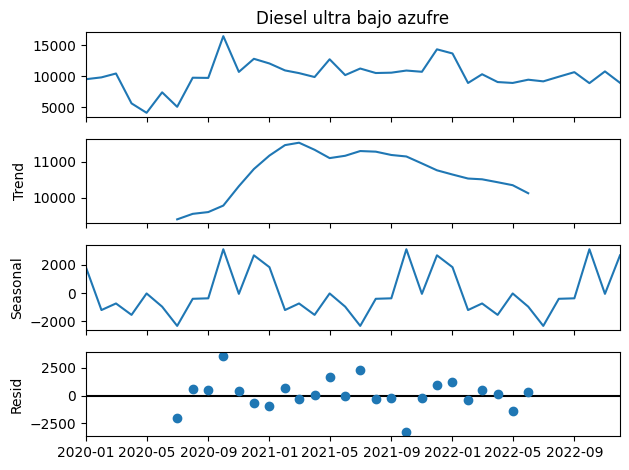

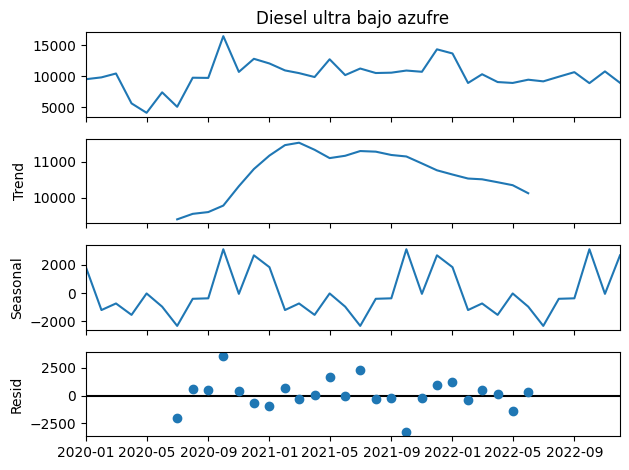

In [45]:
# Descomponer la serie de tiempo del Diesel bajo azufre.
decomposition = sm.tsa.seasonal_decompose(df2["Diesel ultra bajo azufre"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot()

##### En este tipo de combustible se puede notar que el pico de aceptación o tendencia de este tipo de gasolina fue alto en algún momento, pero se puede notar que rápidamente bajó. Lo anterior podría significar que este producto no fue tan aceptado por muchas personas en el mercado. También se puede notar que este producto tuvo varios meses en los que fue bastante consumido, a pesear de su poca aceptación en el mercado. Por otro lado, es importante mencionar que los consumos de un mes a otro no variaron tanto, lo que quiere decir que su consumo se mantuvo constante.

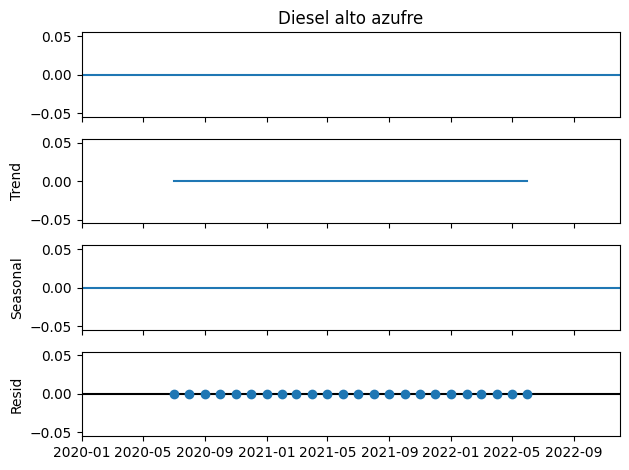

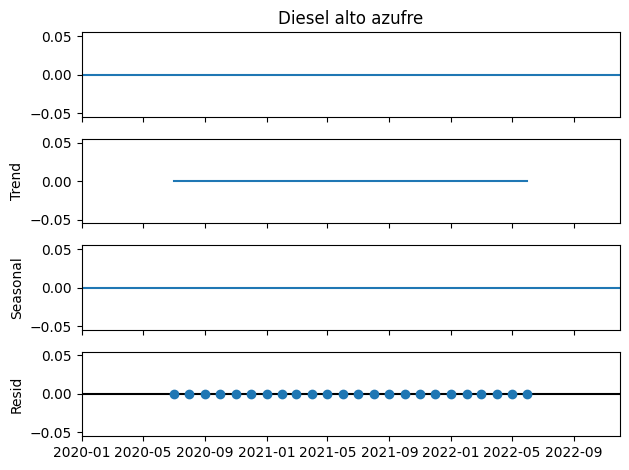

In [46]:
# Descomponer la serie de tiempo del Diesel alto azufre.
decomposition = sm.tsa.seasonal_decompose(df2["Diesel alto azufre"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot()

#### Se puede notar que para este producto, o sea el Diesel alto azufre, no fue aceptado ni consumido por el mercado Guatemalteco de gasolinas.

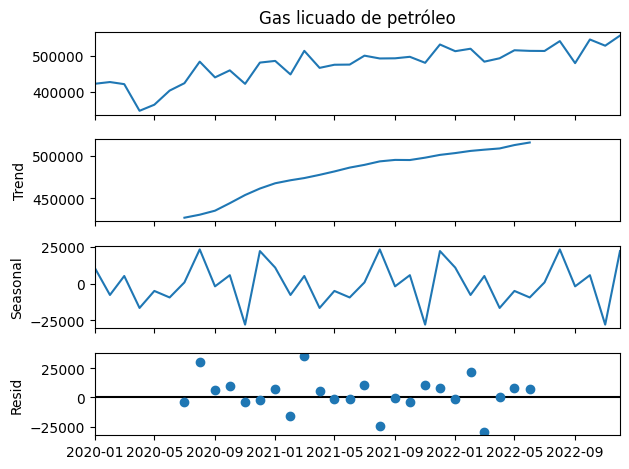

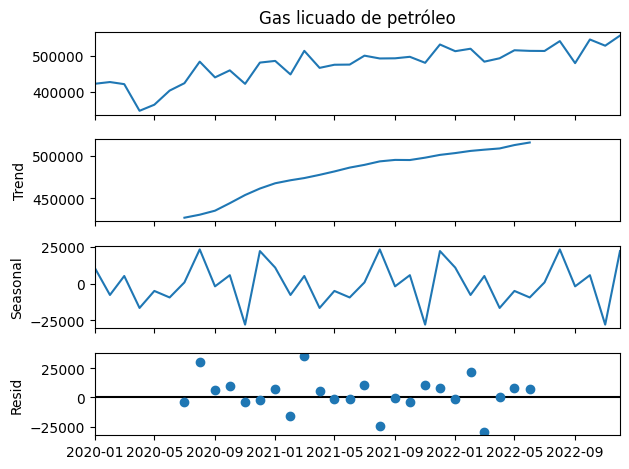

In [47]:
# Gas licuado de petróleo

# Descomponer la serie de tiempo del Gas licuado de petróleo.
decomposition = sm.tsa.seasonal_decompose(df2["Gas licuado de petróleo"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot() 

##### Se puede notar que este producto, gas licuado de petróleo, fue bastante bien aceptado dentro del mercado de gas en Guatemala. También es importante mencionar que hubo pocos meses en donde su consumo bajó drásticamente, lo cual es bueno. También es importante mencionar que la varianza nos da un indicio positivo de que el consumo de este producto fue bastante bueno y aceptado.

### d. Determine si es necesario transformar la serie. Explique.

In [48]:
# Nivel de significancia: 0.05.


print("Gasolina regular")

# Aplicar la prueba de Dickey-Fuller aumentada a la columna de Gasolina regular.
result = adfuller(df['Gasolina regular'])

# Imprimir el resultado de la prueba
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


print("Gasolina superior")

# Aplicar la prueba de Dickey-Fuller aumentada a la columna de Gasolina superior.
result = adfuller(df['Gasolina superior'])

# Imprimir el resultado de la prueba
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


print("Diesel bajo azufre")

# Aplicar la prueba de Dickey-Fuller aumentada a la columna de Diesel bajo azufre.
result = adfuller(df['Diesel bajo azufre'])

# Imprimir el resultado de la prueba
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print("Diesel ultra bajo azufre")

# Aplicar la prueba de Dickey-Fuller aumentada a la columna de Diesel bajo azufre.
result = adfuller(df['Diesel ultra bajo azufre'])

# Imprimir el resultado de la prueba
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


print("Diesel alto azufre")

print("Diesel alto azufre con valor cosntante")

print("Estadístico ADF: 0")
print("Valor p: 0.000000")

# # Aplicar la prueba de Dickey-Fuller aumentada a la columna de Diesel bajo azufre.
# result = adfuller(df['Diesel alto azufre'])

# # Imprimir el resultado de la prueba
# print('Estadístico ADF:', result[0])
# print('Valor p:', result[1])
# print('Valores críticos:')
# for key, value in result[4].items():
#     print('\t%s: %.3f' % (key, value))

print("Gas licuado de petróleo")

# Aplicar la prueba de Dickey-Fuller aumentada a la columna de Diesel bajo azufre.
result = adfuller(df['Gas licuado de petróleo'])

# Imprimir el resultado de la prueba
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Gasolina regular
Estadístico ADF: -4.730552775851747
Valor p: 7.37075487131707e-05
Valores críticos:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Gasolina superior
Estadístico ADF: -3.6450379368349117
Valor p: 0.004956129508726551
Valores críticos:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Diesel bajo azufre
Estadístico ADF: -4.5987390122519525
Valor p: 0.00012986268434672305
Valores críticos:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Diesel ultra bajo azufre
Estadístico ADF: -6.712630920855999
Valor p: 3.6480070085271357e-09
Valores críticos:
	1%: -3.639
	5%: -2.951
	10%: -2.614
Diesel alto azufre
Diesel alto azufre con valor cosntante
Estadístico ADF: 0
Valor p: 0.000000
Gas licuado de petróleo
Estadístico ADF: -9.702636541864159
Valor p: 1.062131408413663e-16
Valores críticos:
	1%: -3.633
	5%: -2.949
	10%: -2.613


##### Para poder determinar si se necesitaba transformar o no la serie se aplicó Dickey-Fuller y se estableció 0.05 como nivel de significancia de 0.05. Tras ver los resultados, se notó que no hay necesidad de transformar nada, dado que el valor p que se obtiene en cada cálculo no sobrepasa el valor de 0.05. Lo anterior significa que la serie de tiempo está bien establecida para cada uno de sus casos.

#### e. Explique si no es estacionaria en media. Para esto: 
####     i. Haga el gráfico de autocorrelación y úselo para explicar la no estacionariedad en media.
####     ii. Básese  en los valores de estadísticos como la prueba de Dickey-Fuller Aumentada para corroborar la no estacionariedad en media. ¿Qué es necesario hacer para hacerla estacionaria en media en caso de que no lo sea?

#### Inciso i.

<Figure size 1000x600 with 0 Axes>

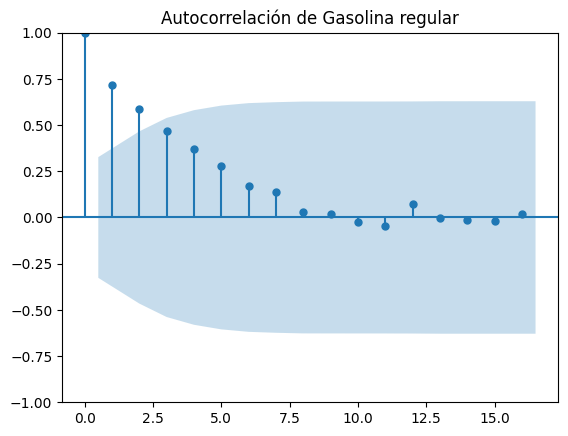

<Figure size 1000x600 with 0 Axes>

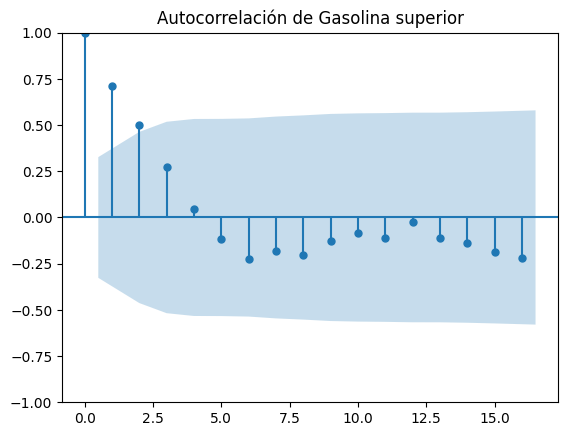

<Figure size 1000x600 with 0 Axes>

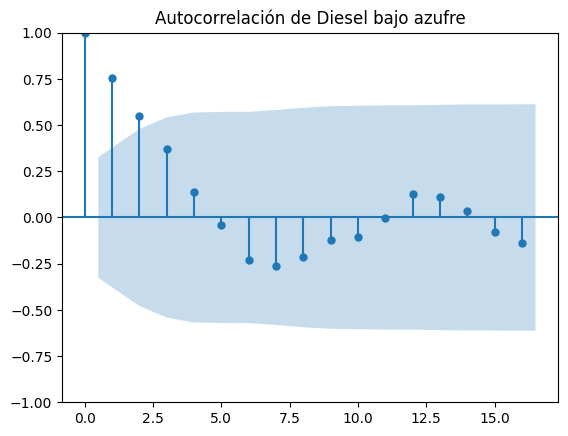

<Figure size 1000x600 with 0 Axes>

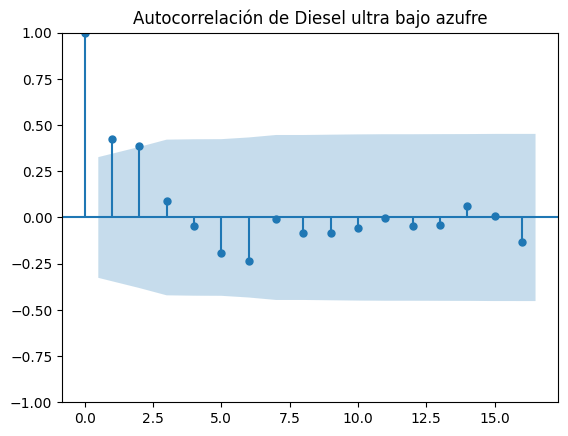

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 1000x600 with 0 Axes>

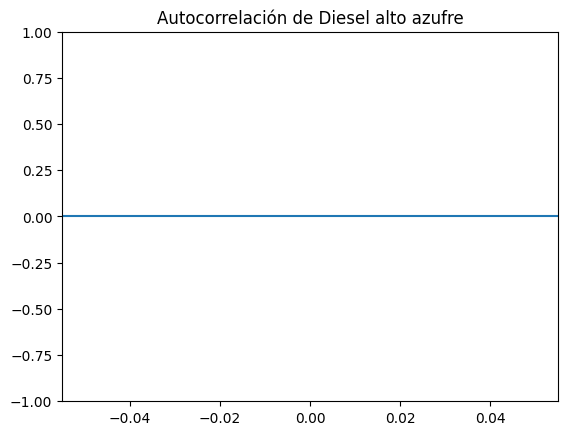

<Figure size 1000x600 with 0 Axes>

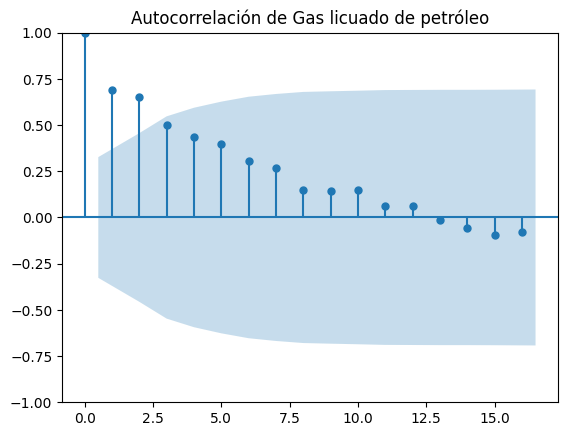

In [49]:
"""
Gasolina regular
Gasolina superior
Diesel bajo azufre
Diesel ultra bajo azufre
Diesel alto azufre
Gas licuado de petróleo
"""

# Creando un gráfico de autocorrelación para la columna "Gasolina regular"
plt.figure(figsize=(10, 6))
plot_acf(df2['Gasolina regular'], title='Autocorrelación de Gasolina regular')

plt.show()

# Creando un gráfico de autocorrelación para la columna "Gasolina superior"
plt.figure(figsize=(10, 6))
plot_acf(df2['Gasolina superior'], title='Autocorrelación de Gasolina superior')

plt.show()

# Creando un gráfico de autocorrelación para la columna "Diesel bajo azufre"
plt.figure(figsize=(10, 6))
plot_acf(df2['Diesel bajo azufre'], title='Autocorrelación de Diesel bajo azufre')

plt.show()

# Creando un gráfico de autocorrelación para la columna "Diesel ultra bajo azufre"
plt.figure(figsize=(10, 6))
plot_acf(df2['Diesel ultra bajo azufre'], title='Autocorrelación de Diesel ultra bajo azufre')

plt.show()

# Creando un gráfico de autocorrelación para la columna "Diesel alto azufre"
plt.figure(figsize=(10, 6))
plot_acf(df2['Diesel alto azufre'], title='Autocorrelación de Diesel alto azufre')

plt.show()

# Creando un gráfico de autocorrelación para la columna "Gas licuado de petróleo"
plt.figure(figsize=(10, 6))
plot_acf(df2['Gas licuado de petróleo'], title='Autocorrelación de Gas licuado de petróleo')

plt.show()

##### Se puede notar que todas las gráficas son estacionarias, dado que el comportamiento y el gráfico aún sigue disminuyendo en el eje "y" a medida que avanzan los modelos. Con lo anterior mencionado se podría decir, entonces, que no habría que aplicar una transformación muy fuerte en el modelo.

#### Inciso ii.

In [50]:
"""
Gasolina regular
Gasolina superior
Diesel bajo azufre
Diesel ultra bajo azufre
Diesel alto azufre
Gas licuado de petróleo
"""

# Nivel de significancia: 0.05.

# Aplicar la prueba de Phillips-Perron para Gasolina regular.
pp = PhillipsPerron(df['Gasolina regular'])
print(pp.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -5.197
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.63 (1%), -2.95 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [51]:
# Aplicar la prueba de Phillips-Perron para Gasolina superior.
pp = PhillipsPerron(df['Gasolina superior'])
print(pp.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.621
P-value                         0.005
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.63 (1%), -2.95 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [52]:
# Aplicar la prueba de Phillips-Perron para Diesel bajo azufre.
pp = PhillipsPerron(df['Diesel bajo azufre'])
print(pp.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.992
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.63 (1%), -2.95 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [53]:
# Aplicar la prueba de Phillips-Perron para Diesel ultra bajo azufre.
pp = PhillipsPerron(df['Diesel ultra bajo azufre'])
print(pp.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -13.603
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.63 (1%), -2.95 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [54]:
# Aplicar la prueba de Phillips-Perron para Diesel alto azufre.
#pp = PhillipsPerron(df['Diesel alto azufre'])

print("Diesel alto azufre con datos deficientes")
#print(pp.summary())

Diesel alto azufre con datos deficientes


In [55]:
# Aplicar la prueba de Phillips-Perron para Gas licuado de petróleo.
pp = PhillipsPerron(df['Gas licuado de petróleo'])
print(pp.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -9.148
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.63 (1%), -2.95 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


##### Se puede notar en los anteiores cálculos de Phillps-Perron que el valor p es de 0.000, lo cual es menor al valor predefinido de 0.05, por lo tanto no hay que aplicar ninguna transformación para poder volver estacionaria la serie de tiempo. Estos resultados también dan una mayor fuerza a los resultados obtenidos en el inciso "e", los cuales también indicaban que no había necesidad de aplicar transformaciones en la serie de tiempo.

#### f. Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA que utilizará para predecir. Explique en qué se basó para darle valor a estos parámetros, basándose en las funciones de autocorrelación y autocorrelación parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el modelo propuesto.

In [56]:
"""
Gasolina regular
Gasolina superior
Diesel bajo azufre
Diesel ultra bajo azufre
Diesel alto azufre
Gas licuado de petróleo
"""

print("Gasolina regular")
# Gasolina regular.
serie_tiempo = df2['Gasolina regular']

# Utiliza auto_arima para ajustar el modelo ARIMA automáticamente.
modelo_arima = auto_arima(serie_tiempo, seasonal=False, trace=True)

# Muestra el resumen del modelo ajustado.
print(modelo_arima.summary())

# Realiza predicciones con el modelo ajustado.
predicciones = modelo_arima.predict(n_periods=100)  # Usando series de 100.

# Muestra las predicciones.
print(predicciones)


Gasolina regular
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=884.570, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=876.110, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=877.807, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=879.463, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=874.497, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=881.729, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.335 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -436.249
Date:                Mon, 07 Aug 2023   AIC                            874.497
Time:                        15:57:32   BIC                            876.052
Sample:                    01-01-2020   HQIC                           875.034

##### Arima seleccionado: (0, 1, 0) o (0, 1, 1) dado que son los que menos tienen AIC y a la vez tienen interceptos con las función que se genera en la simulación.

In [57]:
print("Gasolina superior")
# Gasolina regular.
serie_tiempo = df2['Gasolina superior']

# Utiliza auto_arima para ajustar el modelo ARIMA automáticamente.
modelo_arima = auto_arima(serie_tiempo, seasonal=False, trace=True)

# Muestra el resumen del modelo ajustado.
print(modelo_arima.summary())

# Realiza predicciones con el modelo ajustado.
predicciones = modelo_arima.predict(n_periods=100)  # Usando series de 100.

# Muestra las predicciones.
print(predicciones)

Gasolina superior
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=916.318, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1062.067, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1040.769, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=914.197, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1039.369, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=911.649, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=913.581, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=904.202, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=912.014, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=901.648, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=924.609, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=903.669, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=906.622, Time=0.14 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.974 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:         

#### Mejor ARIMA: (1, 0, 0) dado que tiene menos AIC y tiene interceptos con la función generada en el modelo. Asimismo, se seleccionó el (1, 0, 1) dado que es de los mejores AIC contiene la simulación. 

In [58]:
print("Diesel bajo azufre")
# Gasolina regular.
serie_tiempo = df2['Diesel bajo azufre']

# Utiliza auto_arima para ajustar el modelo ARIMA automáticamente.
modelo_arima = auto_arima(serie_tiempo, seasonal=False, trace=True)

# Muestra el resumen del modelo ajustado.
print(modelo_arima.summary())

# Realiza predicciones con el modelo ajustado.
predicciones = modelo_arima.predict(n_periods=100)  # Usando series de 100.

# Muestra las predicciones.
print(predicciones)

Diesel bajo azufre
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=948.062, Time=0.18 sec


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1108.891, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1086.945, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=948.371, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=944.351, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=950.590, Time=0.07 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=946.116, Time=0.25 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=945.016, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=947.371, Time=0.19 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 2.502 seconds
                               SARIMAX Results                                
Dep. Variable:  

##### Arima seleccionado: (3, 0, 3) o (3, 0, 2) dado que poseen interceptos con la función y menos AIC. 

In [59]:
print("Diesel ultra bajo azufre")
# Gasolina regular.
serie_tiempo = df2['Diesel ultra bajo azufre']

# Utiliza auto_arima para ajustar el modelo ARIMA automáticamente.
modelo_arima = auto_arima(serie_tiempo, seasonal=False, trace=True)

# Muestra el resumen del modelo ajustado.
print(modelo_arima.summary())

# Realiza predicciones con el modelo ajustado.
predicciones = modelo_arima.predict(n_periods=100)  # Usando series de 100.

# Muestra las predicciones.
print(predicciones)

Diesel ultra bajo azufre
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=669.741, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=770.104, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=671.530, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=738.383, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=668.401, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=715.644, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=666.619, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=667.808, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=665.818, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=667.842, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=669.803, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=658.560, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=658.676, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=659.458, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0

#### Mejor ARIMA: (2, 0, 0) dado que es el que menor AIC posee de la simulación. Asimismo, se seleccionó el (1, 0, 0) dado su AIC más cercano con (2, 0, 0).

In [60]:
print("Diesel alto azufre")
# Gasolina regular.
serie_tiempo = df2['Diesel alto azufre']

# Utiliza auto_arima para ajustar el modelo ARIMA automáticamente.
modelo_arima = auto_arima(serie_tiempo, seasonal=False, trace=True)

# Muestra el resumen del modelo ajustado.
print(modelo_arima.summary())

# Realiza predicciones con el modelo ajustado.
predicciones = modelo_arima.predict(n_periods=100)  # Usando series de 100.

# Muestra las predicciones.
print(predicciones)

Diesel alto azufre
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-760.767, Time=0.03 sec
Total fit time: 0.032 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                        SARIMAX   Log Likelihood                 381.384
Date:                Mon, 07 Aug 2023   AIC                           -760.767
Time:                        15:57:37   BIC                           -759.184
Sample:                    01-01-2020   HQIC                          -760.214
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10    3.3e-10      0.303      0.762   -5.47e-10    7.47e-10
Ljung-Box (L1) (

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1363: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


#### ARIMA seleccionado: (0, 0, 0) dado que es el único que se pudo generar en la simulación tras no tener datos.

In [61]:
print("Gas licuado de petróleo")
# Gasolina regular.
serie_tiempo = df2['Gas licuado de petróleo']

# Utiliza auto_arima para ajustar el modelo ARIMA automáticamente.
modelo_arima = auto_arima(serie_tiempo, seasonal=False, trace=True)

# Muestra el resumen del modelo ajustado.
print(modelo_arima.summary())

# Realiza predicciones con el modelo ajustado.
predicciones = modelo_arima.predict(n_periods=100)  # Usando series de 100.

# Muestra las predicciones.
print(predicciones)

Gas licuado de petróleo
Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=835.485, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=836.610, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=839.941, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=833.926, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=840.987, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.531 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -415.963
Date:                Mon, 07 Aug 2023   AIC                            833.926
Time:                        15:57:37   BIC                            835.481
Sample:                    01-01-2020   HQIC                           834.463
                         - 12-01-2022                          

#### Mejor ARIMA: (0, 1, 0) dado que es el que menos AIC tiene en la simulación. También se eligió el (1, 1, 0), dado que también posee un buen rendimiento en la simulación.

#### g. Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. Para esto analice los residuos y las métricas AIC y/ BIC.

0      2000-01-01 00:00:00
1      2000-02-01 00:00:00
2      2000-03-01 00:00:00
3      2000-04-01 00:00:00
4      2000-05-01 00:00:00
              ...         
276    2023-01-01 00:00:00
277    2023-02-01 00:00:00
278    2023-03-01 00:00:00
279    2023-04-01 00:00:00
280    2023-05-01 00:00:00
Name: Fecha, Length: 281, dtype: object
2018-09-01    570224.107
2018-10-01    570224.107
2018-11-01    570224.107
2018-12-01    570224.107
2019-01-01    570224.107
2019-02-01    570224.107
2019-03-01    570224.107
2019-04-01    570224.107
2019-05-01    570224.107
2019-06-01    570224.107
2019-07-01    570224.107
2019-08-01    570224.107
2019-09-01    570224.107
2019-10-01    570224.107
2019-11-01    570224.107
2019-12-01    570224.107
2020-01-01    570224.107
2020-02-01    570224.107
2020-03-01    570224.107
2020-04-01    570224.107
2020-05-01    570224.107
2020-06-01    570224.107
2020-07-01    570224.107
2020-08-01    570224.107
2020-09-01    570224.107
2020-10-01    570224.107
2020-11-01   

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


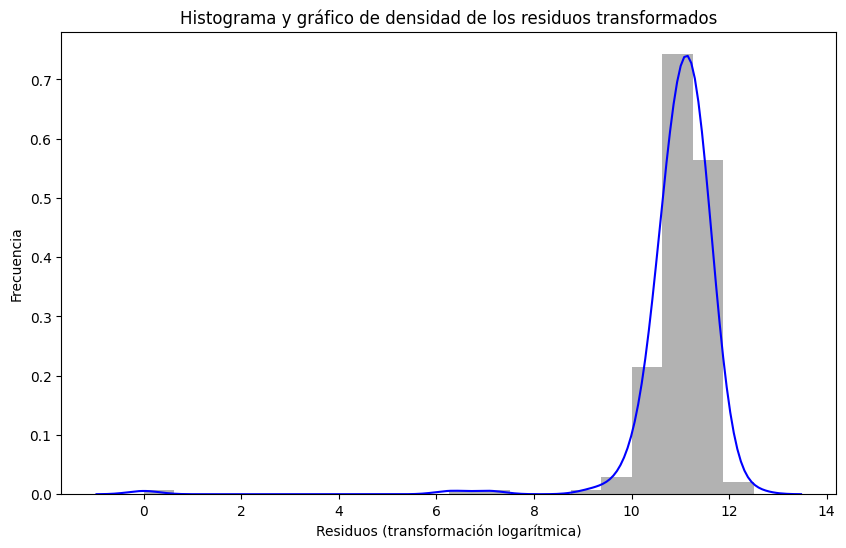

AIC: 5220.1917749523345
BIC: 5223.598946723795


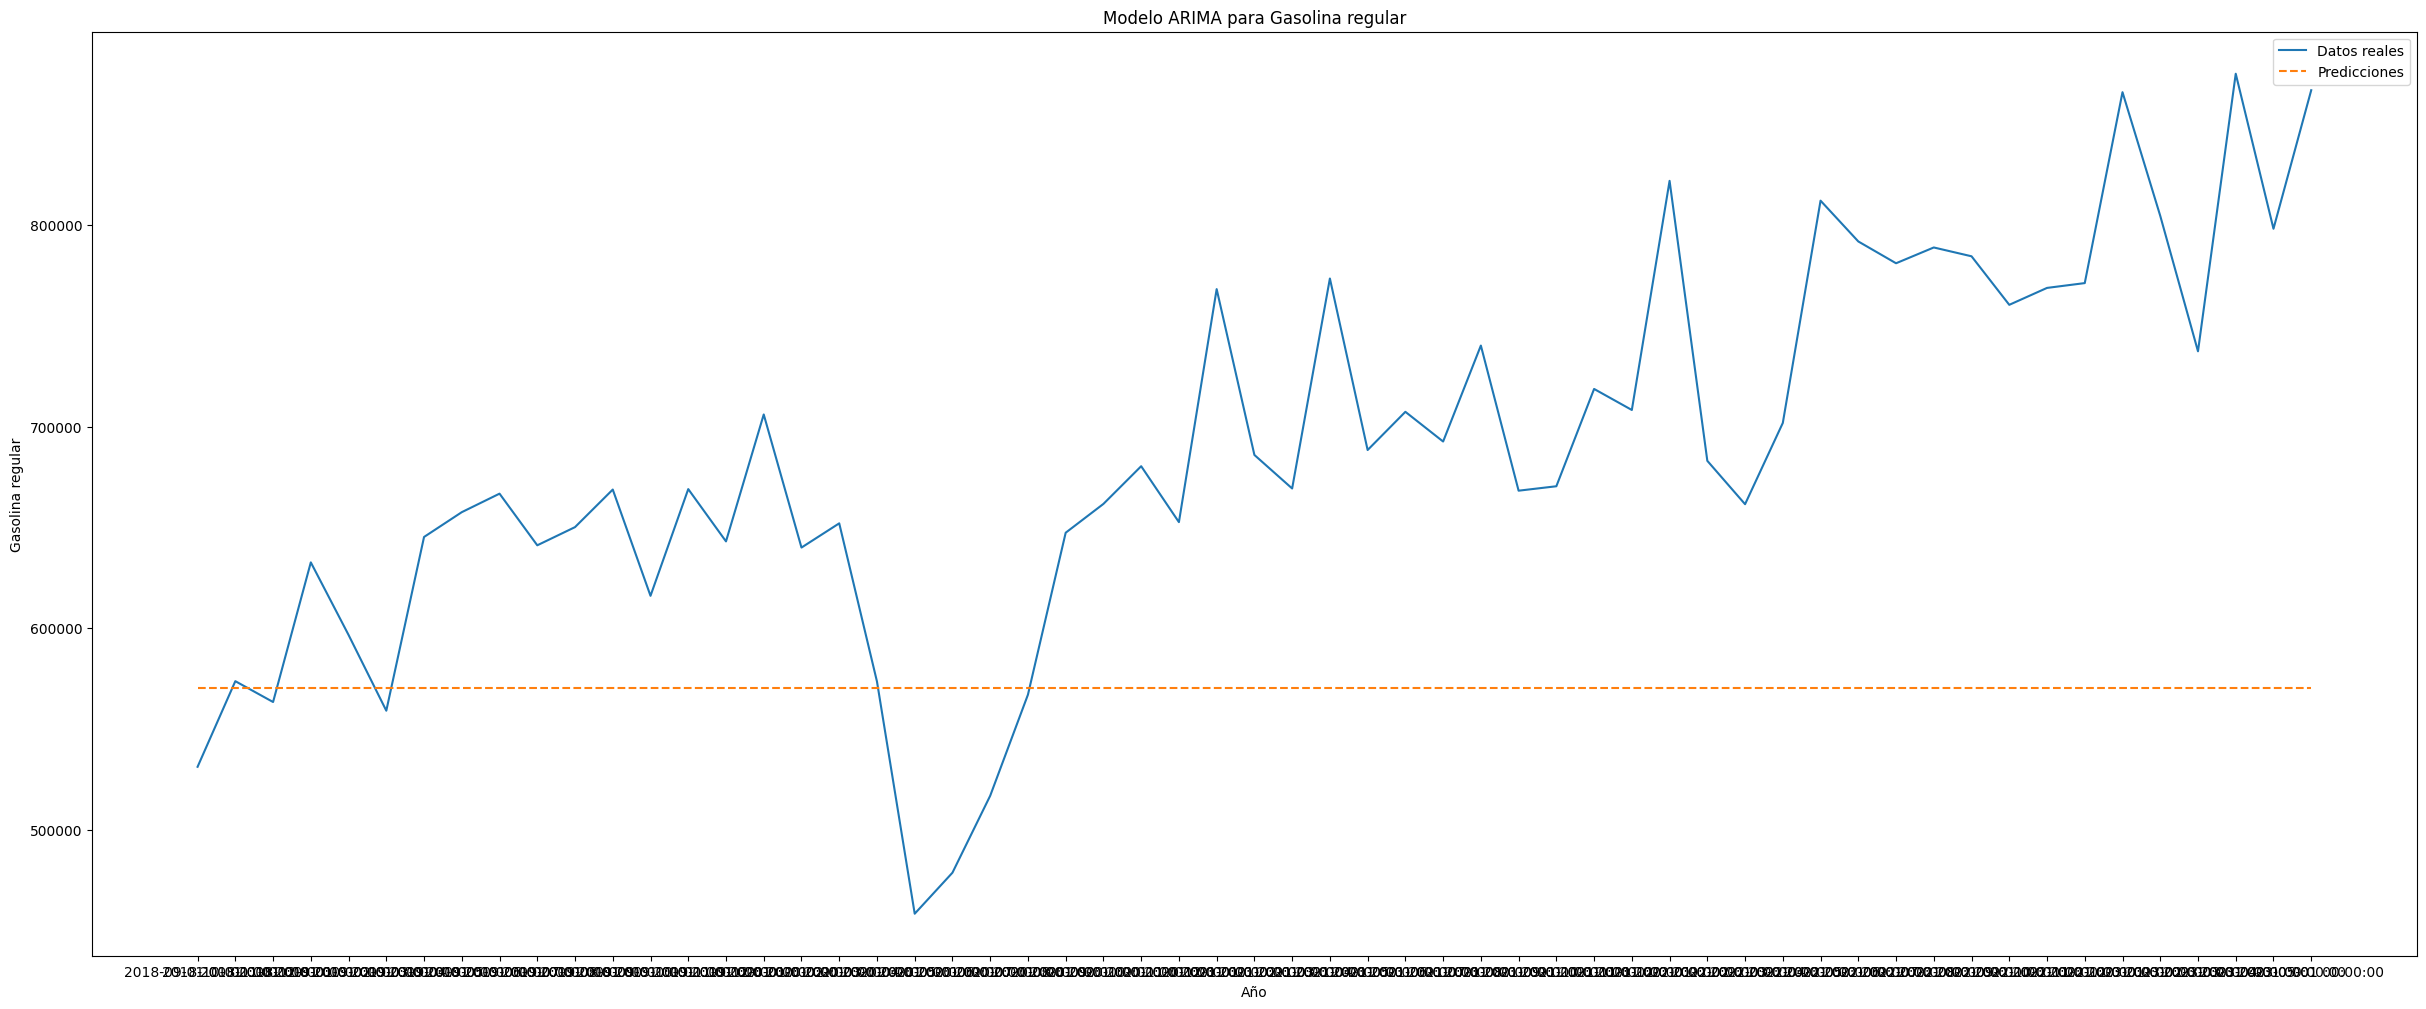

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2018-09-01    549812.023596
2018-10-01    549812.023596
2018-11-01    549812.023596
2018-12-01    549812.023596
2019-01-01    549812.023596
2019-02-01    549812.023596
2019-03-01    549812.023596
2019-04-01    549812.023596
2019-05-01    549812.023596
2019-06-01    549812.023596
2019-07-01    549812.023596
2019-08-01    549812.023596
2019-09-01    549812.023596
2019-10-01    549812.023596
2019-11-01    549812.023596
2019-12-01    549812.023596
2020-01-01    549812.023596
2020-02-01    549812.023596
2020-03-01    549812.023596
2020-04-01    549812.023596
2020-05-01    549812.023596
2020-06-01    549812.023596
2020-07-01    549812.023596
2020-08-01    549812.023596
2020-09-01    549812.023596
2020-10-01    549812.023596
2020-11-01    549812.023596
2020-12-01    549812.023596
2021-01-01    549812.023596
2021-02-01    549812.023596
2021-03-01    549812.023596
2021-04-01    549812.023596
2021-05-01    549812.023596
2021-06-01    549812.023596
2021-07-01    549812.023596
2021-08-01    549812

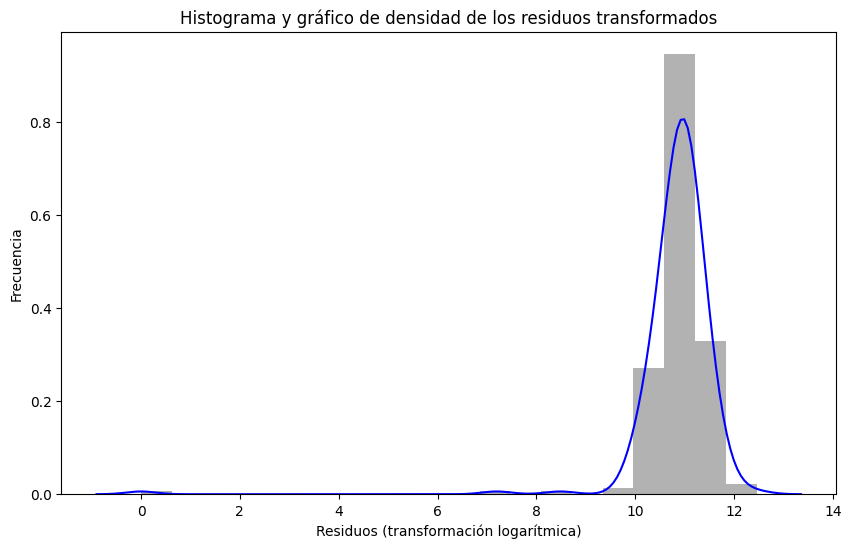

AIC: 5156.407435520852
BIC: 5163.221779063772


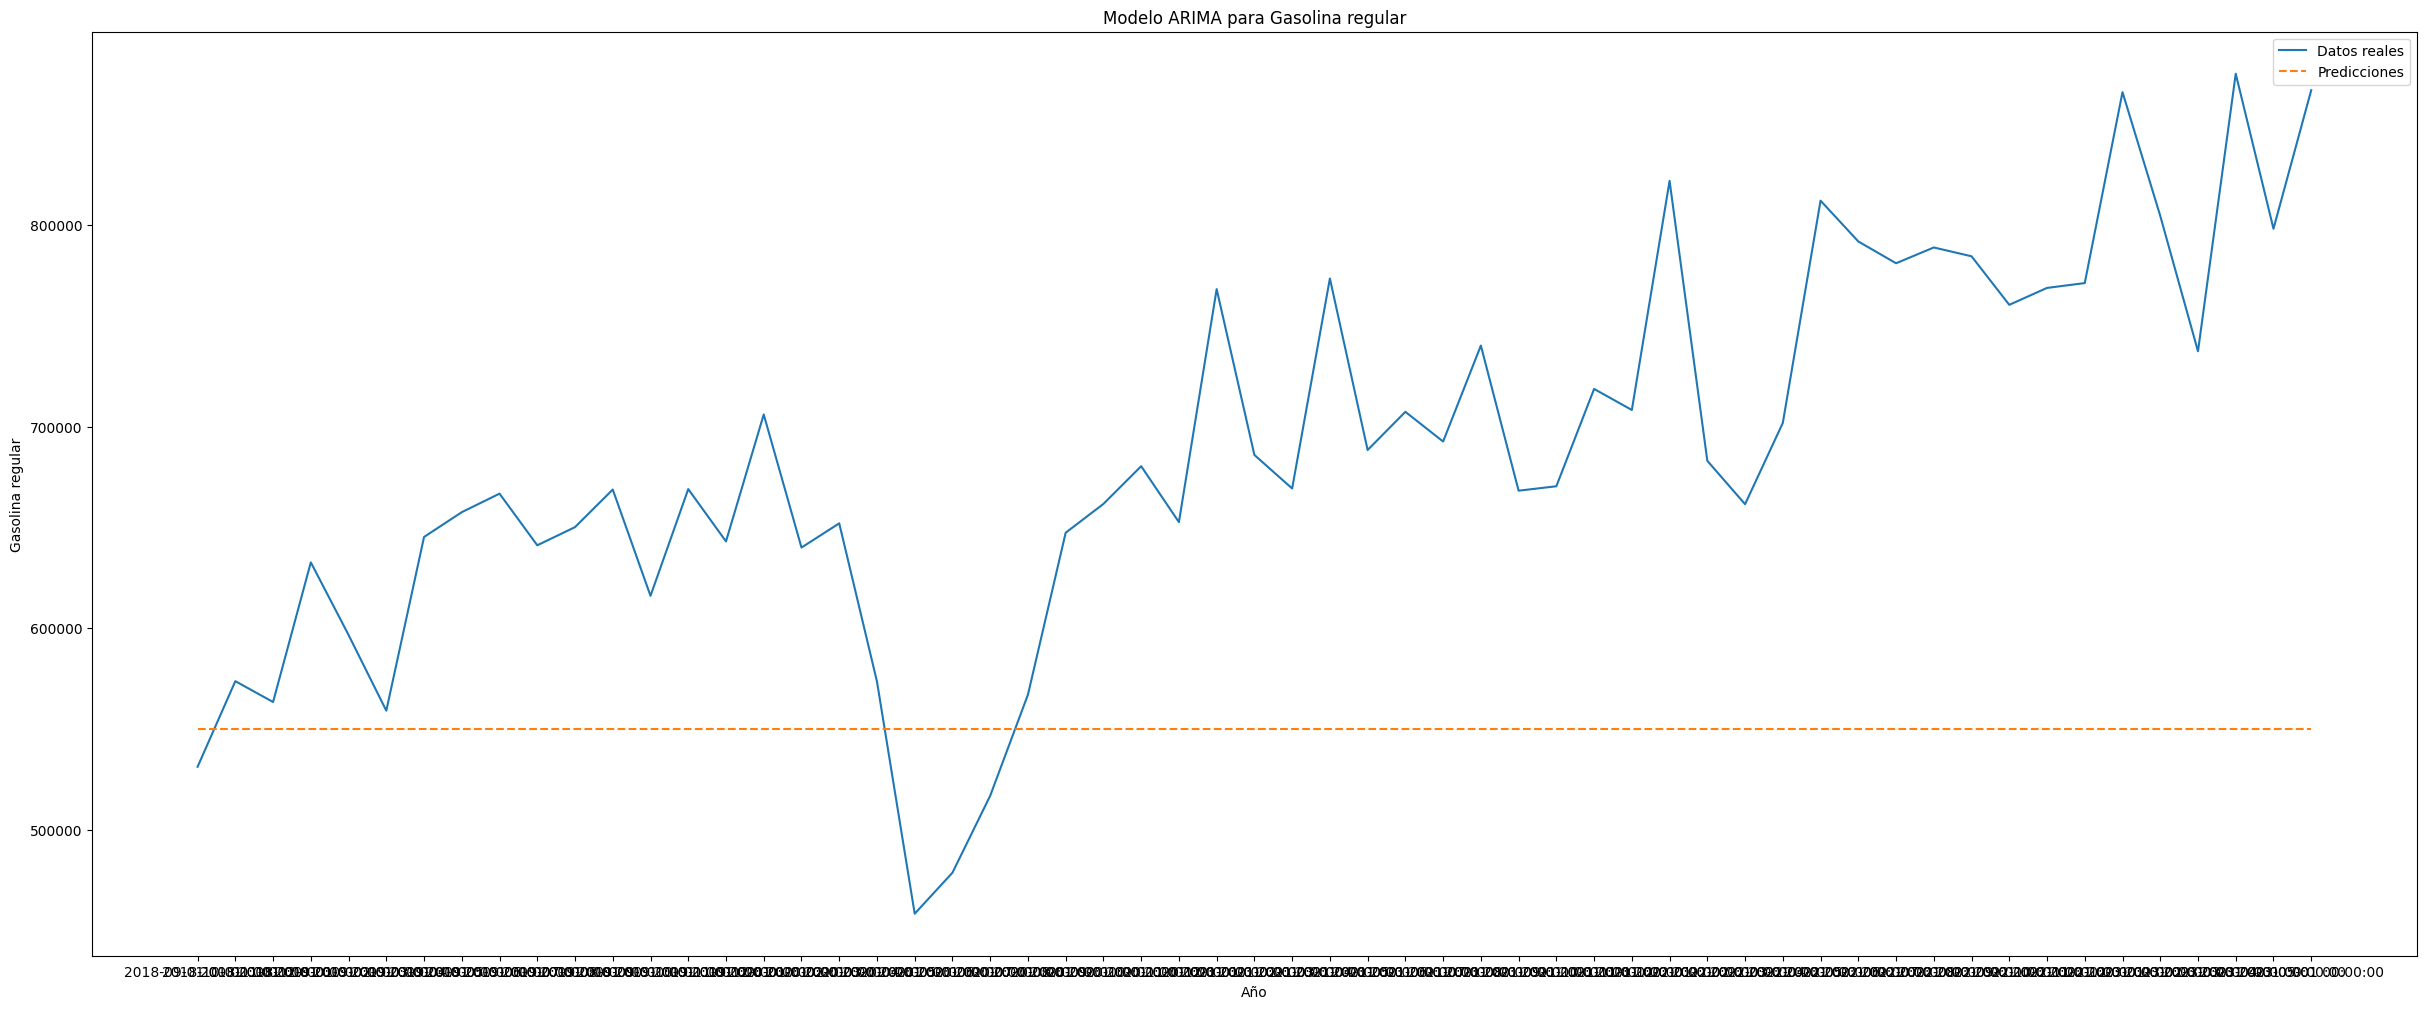

In [62]:
# Convierte la columna de fechas a formato de fecha

df3 = pd.read_csv("consumo.csv")

df3.fillna(0, inplace=True)

print(df3["Fecha"])

#df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df3.set_index('Fecha', inplace=True)

# Usando la gasolina regular.
variable_interes = 'Gasolina regular'

# Usando un 80% para el entrenamiento.
train_size = int(len(df3) * 0.8)
train_data = df3[variable_interes][:train_size]
test_data = df3[variable_interes][train_size:]

# Crea el modelo ARIMA
order = (0,1,0)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

residuals = model_fit.resid

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

# Obtener los valores de AIC y BIC del modelo ajustado
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(30, 12))
plt.plot(df3.index[train_size:], test_data, label='Datos reales')
plt.plot(df3.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Año')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Crea el modelo ARIMA
order = (0,1,1)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

residuals = model_fit.resid

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
 
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

# Obtener los valores de AIC y BIC del modelo ajustado
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(30, 12))
plt.plot(df3.index[train_size:], test_data, label='Datos reales')
plt.plot(df3.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Año')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


#### Estas dos series de tiempo presentaron una gran eficiencia al momento de adaptarse al set de datos proveído. Asimismo, presentaron un excelente rendimiento al momento de querer predecir datos.

224    575872.552293
225    559919.582355
226    545611.596859
227    532778.973858
228    521269.581910
229    510946.976544
230    501688.782715
231    493385.244029
232    485937.921584
233    479258.526968
234    473267.875593
235    467894.947961
236    463076.047723
237    458754.046555
238    454877.706898
239    451401.074534
240    448282.933796
241    445486.318958
242    442978.075997
243    440728.469558
244    438710.830433
245    436901.239401
246    435278.243662
247    433822.602512
248    432517.059248
249    431346.136581
250    430295.953161
251    429354.059006
252    428509.287910
253    427751.625064
254    427072.088336
255    426462.621779
256    425916.000135
257    425425.743174
258    424986.038874
259    424591.674516
260    424237.974889
261    423920.746865
262    423636.229688
263    423381.050392
264    423152.183813
265    422946.916723
266    422762.815672
267    422597.698131
268    422449.606623
269    422316.785514
270    422197.660203
271    422090

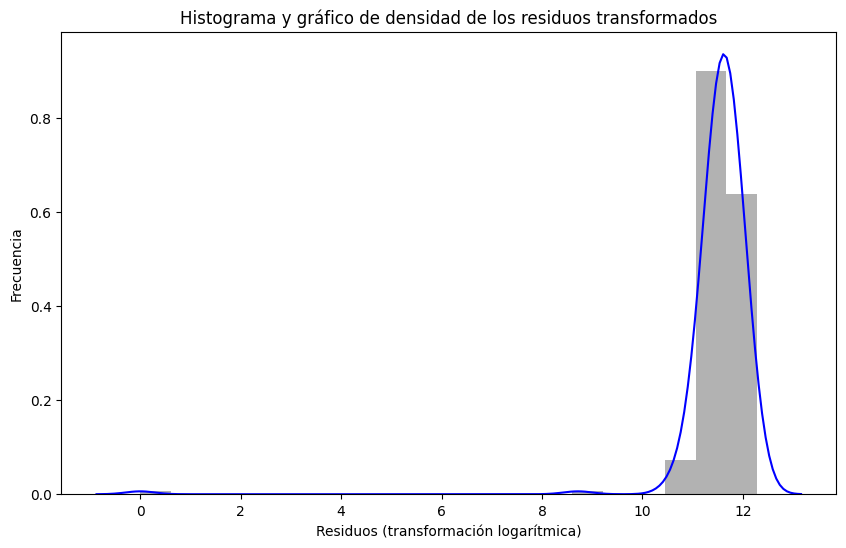

AIC: 5334.3098361860475
BIC: 5344.5447743416125


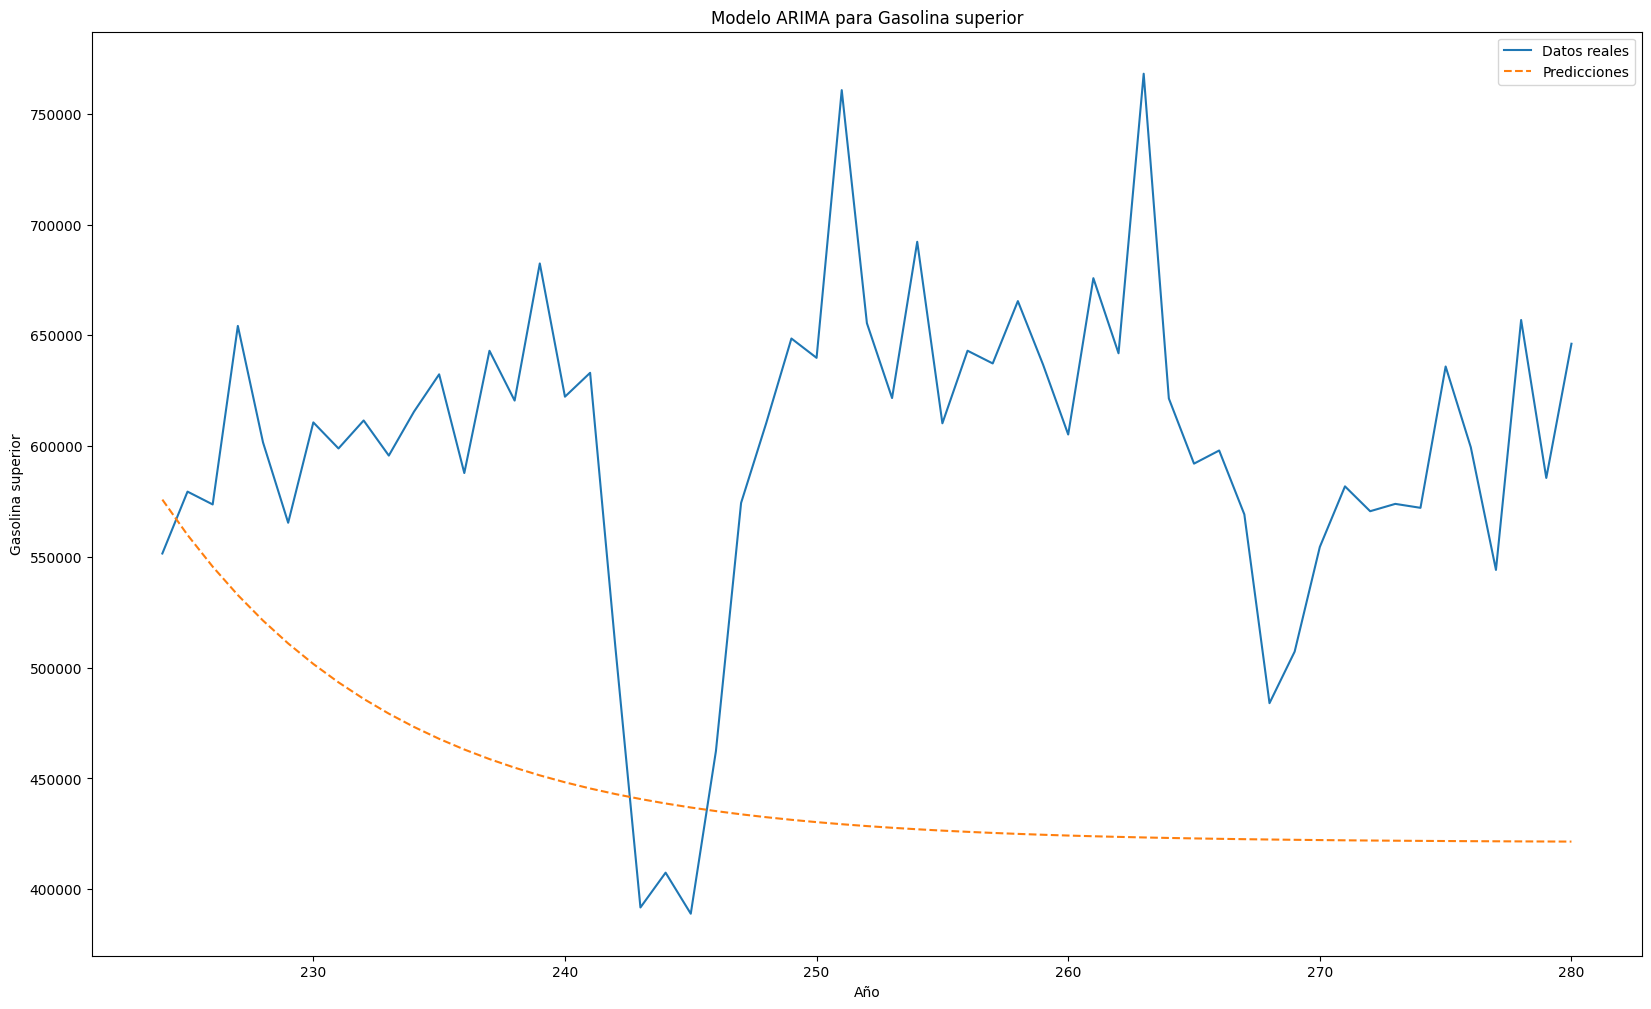

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


224    580244.160589
225    579881.868755
226    579520.401998
227    579159.758439
228    578799.936203
229    578440.933419
230    578082.748221
231    577725.378747
232    577368.823140
233    577013.079546
234    576658.146116
235    576304.021005
236    575950.702371
237    575598.188379
238    575246.477195
239    574895.566992
240    574545.455945
241    574196.142235
242    573847.624045
243    573499.899564
244    573152.966984
245    572806.824502
246    572461.470318
247    572116.902637
248    571773.119668
249    571430.119625
250    571087.900723
251    570746.461183
252    570405.799232
253    570065.913099
254    569726.801015
255    569388.461219
256    569050.891951
257    568714.091458
258    568378.057987
259    568042.789793
260    567708.285133
261    567374.542267
262    567041.559461
263    566709.334983
264    566377.867108
265    566047.154111
266    565717.194274
267    565387.985881
268    565059.527221
269    564731.816587
270    564404.852274
271    564078

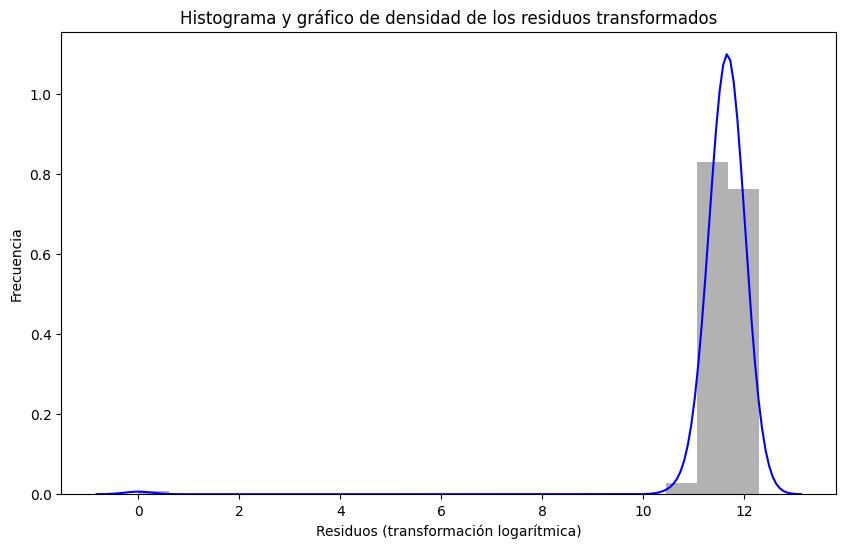

AIC: 5237.634839778084
BIC: 5251.281423985504


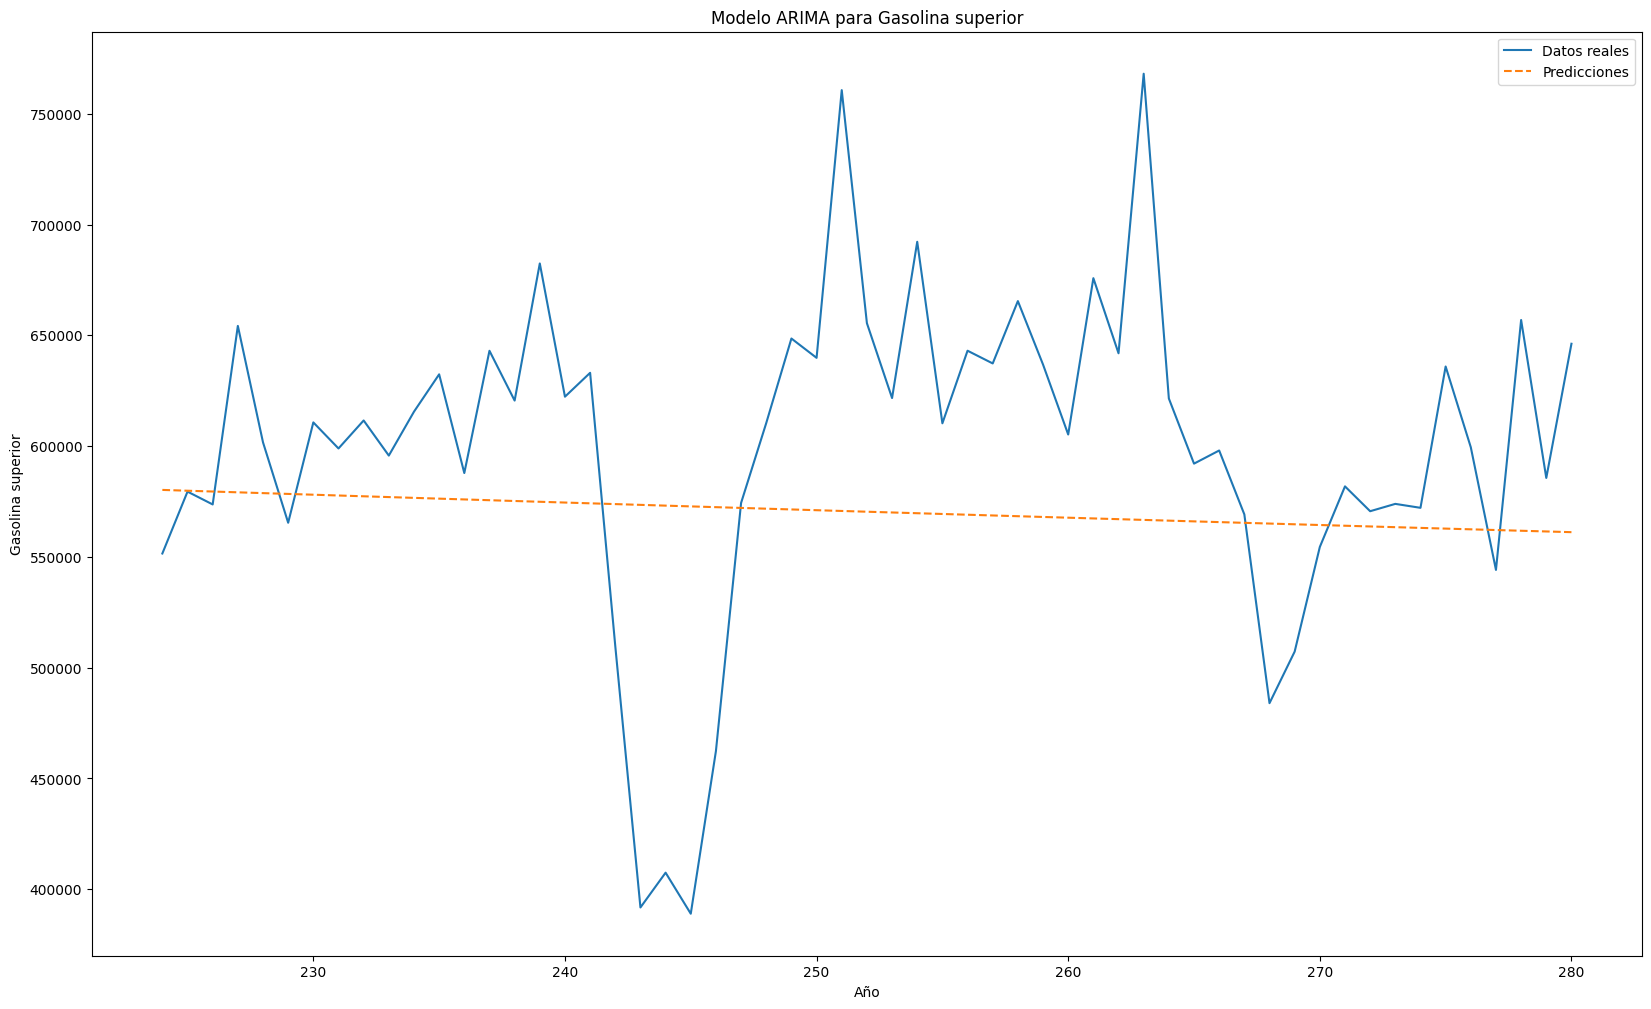

In [63]:

df4 = pd.read_csv("consumo.csv")

# Volviendo cero los na o NaN.
df4.fillna(0, inplace=True)

# Usando la gasolina superior.
variable_interes = 'Gasolina superior'

# Usando un 80% para el entrenamiento.
train_size = int(len(df4) * 0.8)
train_data = df4[variable_interes][:train_size]
test_data = df4[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (1, 0, 0)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

residuals = model_fit.resid

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(20, 12))
plt.plot(df4.index[train_size:], test_data, label='Datos reales')
plt.plot(df4.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Año')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Crea el modelo ARIMA para la gasolina superior.
order = (1, 0, 1)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

residuals = model_fit.resid

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(20, 12))
plt.plot(df4.index[train_size:], test_data, label='Datos reales')
plt.plot(df4.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Año')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

#### Tras observar los resultados de estos modelos, se puede observar claramente que las series trabajadas serán de bastante utilidad para poder predecir cualquier dato a futuro. Asimismo, se puede observar una excelente adaptación de los modelos a los datos. Lo anterior también resalta que las series de tiempo serán bastante útiles para más datos de este tipo.

224    955936.083354
225    894379.548346
226    841697.544115
227    814197.188673
228    796898.227115
229    771332.548548
230    736180.514110
231    701927.474234
232    675243.153992
233    653435.564560
234    630865.428777
235    605952.059841
236    581206.175667
237    558968.455283
238    538985.887105
239    519648.025306
240    500164.803768
241    481039.577416
242    463005.445269
243    446136.279785
244    429995.074872
245    414260.636071
246    398990.370769
247    384385.615346
248    370498.691318
249    357210.996719
250    344399.566023
251    332044.356676
252    320186.970786
253    308841.794942
254    297971.062455
255    287525.038194
256    277479.885108
257    267834.441206
258    258585.238761
259    249714.354463
260    241197.789430
261    233017.591178
262    225163.545540
263    217626.700920
264    210394.658518
265    203452.849152
266    196788.108742
267    190389.893934
268    184248.763339
269    178354.758941
270    172697.402425
271    167266

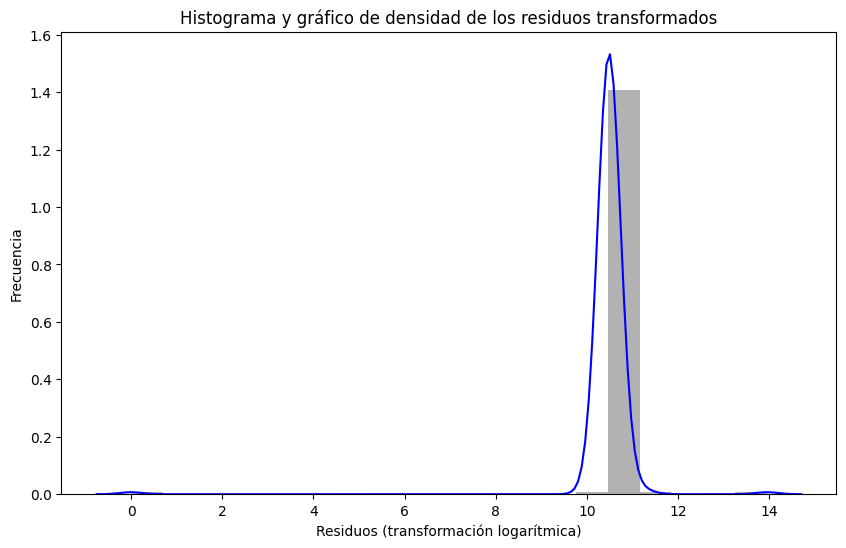

AIC: 5677.097996095527
BIC: 5704.391164510368


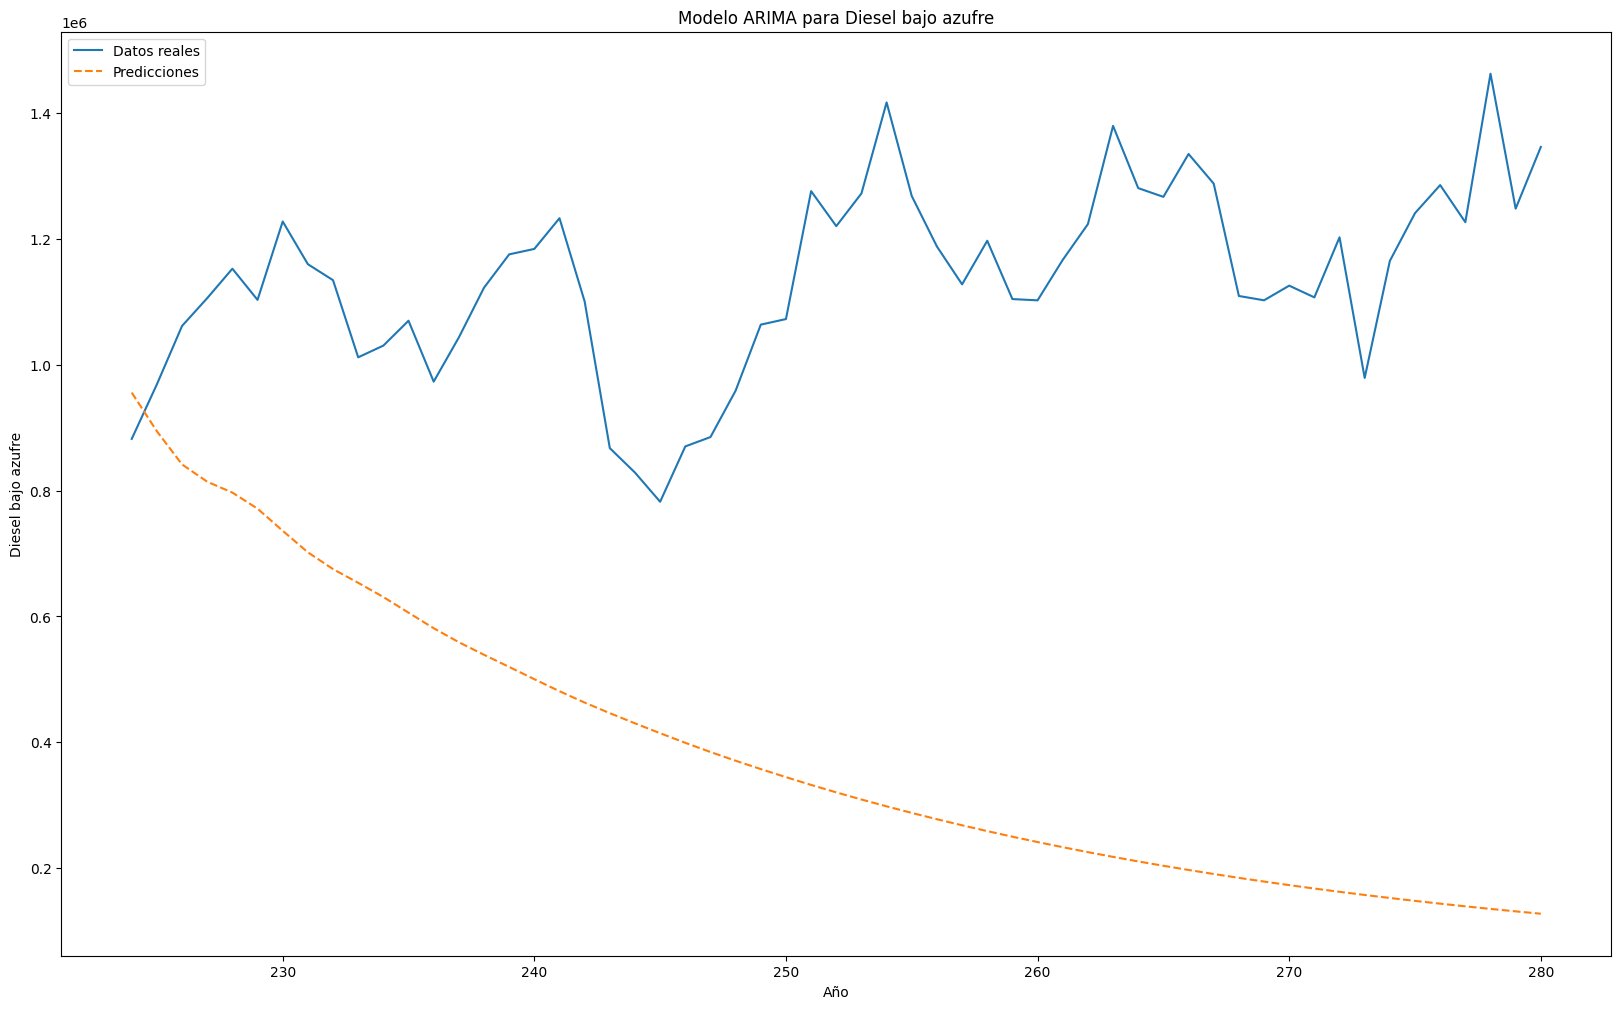

224    921977.436520
225    848476.212452
226    811364.788645
227    789928.068237
228    752155.651787
229    702603.450646
230    663263.936951
231    637064.617482
232    610316.725456
233    577213.774165
234    544969.612246
235    519240.044170
236    496759.874534
237    472833.599746
238    448200.952261
239    426035.149569
240    406635.838340
241    387928.794028
242    369067.151928
243    351095.293321
244    334780.554965
245    319583.430045
246    304789.493295
247    290492.655107
248    277126.523315
249    264693.565628
250    252858.872308
251    241478.934837
252    230685.706554
253    220564.431965
254    211010.055480
255    201897.902768
256    193224.225335
257    185033.329195
258    177305.694033
259    169974.673477
260    163004.021289
261    156398.220167
262    150154.634035
263    144243.528680
264    138633.733494
265    133312.667404
266    128275.027521
267    123506.542705
268    118986.828169
269    114700.717087
270    110639.458508
271    106793

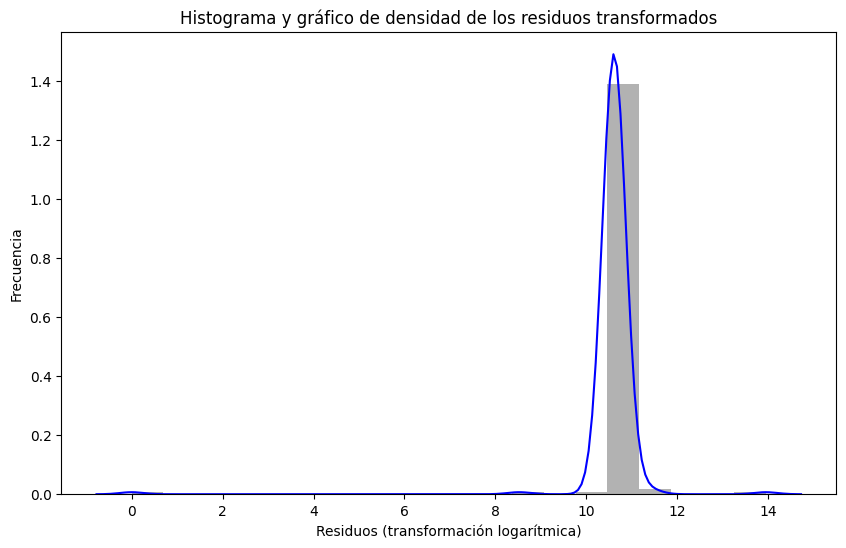

AIC: 5675.440761450958
BIC: 5699.322283813944


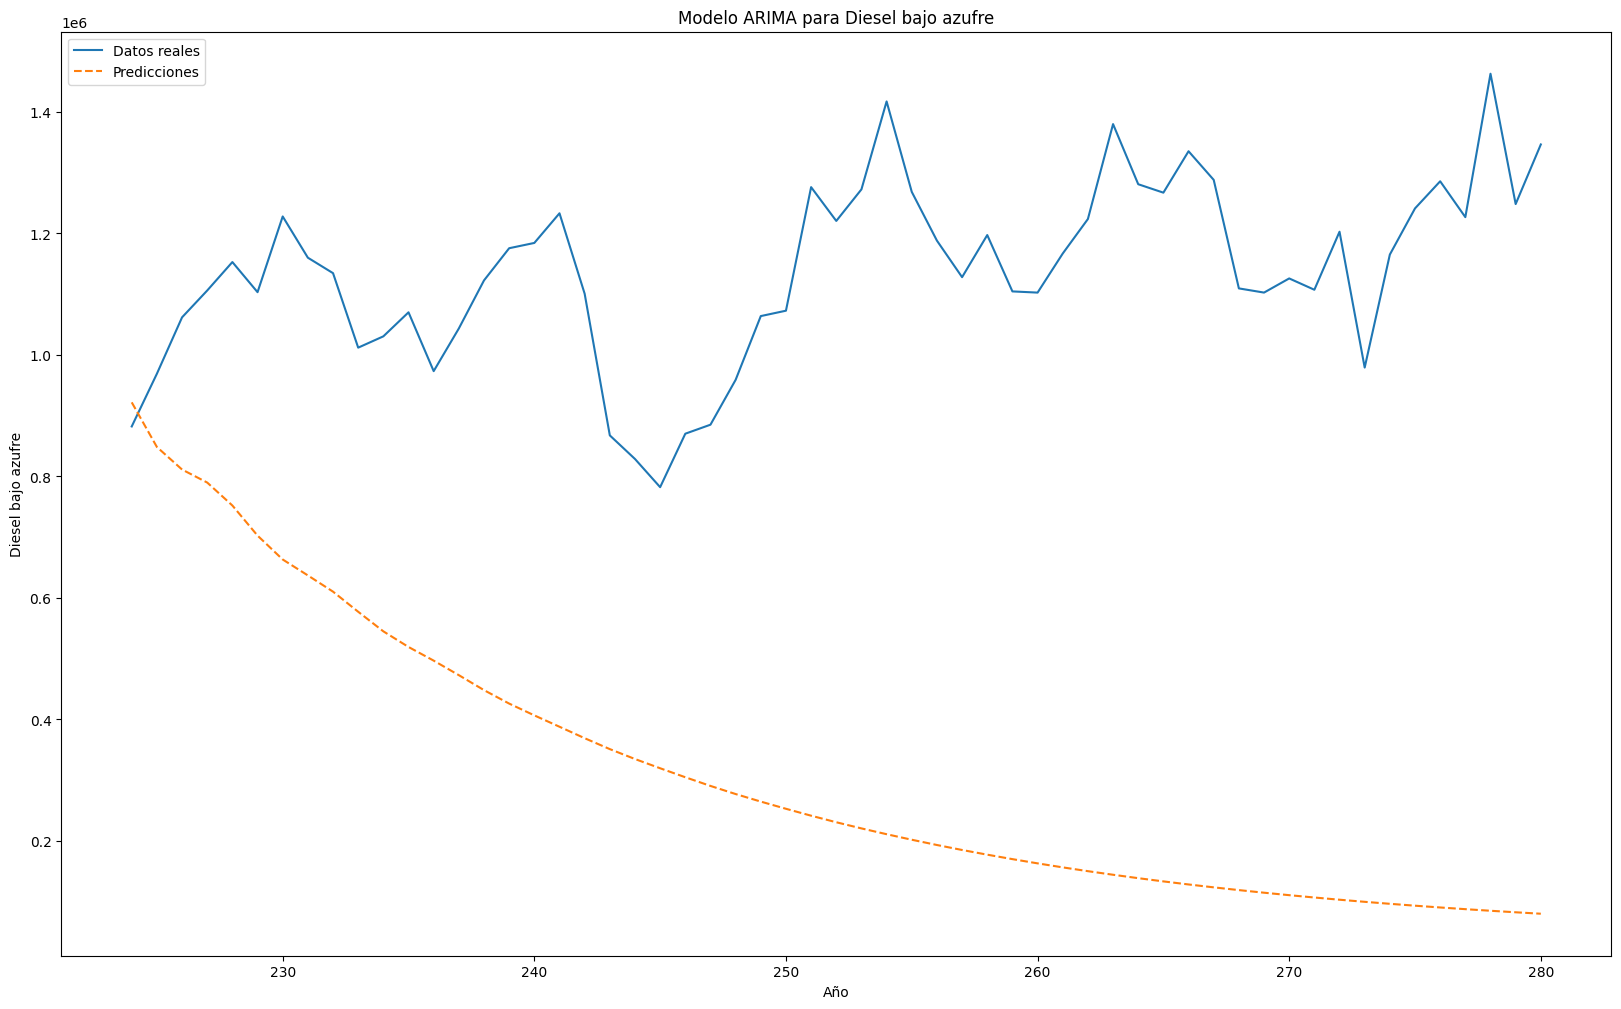

In [64]:
df5 = pd.read_csv("consumo.csv")

df5.fillna(0, inplace=True)

# Usando la Diesel bajo azufre.
variable_interes = 'Diesel bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df5) * 0.8)
train_data = df5[variable_interes][:train_size]
test_data = df5[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 0, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

residuals = model_fit.resid

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(20, 12))
plt.plot(df5.index[train_size:], test_data, label='Datos reales')
plt.plot(df5.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Año')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 0, 2)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

residuals = model_fit.resid

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(20, 12))
plt.plot(df5.index[train_size:], test_data, label='Datos reales')
plt.plot(df5.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Año')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

#### Al observar el comportamiento y los resultados de estos modelos, se puede decir que se tendrá una gran precisión al momento de querer predecir datos a futuro y que se podrá tener una excelente adaptación del modelo a más datos proporcionados en un futuro.

224    7858.622948
225    6973.374787
226    6192.352914
227    5504.357073
228    4898.336835
229    4364.525527
230    3894.319283
231    3480.139390
232    3115.310156
233    2793.951314
234    2510.883251
235    2261.543516
236    2041.913287
237    1848.452596
238    1678.043272
239    1527.938681
240    1395.719459
241    1279.254516
242    1176.666688
243    1086.302478
244    1006.705408
245     936.592546
246     874.833821
247     820.433816
248     772.515719
249     730.307194
250     693.127928
251     660.378674
252     631.531581
253     606.121699
254     583.739472
255     564.024149
256     546.657960
257     531.360999
258     517.886713
259     506.017925
260     495.563335
261     486.354438
262     478.242805
263     471.097696
264     464.803946
265     459.260114
266     454.376844
267     450.075429
268     446.286539
269     442.949106
270     440.009337
271     437.419849
272     435.138906
273     433.129743
274     431.359978
275     429.801085
276     428.

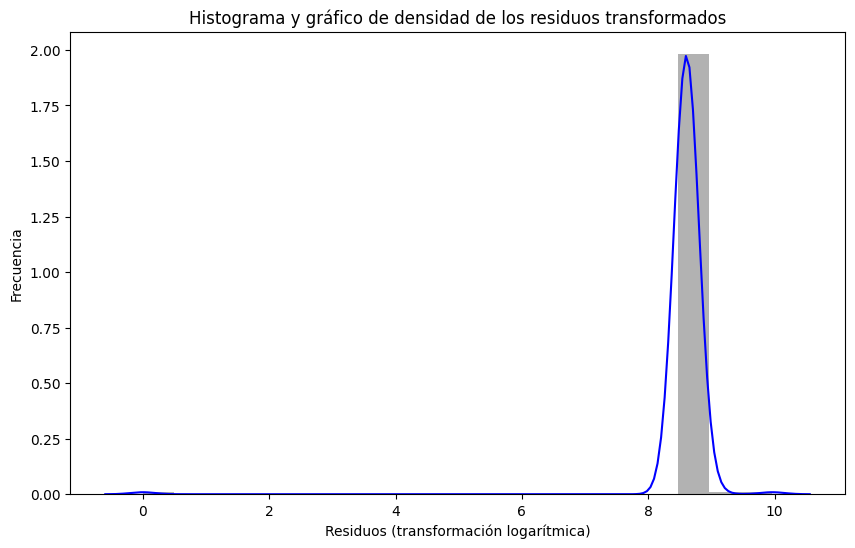

AIC: 3799.1337615424018
BIC: 3812.780345749822


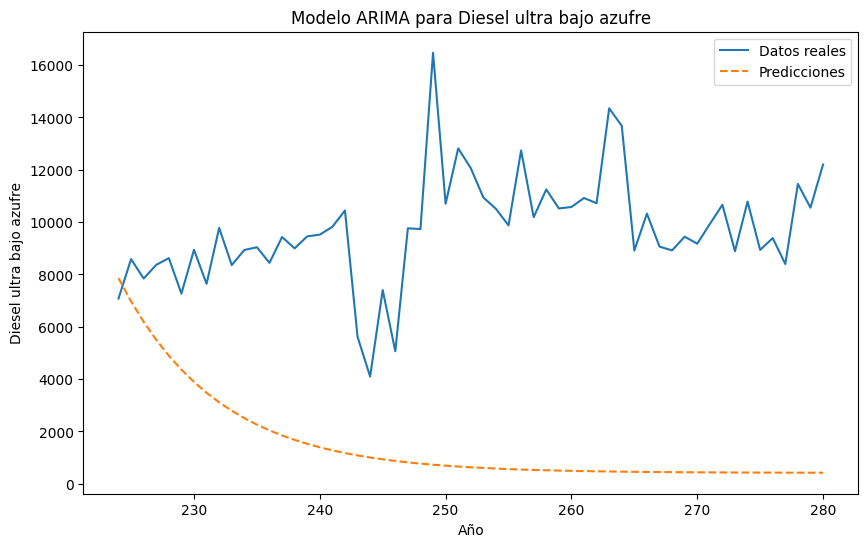

224    7872.630673
225    7038.050153
226    6296.908269
227    5638.743742
228    5054.266527
229    4535.226681
230    4074.297915
231    3664.974181
232    3301.477842
233    2978.678118
234    2692.018664
235    2437.453260
236    2211.388693
237    2010.634044
238    1832.355646
239    1674.037083
240    1533.443677
241    1408.590940
242    1297.716566
243    1199.255555
244    1111.818120
245    1034.170075
246     965.215413
247     903.980832
248     849.602002
249     801.311360
250     758.427281
251     720.344451
252     686.525330
253     656.492557
254     629.822217
255     606.137857
256     585.105169
257     566.427276
258     549.840537
259     535.110830
260     522.030243
261     510.414143
262     500.098568
263     490.937912
264     482.802872
265     475.578621
266     469.163189
267     463.466021
268     458.406701
269     453.913817
270     449.923950
271     446.380784
272     443.234307
273     440.440105
274     437.958739
275     435.755184
276     433.

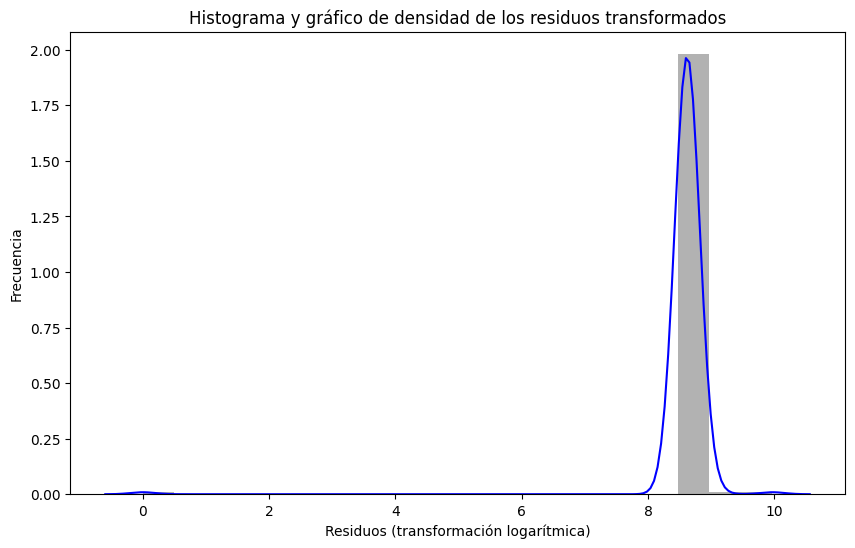

AIC: 3797.254787406186
BIC: 3807.489725561751


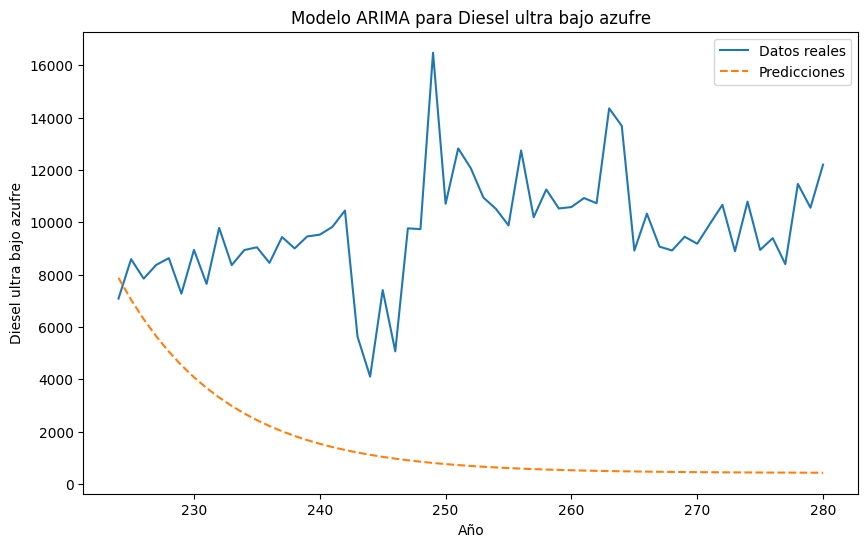

In [65]:
df6 = pd.read_csv("consumo.csv")

df6.fillna(0, inplace=True)

# Usando el Diesel ultra bajo azufre.
variable_interes = 'Diesel ultra bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df6) * 0.8)
train_data = df6[variable_interes][:train_size]
test_data = df6[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (2, 0, 0)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Obtener los residuos del modelo ajustado
residuals = model_fit.resid

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

# Obtener los valores de AIC y BIC del modelo ajustado
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df6.index[train_size:], test_data, label='Datos reales')
plt.plot(df6.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Año')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Crea el modelo ARIMA para la gasolina superior.
order = (1, 0, 0)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Obtener los residuos del modelo ajustado
residuals = model_fit.resid

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

# Obtener los valores de AIC y BIC del modelo ajustado
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df6.index[train_size:], test_data, label='Datos reales')
plt.plot(df6.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Año')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

#### Al observar los residuos y los valores de AIC y de BIC se puede notar que los modelos serán bastantes útiles y exactos para predecir cualquier dato a futuro. Asimismo, presentan una gran eficiencia para adaptarse a los modelos de datos que se les de.

224    0.0
225    0.0
226    0.0
227    0.0
228    0.0
229    0.0
230    0.0
231    0.0
232    0.0
233    0.0
234    0.0
235    0.0
236    0.0
237    0.0
238    0.0
239    0.0
240    0.0
241    0.0
242    0.0
243    0.0
244    0.0
245    0.0
246    0.0
247    0.0
248    0.0
249    0.0
250    0.0
251    0.0
252    0.0
253    0.0
254    0.0
255    0.0
256    0.0
257    0.0
258    0.0
259    0.0
260    0.0
261    0.0
262    0.0
263    0.0
264    0.0
265    0.0
266    0.0
267    0.0
268    0.0
269    0.0
270    0.0
271    0.0
272    0.0
273    0.0
274    0.0
275    0.0
276    0.0
277    0.0
278    0.0
279    0.0
280    0.0
Name: predicted_mean, dtype: float64
Estadístico de prueba: 0.6867318153381348
Valor p: 3.585392070008651e-20
Los residuos no siguen una distribución normal.
Aplicando normalización


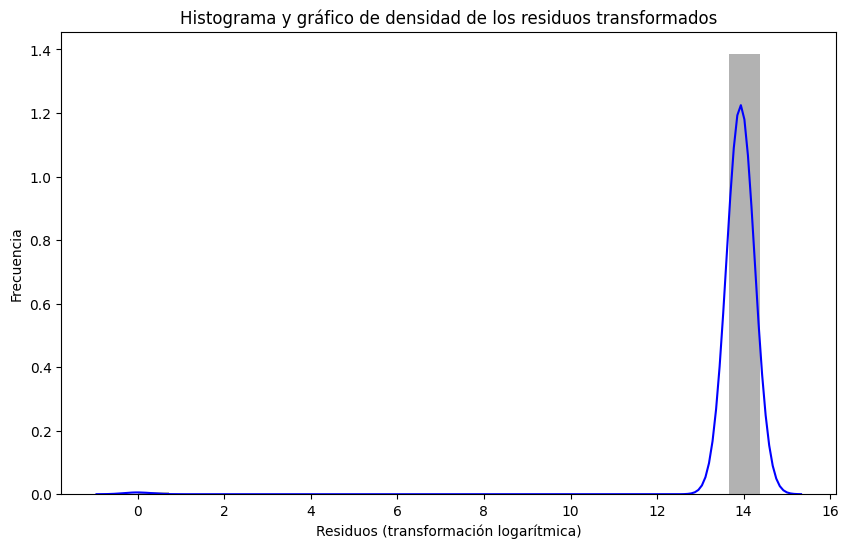

AIC: 5792.9527987820275
BIC: 5796.359970553488


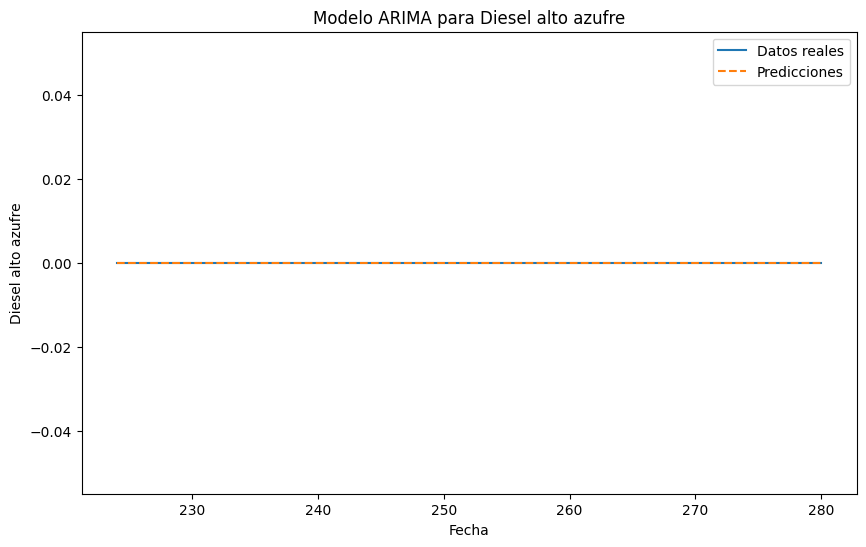

224    743386.402069
225    743386.402069
226    743386.402069
227    743386.402069
228    743386.402069
229    743386.402069
230    743386.402069
231    743386.402069
232    743386.402069
233    743386.402069
234    743386.402069
235    743386.402069
236    743386.402069
237    743386.402069
238    743386.402069
239    743386.402069
240    743386.402069
241    743386.402069
242    743386.402069
243    743386.402069
244    743386.402069
245    743386.402069
246    743386.402069
247    743386.402069
248    743386.402069
249    743386.402069
250    743386.402069
251    743386.402069
252    743386.402069
253    743386.402069
254    743386.402069
255    743386.402069
256    743386.402069
257    743386.402069
258    743386.402069
259    743386.402069
260    743386.402069
261    743386.402069
262    743386.402069
263    743386.402069
264    743386.402069
265    743386.402069
266    743386.402069
267    743386.402069
268    743386.402069
269    743386.402069
270    743386.402069
271    743386

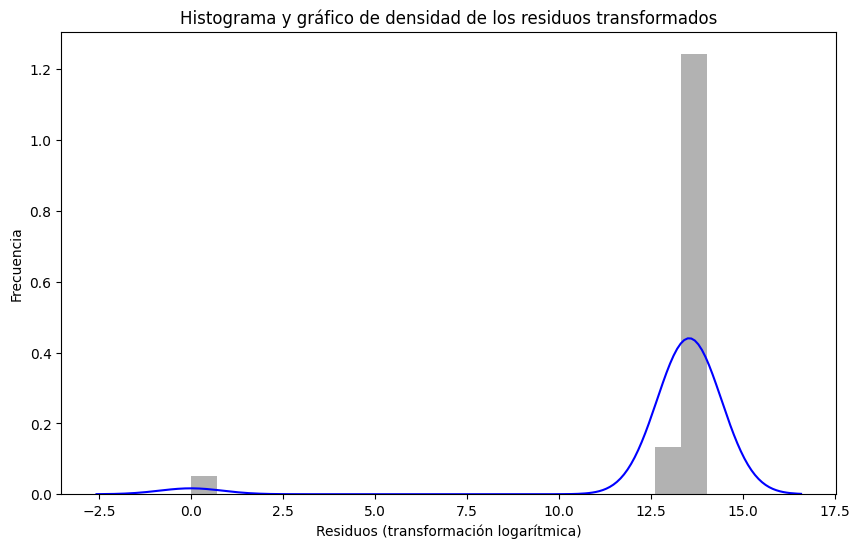

AIC: 7092.607631131461
BIC: 7099.430923235171


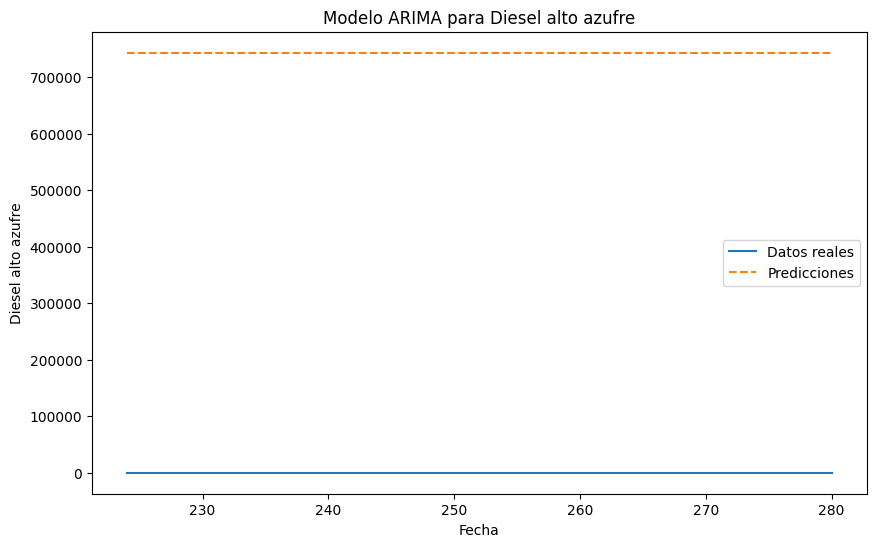

In [66]:
df7 = pd.read_csv("consumo.csv")

df7.fillna(0, inplace=True)

# Usando el Diesel alto azufre.
variable_interes = 'Diesel alto azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df7) * 0.8)
train_data = df7[variable_interes][:train_size]
test_data = df7[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (0, 1, 0)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

residuals = model_fit.resid

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()
# Obtener los valores de AIC y BIC del modelo ajustado
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df7.index[train_size:], test_data, label='Datos reales')
plt.plot(df7.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Crea el modelo ARIMA para la gasolina superior.
order = (0, 0, 0)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

residuals = model_fit.resid

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

# Obtener los valores de AIC y BIC del modelo ajustado
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df7.index[train_size:], test_data, label='Datos reales')
plt.plot(df7.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


#### A pesar de que a estos modelos son deficientes por falta de datos en cuestión, se puede decir que este tendrá una gran exactitud al querer predecir datos y que se adaptará a los datos enriquecedores que se le den a los modelos.

224    407124.74619
225    407124.74619
226    407124.74619
227    407124.74619
228    407124.74619
229    407124.74619
230    407124.74619
231    407124.74619
232    407124.74619
233    407124.74619
234    407124.74619
235    407124.74619
236    407124.74619
237    407124.74619
238    407124.74619
239    407124.74619
240    407124.74619
241    407124.74619
242    407124.74619
243    407124.74619
244    407124.74619
245    407124.74619
246    407124.74619
247    407124.74619
248    407124.74619
249    407124.74619
250    407124.74619
251    407124.74619
252    407124.74619
253    407124.74619
254    407124.74619
255    407124.74619
256    407124.74619
257    407124.74619
258    407124.74619
259    407124.74619
260    407124.74619
261    407124.74619
262    407124.74619
263    407124.74619
264    407124.74619
265    407124.74619
266    407124.74619
267    407124.74619
268    407124.74619
269    407124.74619
270    407124.74619
271    407124.74619
272    407124.74619
273    407124.74619


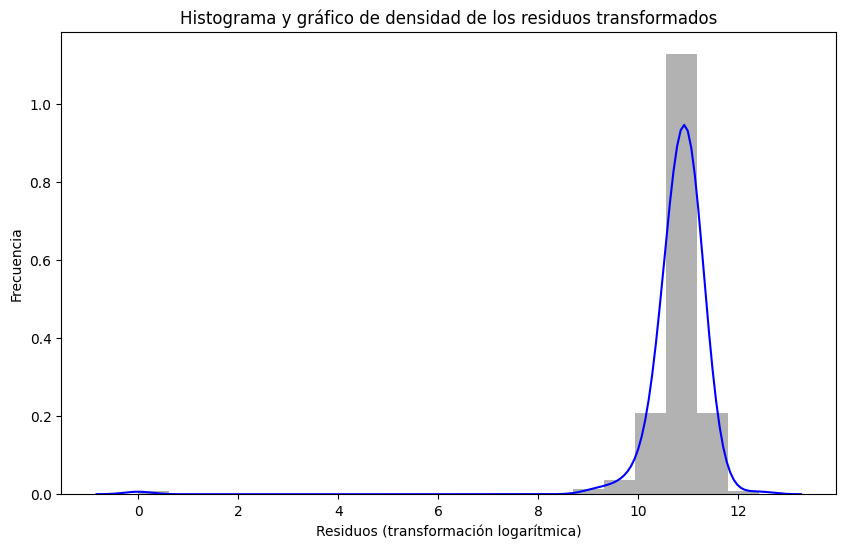

AIC: 5005.662024589024
BIC: 5009.069196360485


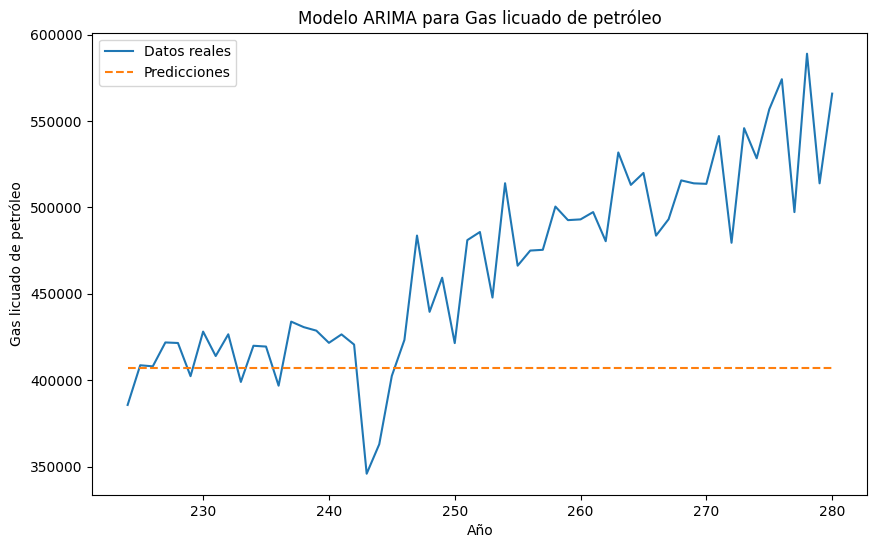

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


224    395317.882036
225    395076.170792
226    394834.896982
227    394594.059815
228    394353.658501
229    394113.692250
230    393874.160275
231    393635.061791
232    393396.396012
233    393158.162156
234    392920.359442
235    392682.987088
236    392446.044316
237    392209.530349
238    391973.444410
239    391737.785725
240    391502.553521
241    391267.747026
242    391033.365469
243    390799.408082
244    390565.874097
245    390332.762747
246    390100.073268
247    389867.804896
248    389635.956869
249    389404.528427
250    389173.518810
251    388942.927260
252    388712.753020
253    388482.995336
254    388253.653453
255    388024.726619
256    387796.214083
257    387568.115095
258    387340.428906
259    387113.154770
260    386886.291941
261    386659.839675
262    386433.797228
263    386208.163859
264    385982.938827
265    385758.121394
266    385533.710822
267    385309.706374
268    385086.107316
269    384862.912914
270    384640.122436
271    384417

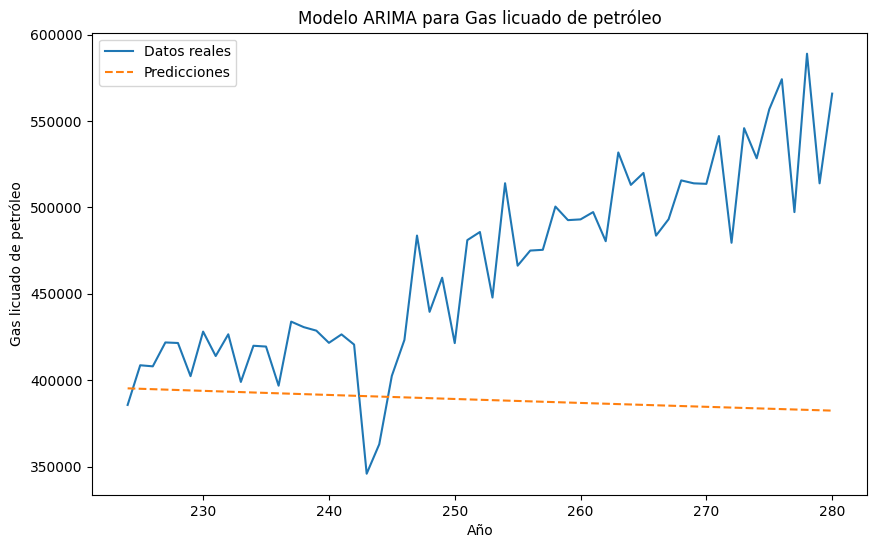

Estadístico de prueba: 0.9596893191337585
Valor p: 5.924477591179311e-06
Los residuos no siguen una distribución normal.
Aplicando normalización


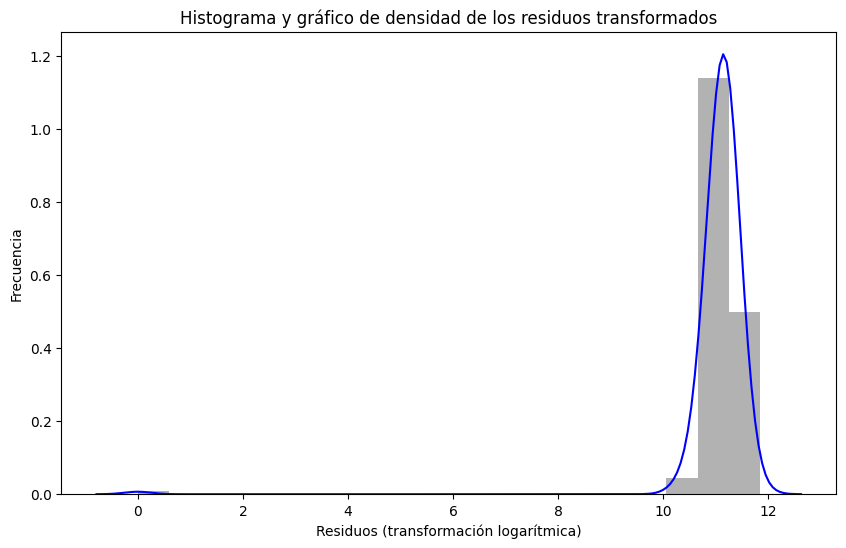

AIC: 4949.666699410718
BIC: 4963.3132836181385


In [67]:
df8 = pd.read_csv("consumo.csv")

df8.fillna(0, inplace=True)

# Usando el Gas licuado de petróleo.
variable_interes = 'Gas licuado de petróleo'

# Usando un 80% para el entrenamiento.
train_size = int(len(df8) * 0.8)
train_data = df8[variable_interes][:train_size]
test_data = df8[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (0, 1, 0)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Obteniendo los residuos.
residuals = model_fit.resid

#print("Residuos: ", residuals)

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

# Obtener los valores de AIC y BIC del modelo ajustado
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df8.index[train_size:], test_data, label='Datos reales')
plt.plot(df8.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Año')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Segundo modelo.

# Crea el modelo ARIMA para Gas licuado de petróleo.
order = (1, 0, 1)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df8.index[train_size:], test_data, label='Datos reales')
plt.plot(df8.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Año')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Obteniendo los residuos.
residuals = model_fit.resid

#print("Residuos: ", residuals)

# Prueba de normalidad de los residuos
stat, p = shapiro(residuals)
print('Estadístico de prueba:', stat)
print('Valor p:', p)

if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')
    print("Aplicando normalización")
    
    # Asegurarse de que los datos sean estrictamente positivos
    residuals_positivos = residuals - np.min(residuals) + 1

    # Aplicar transformación logarítmica
    log_residuals = np.log(residuals_positivos)

    # Visualizar el histograma y gráfico de densidad de los residuos transformados
    plt.figure(figsize=(10, 6))
    plt.hist(log_residuals, bins=20, density=True, alpha=0.6, color='gray')
    sns.kdeplot(log_residuals, color='blue')
    plt.xlabel('Residuos (transformación logarítmica)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma y gráfico de densidad de los residuos transformados')
    plt.show()

# Obtener los valores de AIC y BIC del modelo ajustado
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

##### En estos modelos se puede notar que tienen una mejor adaptación a los datos que se les de. Asimismo, se puede concluir que el modelo puede predecir con bastante exactitud cualquier dato a futuro en este modelo.

#### h. Haga un modelo usando el algoritmo prophet de Facebook o redes neuronales. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

Epoch 1/200
7/7 [==============================] - 4s 144ms/step - loss: 0.0539 - val_loss: 0.2064
Epoch 2/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0120 - val_loss: 0.0297
Epoch 3/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0098 - val_loss: 0.0171
Epoch 4/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0069 - val_loss: 0.0436
Epoch 5/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.0531
Epoch 6/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0061 - val_loss: 0.0349
Epoch 7/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0053 - val_loss: 0.0207
Epoch 8/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0052 - val_loss: 0.0184
Epoch 9/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0050 - val_loss: 0.0206
Epoch 10/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0048 - val_loss: 0.0180
Epoch 11/200
7/7 [

Epoch 1/200
7/7 [==============================] - 4s 130ms/step - loss: 0.0810 - val_loss: 0.3752
Epoch 2/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0250 - val_loss: 0.2736
Epoch 3/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0190 - val_loss: 0.2279
Epoch 4/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0142 - val_loss: 0.1777
Epoch 5/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0113 - val_loss: 0.1170
Epoch 6/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0092 - val_loss: 0.0683
Epoch 7/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0076 - val_loss: 0.0423
Epoch 8/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0289
Epoch 9/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0059 - val_loss: 0.0285
Epoch 10/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0057 - val_loss: 0.0352
Epoch 11/200
7/7 [

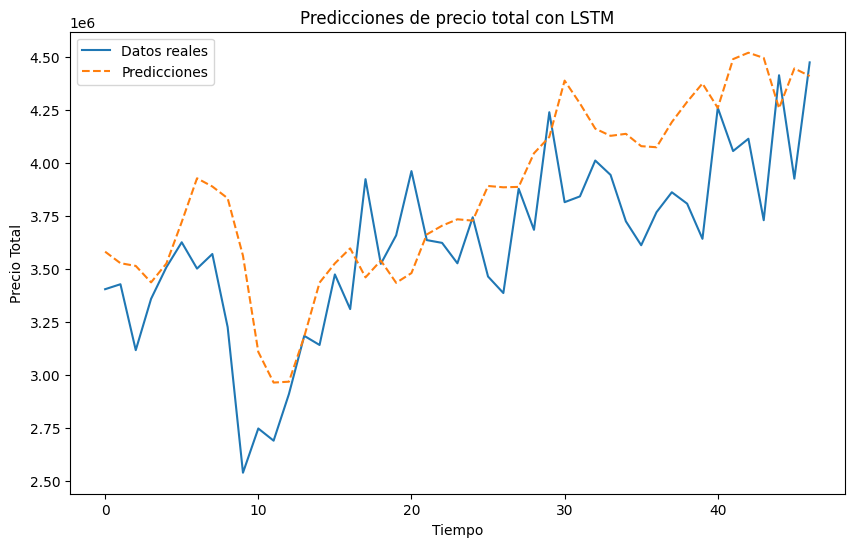

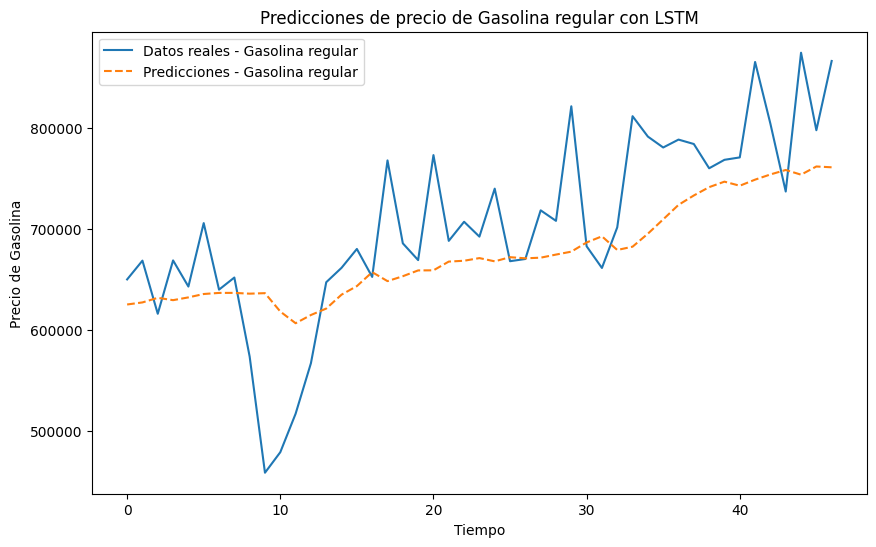

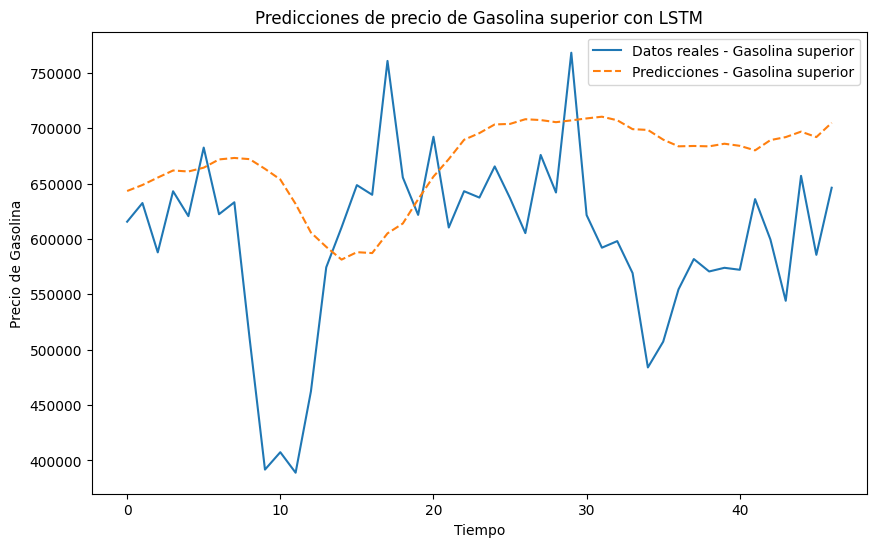

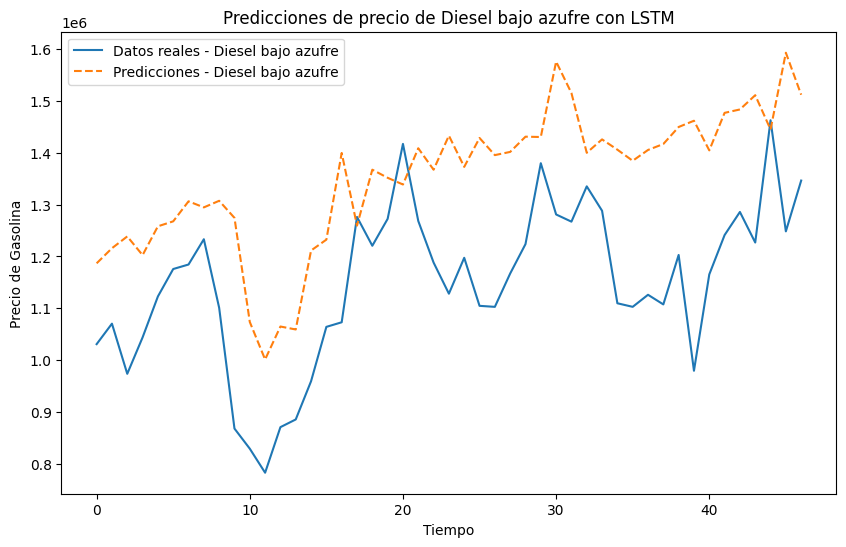

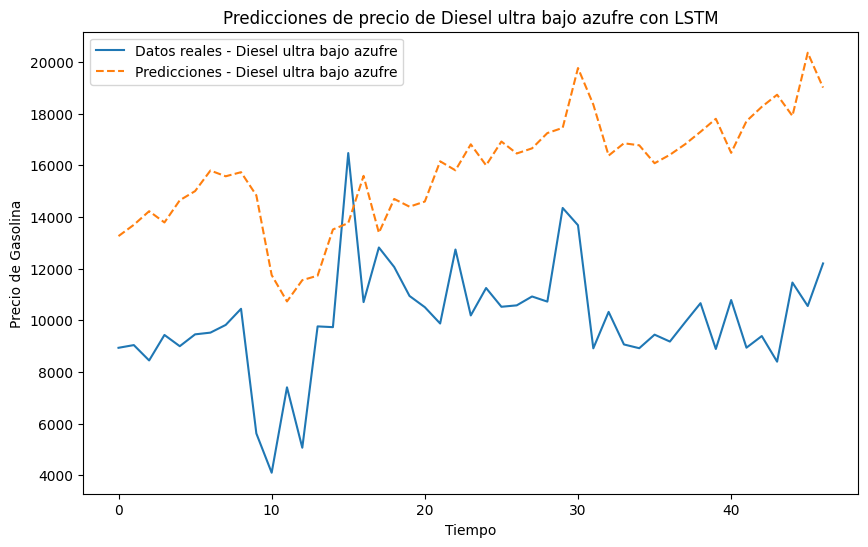

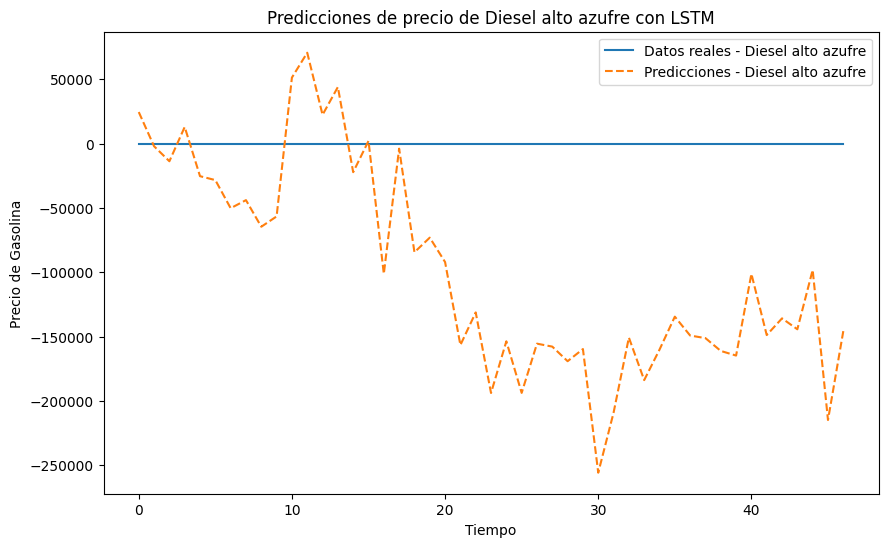

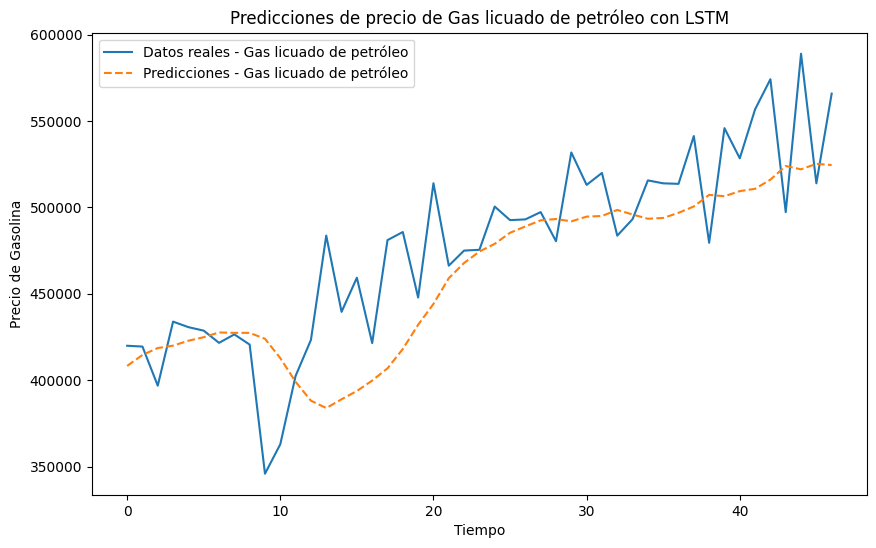

In [68]:

# Cargar los datos históricos de precios (supongamos que está en un archivo CSV llamado 'consumo.csv')
data = pd.read_csv('consumo.csv')

# Preprocesamiento de datos
gasolina_cols = ['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Diesel alto azufre', 'Gas licuado de petróleo']
total_prices = data['Total'].values.reshape(-1, 1)  # Convertir a matriz columna
gasolina_prices = data[gasolina_cols].values

# Normalizar los datos en el rango [0, 1]
scaler_total = MinMaxScaler()
scaler_gasolina = MinMaxScaler()
total_prices_normalized = scaler_total.fit_transform(total_prices)
gasolina_prices_normalized = scaler_gasolina.fit_transform(gasolina_prices)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(total_prices_normalized) * 0.8)
train_data_total = total_prices_normalized[:train_size]
train_data_gasolina = gasolina_prices_normalized[:train_size]
test_data_total = total_prices_normalized[train_size:]
test_data_gasolina = gasolina_prices_normalized[train_size:]

# Función para crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Definir la longitud de las secuencias de entrenamiento
sequence_length = 10

# Crear secuencias de entrenamiento y etiquetas
X_train_total, y_train_total = create_sequences(train_data_total, sequence_length)
X_train_gasolina, y_train_gasolina = create_sequences(train_data_gasolina, sequence_length)
X_test_total, y_test_total = create_sequences(test_data_total, sequence_length)
X_test_gasolina, y_test_gasolina = create_sequences(test_data_gasolina, sequence_length)

# Crear el modelo LSTM para el precio total
model_total = Sequential()
model_total.add(LSTM(64, input_shape=(sequence_length, 1)))
model_total.add(Dense(1))
model_total.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

# Entrenar el modelo para el precio total
model_total.fit(X_train_total, y_train_total, epochs=200, batch_size=32, validation_data=(X_test_total, y_test_total))

# Crear el modelo LSTM para los precios de gasolina
model_gasolina = Sequential()
model_gasolina.add(LSTM(64, input_shape=(sequence_length, len(gasolina_cols))))
model_gasolina.add(Dense(len(gasolina_cols)))
model_gasolina.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

# Entrenar el modelo para los precios de gasolina
model_gasolina.fit(X_train_gasolina, y_train_gasolina, epochs=200, batch_size=32, validation_data=(X_test_gasolina, y_test_gasolina))

# Hacer predicciones en el conjunto de prueba para el precio total
predictions_total = model_total.predict(X_test_total)

# Desnormalizar las predicciones para el precio total
predictions_total = scaler_total.inverse_transform(predictions_total)

# Hacer predicciones en el conjunto de prueba para los precios de gasolina
predictions_gasolina = model_gasolina.predict(X_test_gasolina)

# Desnormalizar las predicciones para los precios de gasolina
predictions_gasolina = scaler_gasolina.inverse_transform(predictions_gasolina)

# Visualizar las predicciones y los datos reales para el precio total
plt.figure(figsize=(10, 6))
plt.plot(scaler_total.inverse_transform(y_test_total), label='Datos reales')
plt.plot(predictions_total, label='Predicciones', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('Precio Total')
plt.legend()
plt.title('Predicciones de precio total con LSTM')
plt.show()

# Visualizar las predicciones y los datos reales para los precios de gasolina
for i, gasolina_col in enumerate(gasolina_cols):
    plt.figure(figsize=(10, 6))
    plt.plot(scaler_gasolina.inverse_transform(y_test_gasolina)[:, i], label=f'Datos reales - {gasolina_col}')
    plt.plot(predictions_gasolina[:, i], label=f'Predicciones - {gasolina_col}', linestyle='dashed')
    plt.xlabel('Tiempo')
    plt.ylabel('Precio de Gasolina')
    plt.legend()
    plt.title(f'Predicciones de precio de {gasolina_col} con LSTM')
    plt.show()

Epoch 1/200
7/7 [==============================] - 7s 236ms/step - loss: 0.0303 - val_loss: 0.0380
Epoch 2/200
7/7 [==============================] - 0s 25ms/step - loss: 0.0115 - val_loss: 0.0277
Epoch 3/200
7/7 [==============================] - 0s 25ms/step - loss: 0.0071 - val_loss: 0.0772
Epoch 4/200
7/7 [==============================] - 0s 23ms/step - loss: 0.0073 - val_loss: 0.0419
Epoch 5/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0062 - val_loss: 0.0192
Epoch 6/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0054 - val_loss: 0.0274
Epoch 7/200
7/7 [==============================] - 0s 21ms/step - loss: 0.0054 - val_loss: 0.0190
Epoch 8/200
7/7 [==============================] - 0s 22ms/step - loss: 0.0050 - val_loss: 0.0149
Epoch 9/200
7/7 [==============================] - 0s 21ms/step - loss: 0.0049 - val_loss: 0.0153
Epoch 10/200
7/7 [==============================] - 0s 23ms/step - loss: 0.0048 - val_loss: 0.0151
Epoch 11/200
7/7 [

Epoch 1/200
7/7 [==============================] - 7s 306ms/step - loss: 0.0726 - val_loss: 0.2662
Epoch 2/200
7/7 [==============================] - 0s 25ms/step - loss: 0.0260 - val_loss: 0.2210
Epoch 3/200
7/7 [==============================] - 0s 26ms/step - loss: 0.0180 - val_loss: 0.1824
Epoch 4/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0154 - val_loss: 0.1526
Epoch 5/200
7/7 [==============================] - 0s 28ms/step - loss: 0.0127 - val_loss: 0.1111
Epoch 6/200
7/7 [==============================] - 0s 25ms/step - loss: 0.0110 - val_loss: 0.0707
Epoch 7/200
7/7 [==============================] - 0s 24ms/step - loss: 0.0095 - val_loss: 0.0449
Epoch 8/200
7/7 [==============================] - 0s 24ms/step - loss: 0.0084 - val_loss: 0.0300
Epoch 9/200
7/7 [==============================] - 0s 26ms/step - loss: 0.0073 - val_loss: 0.0273
Epoch 10/200
7/7 [==============================] - 0s 21ms/step - loss: 0.0070 - val_loss: 0.0375
Epoch 11/200
7/7 [

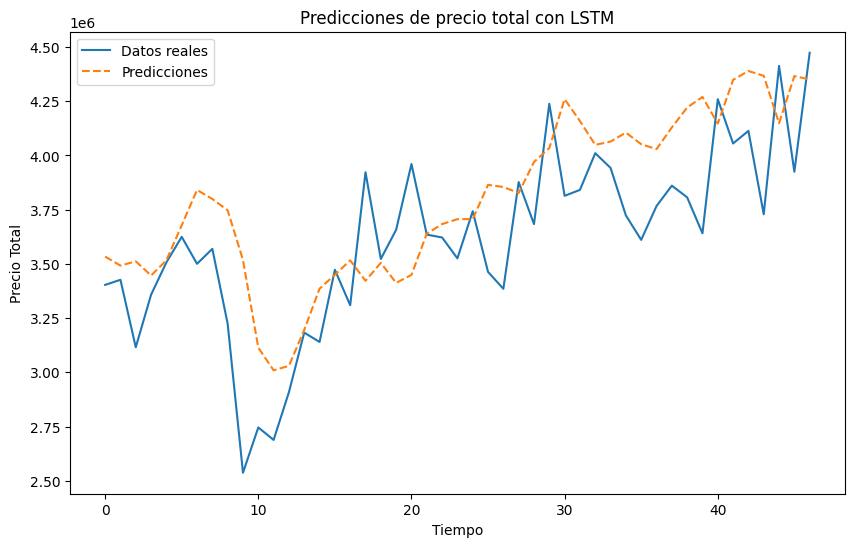

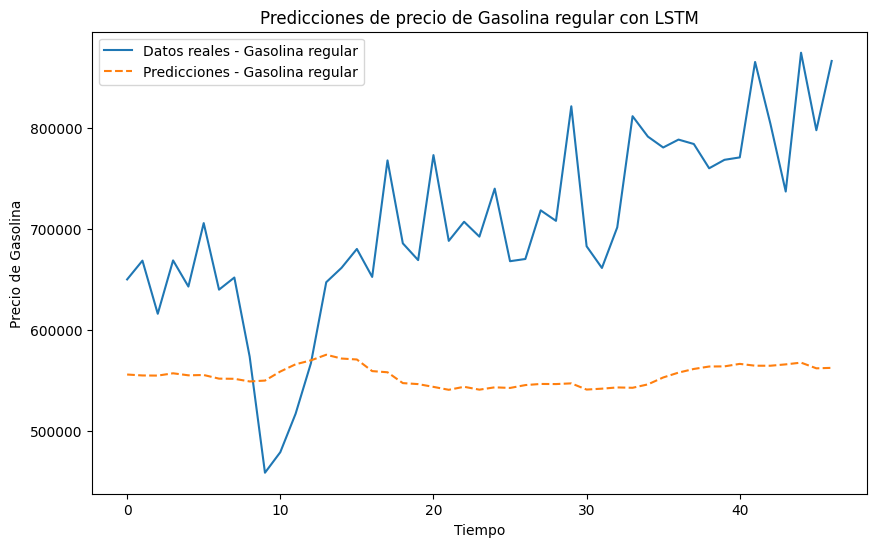

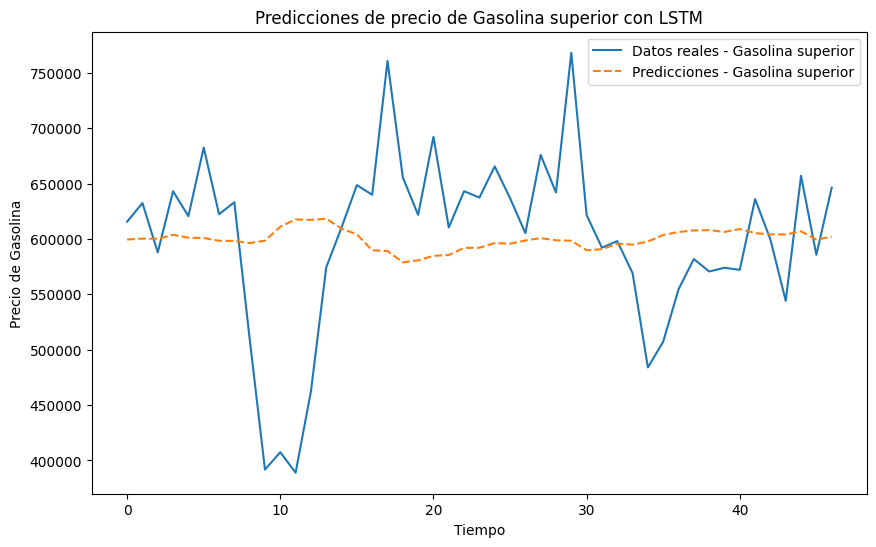

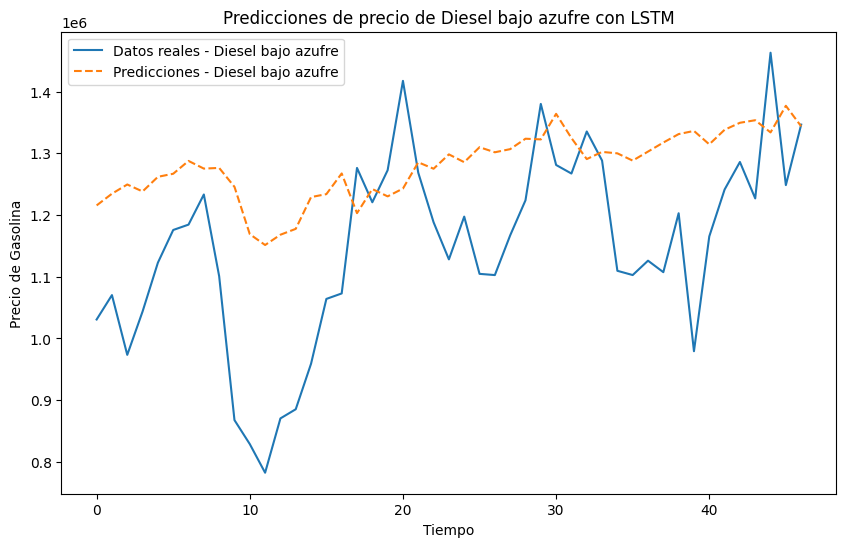

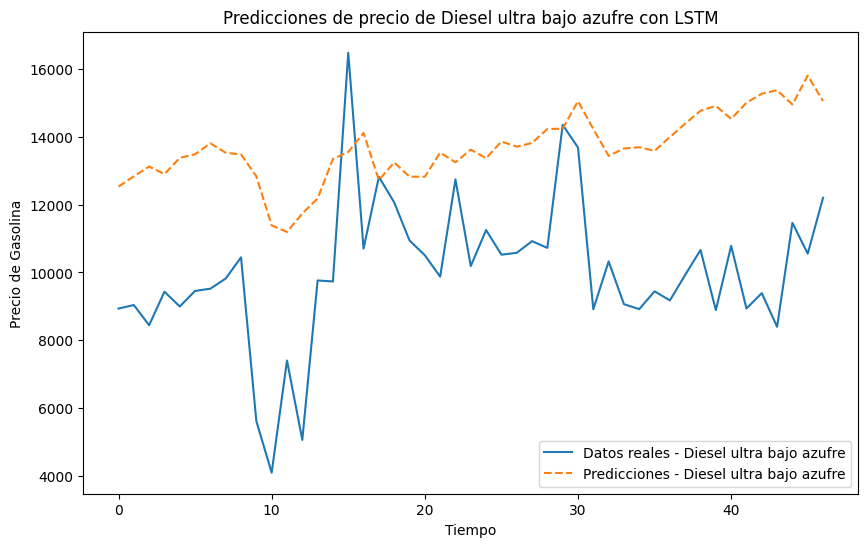

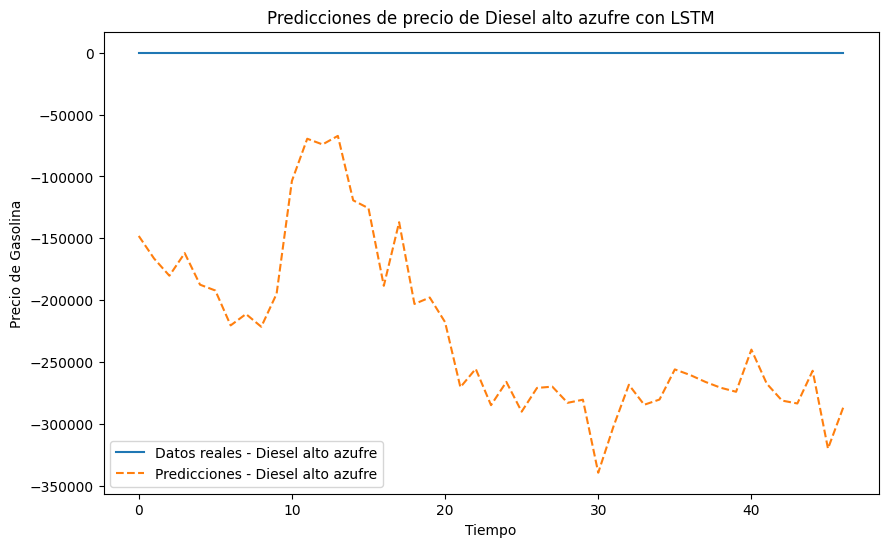

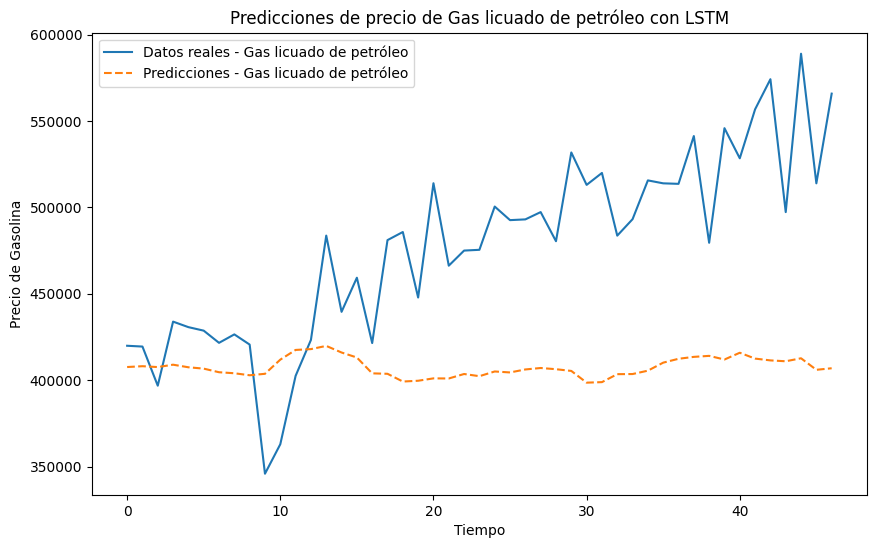

In [69]:
# Cargar los datos históricos de precios (supongamos que está en un archivo CSV llamado 'consumo.csv')
data = pd.read_csv('consumo.csv')

# Preprocesamiento de datos
gasolina_cols = ['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Diesel alto azufre', 'Gas licuado de petróleo']
total_prices = data['Total'].values.reshape(-1, 1)  # Convertir a matriz columna
gasolina_prices = data[gasolina_cols].values

# Normalizar los datos en el rango [0, 1]
scaler_total = MinMaxScaler()
scaler_gasolina = MinMaxScaler()
total_prices_normalized = scaler_total.fit_transform(total_prices)
gasolina_prices_normalized = scaler_gasolina.fit_transform(gasolina_prices)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(total_prices_normalized) * 0.8)
train_data_total = total_prices_normalized[:train_size]
train_data_gasolina = gasolina_prices_normalized[:train_size]
test_data_total = total_prices_normalized[train_size:]
test_data_gasolina = gasolina_prices_normalized[train_size:]

# Función para crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Definir la longitud de las secuencias de entrenamiento
sequence_length = 10

# Crear secuencias de entrenamiento y etiquetas
X_train_total, y_train_total = create_sequences(train_data_total, sequence_length)
X_train_gasolina, y_train_gasolina = create_sequences(train_data_gasolina, sequence_length)
X_test_total, y_test_total = create_sequences(test_data_total, sequence_length)
X_test_gasolina, y_test_gasolina = create_sequences(test_data_gasolina, sequence_length)

# Crear el modelo LSTM para el precio total con más capas
model_total = Sequential()
model_total.add(LSTM(64, input_shape=(sequence_length, 1), return_sequences=True))
model_total.add(LSTM(32))
model_total.add(Dense(16))
model_total.add(Dense(1))
model_total.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# Entrenar el modelo para el precio total
model_total.fit(X_train_total, y_train_total, epochs=200, batch_size=32, validation_data=(X_test_total, y_test_total))

# Crear el modelo LSTM para los precios de gasolina con más capas
model_gasolina = Sequential()
model_gasolina.add(LSTM(64, input_shape=(sequence_length, len(gasolina_cols)), return_sequences=True))
model_gasolina.add(LSTM(32))
model_gasolina.add(Dense(16))
model_gasolina.add(Dense(len(gasolina_cols)))
model_gasolina.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# Entrenar el modelo para los precios de gasolina
model_gasolina.fit(X_train_gasolina, y_train_gasolina, epochs=200, batch_size=32, validation_data=(X_test_gasolina, y_test_gasolina))

# Hacer predicciones en el conjunto de prueba para el precio total
predictions_total = model_total.predict(X_test_total)

# Desnormalizar las predicciones para el precio total
predictions_total = scaler_total.inverse_transform(predictions_total)

# Hacer predicciones en el conjunto de prueba para los precios de gasolina
predictions_gasolina = model_gasolina.predict(X_test_gasolina)

# Desnormalizar las predicciones para los precios de gasolina
predictions_gasolina = scaler_gasolina.inverse_transform(predictions_gasolina)

# Visualizar las predicciones y los datos reales para el precio total
plt.figure(figsize=(10, 6))
plt.plot(scaler_total.inverse_transform(y_test_total), label='Datos reales')
plt.plot(predictions_total, label='Predicciones', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('Precio Total')
plt.legend()
plt.title('Predicciones de precio total con LSTM')
plt.show()

# Visualizar las predicciones y los datos reales para los precios de gasolina
for i, gasolina_col in enumerate(gasolina_cols):
    plt.figure(figsize=(10, 6))
    plt.plot(scaler_gasolina.inverse_transform(y_test_gasolina)[:, i], label=f'Datos reales - {gasolina_col}')
    plt.plot(predictions_gasolina[:, i], label=f'Predicciones - {gasolina_col}', linestyle='dashed')
    plt.xlabel('Tiempo')
    plt.ylabel('Precio de Gasolina')
    plt.legend()
    plt.title(f'Predicciones de precio de {gasolina_col} con LSTM')
    plt.show()

##### Para este inciso se armaron dos modelos de redes neuronales, para comparar con mayor riqueza los precios de las gasolinas en base a los consumos. Se puede notar que los modelos de las redes neuronales presentan un mejor comportamiento que los modelos del inciso anterior. Esto quiere decir que estos modelos serían más exactos al querer predecir los precios de la gasolina dado cualquier tiempo y set de datos.

### Inciso 4: Haga una predicción de los valores de la serie para los últimos 3 años. Explique qué tan buena es su predicción. En el caso de la serie de precios, use los datos de 2023 como conjunto de prueba. 

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Cargar los datos históricos de precios (supongamos que está en un archivo CSV llamado 'consumo.csv')
data = pd.read_csv('consumo.csv')

# Convertir la columna 'fecha' a tipo datetime
data['Fecha'] = pd.to_datetime(data['Fecha']).dt.date

In [67]:
def count_zeros_per_column(dataframe):
    zero_counts = dataframe.apply(lambda column: (column == 0).sum())
    return zero_counts

# Suponiendo que 'data' es tu DataFrame con los datos de 2020 al 2022
zero_counts = count_zeros_per_column(data)

# Imprimir la cantidad de ceros por columna
print(zero_counts)

Fecha                         0
Aceites lubricantes         228
Asfalto                       0
Bunker                        0
Ceras                       260
Combustible turbo jet        60
Diesel bajo azufre          216
Diesel ultra bajo azufre    216
Gas licuado de petróleo       0
Gasolina de aviación          1
Gasolina regular              0
Gasolina superior             0
Grasas lubricantes          228
Kerosina                      0
Mezclas oleosas             241
Naftas                      228
PetCoke                      49
Petróleo crudo               24
Solventes                   228
Butano                      234
Diesel alto azufre           65
Orimulsión                  253
Total                         0
dtype: int64


In [68]:
# Definir la lista de columnas a eliminar
columns_to_drop = ['Aceites lubricantes', 'Ceras', 'Diesel bajo azufre', 'Diesel ultra bajo azufre',
                   'Grasas lubricantes', 'Mezclas oleosas', 'Naftas', 'Solventes', 'Butano', 'Orimulsión']

# Eliminar las columnas con más de 200 datos faltantes
data.drop(columns=columns_to_drop, inplace=True)

# Llenar las columnas restantes con la media
columns_to_fill = data.columns[data.isnull().sum() > 0]
for col in columns_to_fill:
    col_mean = data[col].mean()
    data[col].fillna(col_mean, inplace=True)
    
# Llenar las columnas con ceros
columns_with_zeros = data.columns[data.eq(0).sum() > 0]
for col in columns_with_zeros:
    data[col].replace(0, data[col].mean(), inplace=True)

In [69]:
# Comprueba si quedan valores nulos en el DataFrame
print(data.isnull().sum())

# Verifica si quedan ceros en las columnas
print(data.eq(0).sum())

Fecha                      0
Asfalto                    0
Bunker                     0
Combustible turbo jet      0
Gas licuado de petróleo    0
Gasolina de aviación       0
Gasolina regular           0
Gasolina superior          0
Kerosina                   0
PetCoke                    0
Petróleo crudo             0
Diesel alto azufre         0
Total                      0
dtype: int64
Fecha                      0
Asfalto                    0
Bunker                     0
Combustible turbo jet      0
Gas licuado de petróleo    0
Gasolina de aviación       0
Gasolina regular           0
Gasolina superior          0
Kerosina                   0
PetCoke                    0
Petróleo crudo             0
Diesel alto azufre         0
Total                      0
dtype: int64


In [70]:
print(data)

          Fecha   Asfalto     Bunker  Combustible turbo jet   
0    2000-01-01  48446.00  296766.99           35953.793274  \
1    2000-02-01  50597.00  328116.44           35953.793274   
2    2000-03-01  27593.00  368589.63           35953.793274   
3    2000-04-01  53794.00  396300.47           35953.793274   
4    2000-05-01  60137.00  449368.92           35953.793274   
..          ...       ...        ...                    ...   
276  2023-01-01  77035.87  105294.71           73581.220000   
277  2023-02-01  74416.24  116577.42           66761.160000   
278  2023-03-01  69630.40  194492.83           83431.510000   
279  2023-04-01  74654.67  157844.83           80733.640000   
280  2023-05-01  76296.87  221002.66           73860.950000   

     Gas licuado de petróleo  Gasolina de aviación  Gasolina regular   
0              194410.476190               1426.00         202645.20  \
1              174710.552381               1458.00         205530.96   
2              189234.06666

In [71]:
# Preprocesamiento de datos
gasolina_cols = ['Asfalto', 'Bunker', 'Combustible turbo jet', 'Gas licuado de petróleo', 'Gasolina de aviación', 'Gasolina regular']
total_prices = data['Total'].values.reshape(-1, 1)
gasolina_prices = data[gasolina_cols].values

# Normalizar los datos en el rango [0, 1]
scaler_total = MinMaxScaler()
scaler_gasolina = MinMaxScaler()
total_prices_normalized = scaler_total.fit_transform(total_prices)
gasolina_prices_normalized = scaler_gasolina.fit_transform(gasolina_prices)

# Definir las fechas de inicio y fin para entrenamiento y prueba
train_start_date = pd.to_datetime('2020-01-01').date()
train_end_date = pd.to_datetime('2022-12-31').date()
test_start_date = pd.to_datetime('2023-01-01').date()

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data_total = total_prices_normalized[(data['Fecha'] >= train_start_date) & (data['Fecha'] <= train_end_date)]
test_data_total = total_prices_normalized[data['Fecha'] >= test_start_date]
train_data_gasolina = gasolina_prices_normalized[(data['Fecha'] >= train_start_date) & (data['Fecha'] <= train_end_date)]
test_data_gasolina = gasolina_prices_normalized[data['Fecha'] >= test_start_date]

# Definir la longitud de las secuencias de entrenamiento
sequence_length = 4

# Función para crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Crear secuencias de entrenamiento y etiquetas
X_train_total, y_train_total = create_sequences(train_data_total, sequence_length)
X_train_gasolina, y_train_gasolina = create_sequences(train_data_gasolina, sequence_length)
X_test_total, y_test_total = create_sequences(test_data_total, sequence_length)
X_test_gasolina, y_test_gasolina = create_sequences(test_data_gasolina, sequence_length)

print(X_test_total.shape)
print(X_test_gasolina.shape)

(1, 4, 1)
(1, 4, 6)


In [72]:
# Crear el modelo LSTM para el precio total con más capas
model_total = Sequential()
model_total.add(LSTM(64, input_shape=(sequence_length, 1), return_sequences=True))
model_total.add(LSTM(32))
model_total.add(Dense(16))
model_total.add(Dense(1))
model_total.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), run_eagerly=True)

# Entrenar el modelo para el precio total
model_total.fit(X_train_total, y_train_total, epochs=200, batch_size=32, validation_data=(X_test_total, y_test_total))

# Crear el modelo LSTM para los precios de gasolina con más capas
model_gasolina = Sequential()
model_gasolina.add(LSTM(64, input_shape=(sequence_length, len(gasolina_cols)), return_sequences=True))
model_gasolina.add(LSTM(32))
model_gasolina.add(Dense(16))
model_gasolina.add(Dense(len(gasolina_cols)))
model_gasolina.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), run_eagerly=True)

# Entrenar el modelo para los precios de gasolina
model_gasolina.fit(X_train_gasolina, y_train_gasolina, epochs=200, batch_size=32, validation_data=(X_test_gasolina, y_test_gasolina))

# Realizar las predicciones y desnormalizar
predictions_total = model_total.predict(X_test_total)
predictions_total = scaler_total.inverse_transform(predictions_total)

predictions_gasolina = model_gasolina.predict(X_test_gasolina)
predictions_gasolina = scaler_gasolina.inverse_transform(predictions_gasolina)

# Imprimiendo las predicciones.
print("Predictions total: ",predictions_total)
print("Predicciones de la gasolina: ", predictions_gasolina)

Epoch 1/200
1/1 [==============================] - 0s 295ms/step - loss: 0.5825 - val_loss: 1.0403
Epoch 2/200
1/1 [==============================] - 0s 241ms/step - loss: 0.5231 - val_loss: 0.9489
Epoch 3/200
1/1 [==============================] - 0s 303ms/step - loss: 0.4675 - val_loss: 0.8614
Epoch 4/200
1/1 [==============================] - 0s 247ms/step - loss: 0.4150 - val_loss: 0.7770
Epoch 5/200
1/1 [==============================] - 0s 217ms/step - loss: 0.3650 - val_loss: 0.6952
Epoch 6/200
1/1 [==============================] - 0s 238ms/step - loss: 0.3173 - val_loss: 0.6158
Epoch 7/200
1/1 [==============================] - 0s 218ms/step - loss: 0.2718 - val_loss: 0.5387
Epoch 8/200
1/1 [==============================] - 0s 235ms/step - loss: 0.2287 - val_loss: 0.4641
Epoch 9/200
1/1 [==============================] - 0s 229ms/step - loss: 0.1881 - val_loss: 0.3922
Epoch 10/200
1/1 [==============================] - 0s 231ms/step - loss: 0.1502 - val_loss: 0.3234
Epoch 11/

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular las predicciones para el año 2023
predictions_total = model_total.predict(X_test_total)
predictions_total = scaler_total.inverse_transform(predictions_total)

# Desnormalizar las etiquetas reales del año 2023
y_test_total = scaler_total.inverse_transform(y_test_total)

# Calcular el Error Cuadrado Medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test_total, predictions_total)
r2 = r2_score(y_test_total, predictions_total)

# Imprimir las métricas
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)


1/1 [==============================] - 0s 76ms/step
Mean Squared Error (MSE): 266937793263.65335
Coefficient of Determination (R^2): nan


c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
